In [1]:
import hist
import pickle as pkl
from unfold_utils.unfolder import *
import ipywidgets as widgets
from IPython.display import display
from unfold_utils.draw_tools import * 
from unfold_utils.integrate_and_rebin import *

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-480 GeV",  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]

In [4]:
# output_data['pt_jet_reco'].project('pt').to_numpy()[1]

In [5]:
# output_data['pt_jet_reco'].project('pt').values().sum()

In [6]:
# rebinned_pt_edges = [
#      200., 210, 220, 230 , 240, 250, 260, 280., 300, 320., 350., 400., 450., 500, 1500]
# #     600., 700., 800., 900., 1000., 1100. , 1500
# # ]

# rebinned_pt_edges = [   200.,  210.,  220.,  230.,  240.,  250.,  260.,
#         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
#         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
#         450.,  460.,  470.,  480.,  490.,  500.,  1500]

# data_pt = rebin_hist(output_data['pt_jet_reco'].project('pt'), 'pt', rebinned_pt_edges)
# pythia_pt = rebin_hist(output_pythia['pt_jet_reco'][...,'nominal'].project('pt'), 'pt', rebinned_pt_edges)

In [7]:
# def compute_sf_and_uncertainty(data_pt, pythia_pt):
#     """
#     Compute scale factors (SF) and their uncertainties.
    
#     Parameters:
#     data_pt: histogram values from data
#     pythia_pt: histogram values from pythia (MC)
    
#     Returns:
#     pt_sf: Scale factors per bin
#     sf_uncertainty: Uncertainties per bin
#     """

#     # Compute ratio and sum ratio
#     ratio = data_pt.values() / pythia_pt.values()
#     sum_ratio = data_pt.values().sum() / pythia_pt.values().sum()
#     pt_sf = ratio / sum_ratio

#     # Compute variances
#     data_var = data_pt.variances()
#     pythia_var = pythia_pt.variances()

#     # Compute uncertainty on the ratio
#     ratio_uncertainty = ratio / pythia_pt.values() * np.sqrt(
#         data_var + (data_pt.values() / pythia_pt.values()) ** 2 * pythia_var
#     )

#     # Compute uncertainty on the sum ratio
#     sum_data = data_pt.values().sum()
#     sum_pythia = pythia_pt.values().sum()
#     sum_data_var = data_var.sum()
#     sum_pythia_var = pythia_var.sum()

#     sum_ratio_uncertainty = sum_ratio * np.sqrt(
#         sum_data_var / sum_data**2 + sum_pythia_var / sum_pythia**2
#     )

#     # Compute final uncertainty on scale factor
#     sf_uncertainty = pt_sf * np.sqrt(
#         (ratio_uncertainty / ratio) ** 2 + (sum_ratio_uncertainty / sum_ratio) ** 2
#     )

#     return pt_sf, sf_uncertainty
# pt_sf, sf_uncertainty = compute_sf_and_uncertainty(data_pt, pythia_pt)
# # The function is ready; you can now pass your data_pt and pythia_pt histograms to it.

# plt.stairs(pt_sf, data_pt.to_numpy()[1])
# plt.errorbar(data_pt.axes[0].centers, pt_sf, sf_uncertainty, xerr =data_pt.axes[0].widths/2, ls = ''  )
# pt_values = data_pt.axes[0].centers
# plt.hlines([1], 200, 1500)
# plt.xlim(190, 1500)

In [8]:
# # Define alternative fit functions
# from scipy.optimize import curve_fit
# # Exponential function
# pt_fine = np.linspace(200, 1500, 100)
# def exponential(x, a, b):
#     return a * np.exp(b * x)

# # Quadratic function
# def quadratic(x, a, b, c):
#     return a + b * x + c * x**2

# # Cubic function
# def cubic(x, a, b, c, d):
#     return a + b * x + c * x**2 + d * x**3

# # Modified rational function with an extra term in the denominator
# def modified_rational(x, a, b, c, d):
#     return (a + b * x) / (1 + c * x + d * x**2)

# # Fit the data using the different functions
# popt_exp, _ = curve_fit(exponential, pt_values, pt_sf, sigma=sf_uncertainty, absolute_sigma=True, maxfev=10000)
# popt_quad, _ = curve_fit(quadratic, pt_values, pt_sf, sigma=sf_uncertainty, absolute_sigma=True, maxfev=10000)
# popt_cubic, _ = curve_fit(cubic, pt_values, pt_sf, sigma=sf_uncertainty, absolute_sigma=True, maxfev=10000)
# popt_mod_rational, _ = curve_fit(modified_rational, pt_values, pt_sf, sigma=sf_uncertainty, absolute_sigma=True, maxfev=10000)

# # Generate fitted values
# sf_exp = exponential(pt_fine, *popt_exp)
# sf_quad = quadratic(pt_fine, *popt_quad)
# sf_cubic = cubic(pt_fine, *popt_cubic)
# sf_mod_rational = modified_rational(pt_fine, *popt_mod_rational)

# # Plot the results
# plt.errorbar(pt_values, pt_sf, yerr=sf_uncertainty, fmt='o', label='Data (SF)', color='black', capsize=3)
# #plt.plot(pt_fine, sf_exp, label='Exponential Fit', linestyle='dashed', color='blue')
# #plt.plot(pt_fine, sf_quad, label='Quadratic Fit', linestyle='dotted', color='green')
# #plt.plot(pt_fine, sf_cubic, label='Cubic Fit', linestyle='solid', color='purple')
# plt.plot(pt_fine, sf_mod_rational, label='Modified Rational Fit', linestyle='dashdot', color='red')

# plt.xlabel('$p_T$ (GeV)')
# plt.ylabel('Scale Factor (SF)')
# plt.legend()
# plt.title('SF as a Function of $p_T$ (Alternative Fits)')
# plt.show()

# # Return fit parameters for comparison
# popt_exp, popt_quad, popt_cubic, popt_mod_rational


In [9]:
# def pt_reweight(pt):
#     import awkward as ak
#     a, b , c,  d = [ 5.52615580e+05,  7.94970602e+03,  1.02242903e+04, -5.80564216e-01]
#     edge_value = 0.8816427
#     weight = (a + b * pt) / (1 + c * pt + d * pt**2)
#     return  ak.where( pt>1000,  edge_value, weight)

In [10]:
# from coffea.lookup_tools.dense_lookup import dense_lookup

# num = dists["gen1", :, :].values()
# den = dists["gen2", :, :].values()
# sf = np.where(
#     (num > 0) & (den > 0),
#     num / np.maximum(den, 1) * den.sum() / num.sum(),
#     1.0,
# )

# corr = dense_lookup(sf, [ax.edges for ax in dists.axes[1:]])
# print(corr)

# # a quick way to plot the scale factor is to steal the axis definitions from the input histograms:
# sfhist = hist.Hist(*dists.axes[1:], data=sf)
# sfhist.plot2d()

In [11]:
closure  = False
groomed = False

In [12]:
ww16 =  (36330  * 75.95) /(15688000.0 + 15054400.0)

wz16 =  (36330  * 27.6)/( 7584000.0 + 7584000.0)

zz16 = (36330  * 12.17)/( 712000.0 + 1151000.0)

ww17 = (36330  * 75.95)/15154000.0
wz17 = (41480 * 27.6)/7789250.0
zz17 = (41480* 12.17 )/2022000.0

ww18 = (41480 * 75.95	)/9983800.0
wz18 = (41480 * 27.6)/10075000.0
zz18 = (41480* 12.17 )/1936000.0

f_prefix = 'plots/zjet/'

In [13]:
with open('latest_pkl/pythia_syst_0703.pkl', "rb") as f:
    output_pythia= pkl.load( f )
with open("latest_pkl/data_combined_0703.pkl", "rb") as f:
    output_data = pkl.load( f )

with open("latest_pkl/herwig_0703.pkl", "rb") as f:
    output_herwig = pkl.load( f )
    
with open('latest_pkl/backgrounds_0703.pkl', "rb") as f:
    output_bg= pkl.load( f )

with open('latest_pkl/pythia_jk_0703.pkl', "rb") as f:
    output_jk= pkl.load( f )
    


if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']
    input_data = output_data['ptjet_mjet_u_reco']
    fakes = output_pythia['fakes_u']
    misses = output_pythia['misses_u']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    fakes_herwig = output_herwig['fakes_u']
    misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['response_matrix_g']
    input_data = output_data['ptjet_mjet_g_reco']
    fakes = output_pythia['fakes_g']
    misses = output_pythia['misses_g']
    hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    resp_matrix_pythia = resp_matrix_4d
    resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    fakes_herwig = output_herwig['fakes_g']
    misses_herwig = output_herwig['misses_g']

/home/aritra/.local/share/pipx/venvs/jupyterlab/lib/python3.12/site-packages/hist/basehist.py:417: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


In [14]:



reco_mass =18131231
gen_mass =16123123
start_mass = 0

# resp_matrix_4d = resp_matrix_4d[:, :, hist.rebin(2), :, :, :]
# input_data = input_data[:,  :, hist.rebin(2), ...]
# fakes = fakes[:,  :, hist.rebin(2), ...]
# misses = misses[:,  :, :, ...]
# hist_bg = hist_bg[:,  :, hist.rebin(2), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.rebin(2), :,: , ...]
# fakes_herwig = fakes_herwig[:,  :, hist.rebin(2), ...]
# misses_herwig = misses_herwig[:,  :, :, ...]



# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :, hist.loc(start_mass):hist.loc(gen_mass), :]
# input_data = input_data[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# fakes = fakes[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# misses = misses[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :, hist.loc(start_mass):hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass) :hist.loc(gen_mass), :]
# input_data = input_data[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses = misses[:,  :, hist.loc(start_mass):hist.loc(gen_mass), ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :hist.loc(reco_mass), :,hist.loc(start_mass): hist.loc(gen_mass), ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass), ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :hist.loc(gen_mass), ...]

resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :hist.loc(reco_mass)+1, :,hist.loc(start_mass) :hist.loc(gen_mass)+1, :]
input_data = input_data[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
fakes = fakes[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
misses = misses[:,  :, hist.loc(start_mass):hist.loc(gen_mass)+1, ...]
hist_bg = hist_bg[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
#resp_matrix_pythia = resp_matrix_pythia 
resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :hist.loc(reco_mass)+1, :,hist.loc(start_mass): hist.loc(gen_mass)+1, ...]
fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :hist.loc(reco_mass)+1, ...]
misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :hist.loc(gen_mass)+1, ...]





# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass):, :, hist.loc(start_mass):, :]
# input_data = input_data[:,  :, hist.loc(start_mass):, ...]
# fakes = fakes[:,  :, hist.loc(start_mass):, ...]
# misses = misses[:,  :,hist.loc(start_mass) :, ...]
# hist_bg = hist_bg[:,  :, hist.loc(start_mass):, ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :, hist.loc(start_mass):, :,hist.loc(start_mass): , ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
# misses_herwig = misses_herwig[:,  :, hist.loc(start_mass):, ...]

# resp_matrix_4d = resp_matrix_4d[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass) :, :]
# input_data = input_data[:,  :,hist.loc(start_mass) :, ...]
# fakes = fakes[:,  :,hist.loc(start_mass) :, ...]
# misses = misses[:,  :, hist.loc(start_mass):, ...]
# hist_bg = hist_bg[:,  :,hist.loc(start_mass) :, ...]
# #resp_matrix_pythia = resp_matrix_pythia 
# resp_matrix_4d_herwig  = resp_matrix_4d_herwig[:, :,hist.loc(start_mass) :, :,hist.loc(start_mass): , ...]
# fakes_herwig = fakes_herwig[:,  :,hist.loc(start_mass) :, ...]
# misses_herwig = misses_herwig[:,  :,hist.loc(start_mass) :, ...]




In [15]:
resp_matrix_4d.axes['mreco'].edges

array([0.0e+00, 2.5e+00, 5.0e+00, 7.5e+00, 1.0e+01, 1.5e+01, 2.0e+01,
       3.0e+01, 4.0e+01, 5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01,
       1.0e+02, 1.1e+02, 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02,
       1.7e+02, 1.8e+02, 1.9e+02, 2.0e+02, 5.0e+02, 1.3e+04])

In [16]:
resp_matrix_4d.axes['mgen'].edges

array([0.0e+00, 5.0e+00, 1.0e+01, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01,
       1.0e+02, 1.2e+02, 1.4e+02, 1.6e+02, 1.8e+02, 2.0e+02, 1.3e+04])

In [17]:
if not groomed:
    edges = [ 0, 10, 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 0,  2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]
if groomed:
    edges = [ 0, 5, 10,  15, 2.0e+01, 30,   4.0e+01,
           5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
           1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 180, 200,  500,  1.3e+04]
    
    edges_gen = [ 0, 10, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
           1.2e+02, 1.4e+02, 1.6e+02,  200,  1.3e+04]
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )




fakes =  rebin_hist(fakes, 'mreco',edges )
misses = rebin_hist(misses, 'mgen',edges_gen )
hist_bg = rebin_hist(hist_bg, 'mreco',edges )
input_data = rebin_hist(input_data, 'mreco',edges)

In [18]:
resp_matrix_4d[..., 'nominal']

Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9', 'UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 290, 400, 480, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 180, 200, 500, 13000], name='mreco'),
  Variable([200, 290, 400, 480, 13000], name='ptgen', label='$p_{T,GEN}$ (GeV)'),
  Variable([0, 20, 40, 60, 80, 100, 120, 140, 160, 200, 13000], name='mgen'),
  storage=Weight()) # Sum: WeightedSum(value=191854, variance=20204.6) (WeightedSum(value=231929, variance=28048.2) with flow)

In [19]:
input_data

Hist(
  StrCategory(['SingleElectron_UL2016', 'SingleMuon_UL2016', 'SingleElectron_UL2016APV', 'SingleMuon_UL2016APV', 'SingleElectron_UL2017', 'SingleMuon_UL2017', 'EGamma_UL2018', 'SingleMuon_UL2018'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 290, 400, 480, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 180, 200, 500, 13000], name='mreco'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=337675, variance=337675) (WeightedSum(value=337691, variance=337691) with flow)

In [20]:
# edges = [0.0e+00, 1.0e+01, 2.0e+01, 3.0e+01, 4.0e+01,
#        5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02]
#         #, 1.1e+02,
#       # 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 200,   1.3e+04]

# edges_gen = [0.0e+00,  2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02]
#        #,1.2e+02, 1.4e+02, 1.6e+02,  1.3e+04]

# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )
# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
# input_data = rebin_hist(input_data, 'mreco',edges)

In [21]:
# edges = [ 2.0e+01, 3.0e+01, 4.0e+01,
#        5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 110, 120, 130, 140, 150, 160, 180, 13000]
#         #, 1.1e+02,
#       # 1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 200,   1.3e+04]

# edges_gen = [ 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02, 120, 140, 160, 13000]
#        #,1.2e+02, 1.4e+02, 1.6e+02,  1.3e+04]

# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )
# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
# input_data = rebin_hist(input_data, 'mreco',edges)

In [22]:
# edges = [0.0e+00, 1.0e+01, 2.0e+01, 4.0e+01,
#         6.0e+01, 7.0e+01, 8.0e+01,  1.0e+02, 
#        1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 200,   1.3e+04]

# edges_gen = [0.0e+00,  2.0e+01,  6.0e+01, 8.0e+01,
#        1.2e+02, 1.4e+02, 1.6e+02,  1.3e+04]

# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )
# resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco',edges )
# resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mgen',edges_gen )

# fakes =  rebin_hist(fakes, 'mreco',edges )
# misses = rebin_hist(misses, 'mgen',edges_gen )
# hist_bg = rebin_hist(hist_bg, 'mreco',edges )
# input_data = rebin_hist(input_data, 'mreco',edges)

In [23]:
input_data.axes['mreco'].edges[:-2]

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 180., 200.])

In [24]:
resp_matrix_4d.axes['mgen'].edges

array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,
         160.,   200., 13000.])

In [25]:
from unfold_utils.integrate_and_rebin import *



In [26]:
hist_bg

Hist(
  StrCategory(['ww_UL18NanoAODv9', 'ttjets_UL16NanoAODAPVv9', 'ttjets_UL17NanoAODv9', 'ttjets_UL18NanoAODv9', 'zz_UL18NanoAODv9', 'zz_UL17NanoAODv9', 'zz_UL16NanoAODAPVv9', 'wz_UL16NanoAODAPVv9', 'wz_UL17NanoAODv9', 'wz_UL18NanoAODv9', 'ww_UL17NanoAODv9', 'ww_UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 290, 400, 480, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 180, 200, 500, 13000], name='mreco'),
  storage=Weight()) # Sum: WeightedSum(value=15890, variance=14846.2) (WeightedSum(value=15965.2, variance=14919.6) with flow)

In [27]:
from cycler import cycler

# Set tab20 as the default color cycle
tab20_colors = plt.cm.tab20.colors
plt.rcParams['axes.prop_cycle'] = cycler(color=tab20_colors)

In [28]:
ww_bg =  ww16*hist_bg['ww_UL16NanoAODAPVv9', ...].values() + ww17*hist_bg['ww_UL17NanoAODv9', ...].values() + ww18*hist_bg['ww_UL18NanoAODv9', ...].values() #ww16*hist_bg['ww_UL16NanoAODv9', ...].values() +   # WW
wz_bg =  wz16*hist_bg['wz_UL16NanoAODAPVv9', ...].values() + wz17*hist_bg['wz_UL17NanoAODv9', ...].values() + wz18*hist_bg['wz_UL18NanoAODv9', ...].values() # wz16*hist_bg['wz_UL16NanoAODv9', ...].values() +      # WZ
zz_bg =  zz16*hist_bg['zz_UL16NanoAODAPVv9', ...].values() + zz17*hist_bg['zz_UL17NanoAODv9', ...].values() + zz18*hist_bg['zz_UL18NanoAODv9', ...].values()  # zz16*hist_bg['zz_UL16NanoAODv9', ...].values() +  # zz

input_data.values().shape
reshape_value = input_data.values().shape[1]* input_data.values().shape[2]

ww_bg = ww_bg.reshape(reshape_value)
wz_bg = wz_bg.reshape(reshape_value)
zz_bg = zz_bg.reshape(reshape_value)

In [29]:
ptreco_center = resp_matrix_4d.axes['ptreco'].centers
ptreco_width = resp_matrix_4d.axes['ptreco'].widths
ptreco_edge = resp_matrix_4d.axes['ptreco'].edges

ptgen_center = resp_matrix_4d.axes['ptgen'].centers
ptgen_width = resp_matrix_4d.axes['ptgen'].widths
ptgen_edge = resp_matrix_4d.axes['ptgen'].edges
mreco_center = resp_matrix_4d.axes['mreco'].centers
mreco_edge = resp_matrix_4d.axes['mreco'].edges
mgen_center = resp_matrix_4d.axes['mgen'].centers

mreco_width = resp_matrix_4d.axes['mreco'].widths
mgen_width = resp_matrix_4d.axes['mgen'].widths
mgen_edge = resp_matrix_4d.axes['mgen'].edges

In [30]:
correlation_dic = {
    'JES_AbsoluteMPFBias': 1,
    'JES_AbsoluteScale': 1,
    'JES_AbsoluteStat': 0,
    'JES_FlavorQCD': 1,
    'JES_Fragmentation': 1,
    'JES_PileUpDataMC': 0.5,
    'JES_PileUpPtBB': 0.5,
    'JES_PileUpPtEC1': 0.5,
    'JES_PileUpPtEC2': 0.5,
    'JES_PileUpPtHF': 0.5,
    'JES_PileUpPtRef': 0.5,
    'JES_RelativeFSR': 0.5,
    'JES_RelativeJEREC1': 0,
    'JES_RelativeJEREC2': 0,
    'JES_RelativeJERHF': 0.5,
    'JES_RelativePtBB': 0.5,
    'JES_RelativePtEC1': 0,
    'JES_RelativePtEC2': 0,
    'JES_RelativePtHF': 0.5,
    'JES_RelativeBal': 0.5,
    'JES_RelativeSample': 0,
    'JES_RelativeStatEC': 0,
    'JES_RelativeStatFSR': 0,
    'JES_RelativeStatHF': 0,
    'JES_SinglePionECAL': 1,
    'JES_SinglePionHCAL': 1,
    'JES_TimePtEta': 0
}

jes_sys_list = ['JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown', 'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown',
                'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
                'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown',
                'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down', 'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', 'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
                'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up',
                'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down', 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
                'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', 'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down',
                'JES_RelativePtHFUp', 'JES_RelativePtHFDown', 'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 
                'JES_RelativeStatECUp', 'JES_RelativeStatECDown', 'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', 'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown',
                'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']


non_jes_sys_list = ['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown',
                    'eleidUp', 'eleidDown', 'eletrigUp', 'eletrigDown', 'murecoUp',
                    'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'muisoUp', 'muisoDown','mutrigDown', 'pdfUp',
                    'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 
                    'JERUp', 'JERDown', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown']


non_jes_sys_list_up = [sys for sys in non_jes_sys_list if sys[-2:] == 'Up' ]
non_jes_sys_list_down = [sys for sys in non_jes_sys_list if sys[-4:] == 'Down' ]

jes_sys_list_up = [sys for sys in jes_sys_list if sys[-2:] == 'Up' ]
jes_sys_list_down = [sys for sys in jes_sys_list if sys[-4:] == 'Down' ]

In [31]:
sys_matrix_dic = {}

for sys in jes_sys_list_up:
    m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    
    m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
    m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
    m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
    
    
    rho = 0.5 ## correlation factor
    
    sigma_2016 = m_sys_2016 - m_nom_2016
    sigma_2017 = m_sys_2017 - m_nom_2017
    sigma_2018 = m_sys_2018 - m_nom_2018
    
    sigma_corr = rho*sigma_2016 + rho*sigma_2017 + rho*sigma_2018
    
    sigma_uncorr_2016 = (1-rho)*sigma_2016
    sigma_uncorr_2017 = (1-rho)*sigma_2017
    sigma_uncorr_2018 = (1-rho)*sigma_2018
    
    m_nom =  m_nom_2016 + m_nom_2017 + m_nom_2018
    m_corr = m_nom + sigma_corr
    
    m_uncorr_2016 = m_nom + sigma_uncorr_2016
    
    m_uncorr_2017 = m_nom + sigma_uncorr_2017

    m_uncorr_2018 = m_nom + sigma_uncorr_2018

    

    sys_matrix_dic[sys+'_corr'] = m_corr
    sys_matrix_dic[sys+'_uncorr_2016'] = m_uncorr_2016
    sys_matrix_dic[sys+'_uncorr_2017'] = m_uncorr_2017
    sys_matrix_dic[sys+'_uncorr_2018'] = m_uncorr_2018
    
non_jes_sys_matrix_dic = {}
for sys in non_jes_sys_list_up:
    sys_matrix_dic[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()
    non_jes_sys_matrix_dic[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()



sys_matrix_dic_down = {}
for sys in jes_sys_list_down:
    m_nom_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_nom_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., 'nominal'].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    m_sys_2016 = resp_matrix_4d[['UL16NanoAODv9', 'UL16NanoAODAPVv9'], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2017 = resp_matrix_4d[['UL17NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    m_sys_2018 = resp_matrix_4d[['UL18NanoAODv9', ], ..., sys].project('ptgen', 'mgen', 'ptreco', 'mreco').values()
    
    
    m_var_2016 = m_sys_2016 + m_nom_2017 + m_nom_2018
    m_var_2017 = m_nom_2016 + m_sys_2017 + m_nom_2018
    m_var_2018 = m_nom_2016 + m_nom_2017 + m_sys_2018
    
    
    rho = 0.5 ## correlation factor
    
    sigma_2016 = m_sys_2016 - m_nom_2016
    sigma_2017 = m_sys_2017 - m_nom_2017
    sigma_2018 = m_sys_2018 - m_nom_2018
    
    sigma_corr = rho*sigma_2016 + rho*sigma_2017 + rho*sigma_2018
    
    sigma_uncorr_2016 = (1-rho)*sigma_2016
    sigma_uncorr_2017 = (1-rho)*sigma_2017
    sigma_uncorr_2018 = (1-rho)*sigma_2018
    
    m_nom =  m_nom_2016 + m_nom_2017 + m_nom_2018
    m_corr = m_nom + sigma_corr
    
    m_uncorr_2016 = m_nom + sigma_uncorr_2016
    
    m_uncorr_2017 = m_nom + sigma_uncorr_2017

    m_uncorr_2018 = m_nom + sigma_uncorr_2018

    

    sys_matrix_dic_down[sys+'_corr'] = m_corr
    sys_matrix_dic_down[sys+'_uncorr_2016'] = m_uncorr_2016
    sys_matrix_dic_down[sys+'_uncorr_2017'] = m_uncorr_2017
    sys_matrix_dic_down[sys+'_uncorr_2018'] = m_uncorr_2018
    

for sys in non_jes_sys_list_down:
    sys_matrix_dic_down[sys] = resp_matrix_4d[ ..., sys].project('ptgen','mgen','ptreco','mreco').values()


In [1]:
if groomed:
    key = 'response_matrix_g'
else:
    key = 'response_matrix_u'

unfolder = Unfolder(input_data, 
                    resp_matrix_4d[{'systematic':'nominal'}] ,
                    #resp_matrix_4d_jk,
                    fakes = fakes,
                    misses = misses,
                    backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    systematics = sys_matrix_dic,
                    #systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = False,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = False
                           )
# output_nominal, matrix_plot = unfold_using_matrix(input_data, resp_matrix_4d[{'systematic':'nominal'}] , fakes, misses,
#                             backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
#                             #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
#                             systematics = sys_matrix_dic,
#                             closure = closure,
#                             groomed = groomed,
#                             is_uf = True,
#                             merge = False,
#                             normalised_xs = True,
#                             do_syst = True,
#                             discard_low_bins = False,
#                             regularisation= 'ScanSURE',
#                             plot = True
#                                     )

#unfolder.plot_response_matrix()

NameError: name 'groomed' is not defined

/tmp/ipykernel_1875/4259484642.py:6: RuntimeWarning: invalid value encountered in divide
  hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = color_pt[ipt], label = title_list[ipt])


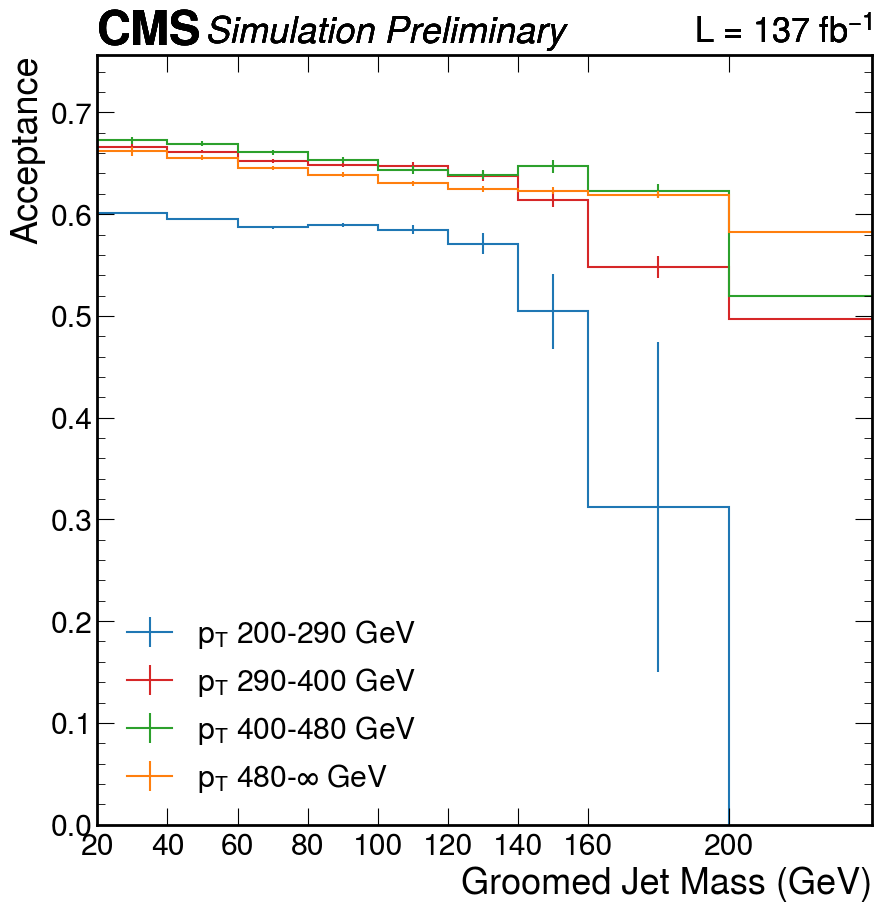

In [33]:

accepted = resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen').values()
missed = misses.project('ptgen', 'mgen').values()
accepted_unc =resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen').variances()**0.5
#mgen_edge[-1] = 240
for ipt in range(4):
    hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = color_pt[ipt], label = title_list[ipt])
    # Set x-ticks to bin edges
    xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mgen_edge, xtick_labels)
    
    plt.legend()

    if not groomed:
        plt.xlim(20,241)
        plt.xlabel("Groomed Jet Mass (GeV)")
    else:
        plt.xlim(10, 241)
        plt.xlabel("Ungroomed Jet Mass (GeV)")
    plt.ylabel("Acceptance")
    hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')

/tmp/ipykernel_1875/3340273443.py:7: RuntimeWarning: invalid value encountered in divide
  hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])
/tmp/ipykernel_1875/3340273443.py:7: RuntimeWarning: invalid value encountered in divide
  hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])
/tmp/ipykernel_1875/3340273443.py:7: RuntimeWarning: invalid value encountered in divide
  hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])


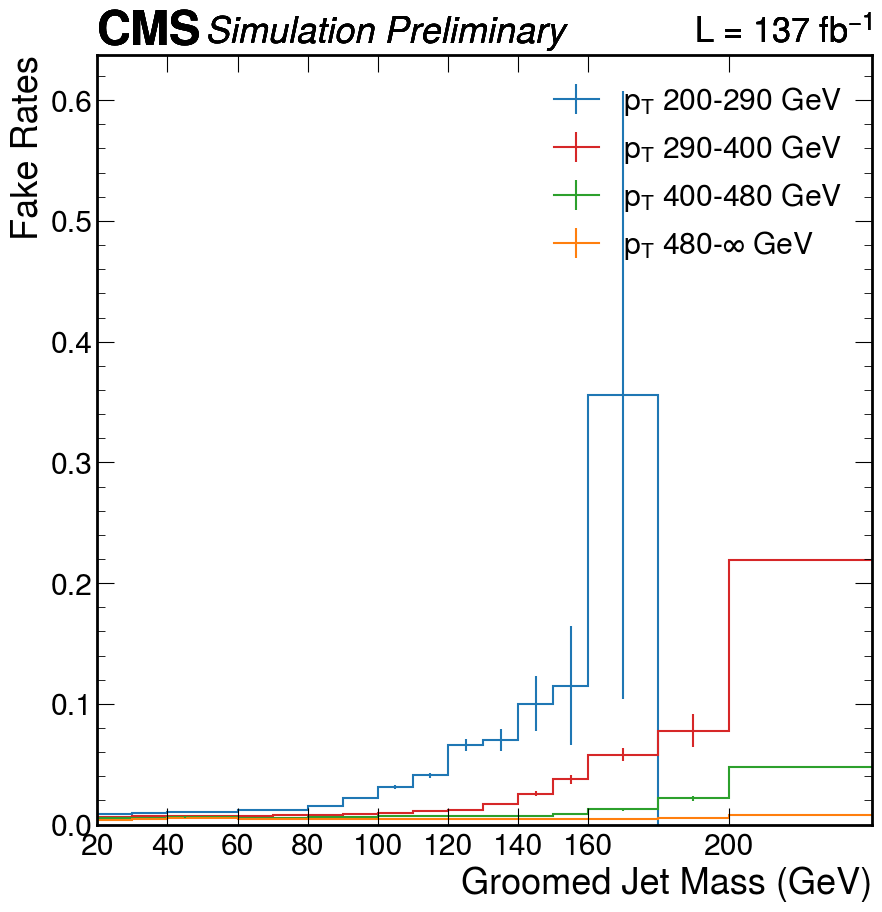

In [34]:

accepted_reco = resp_matrix_4d[{'systematic':'nominal'}].project('ptreco', 'mreco').values()
faked = fakes.project('ptreco', 'mreco').values()
faked_unc =  fakes.project('ptreco', 'mreco').variances()**0.5
# mreco_edge[-2] = 220
# mreco_edge[-1] = 240
for ipt in range(4):
    hep.histplot(faked[ipt]/(faked[ipt] + accepted_reco[ipt]), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = color_pt[ipt], label = title_list[ipt])
    # Set x-ticks to bin edges
    xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mgen_edge, xtick_labels)
    
    plt.legend()

    if not groomed:
        plt.xlim(20,241)
        plt.xlabel("Groomed Jet Mass (GeV)")
    else:
        plt.xlim(10, 241)
        plt.xlabel("Ungroomed Jet Mass (GeV)")
    plt.ylabel("Fake Rates")
    hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')

In [35]:
mreco_edge

array([0.0e+00, 1.0e+01, 2.0e+01, 3.0e+01, 4.0e+01, 5.0e+01, 6.0e+01,
       7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02, 1.2e+02, 1.3e+02,
       1.4e+02, 1.5e+02, 1.6e+02, 1.8e+02, 2.0e+02, 5.0e+02, 1.3e+04])

/tmp/ipykernel_1875/4018165049.py:2: RuntimeWarning: invalid value encountered in divide
  hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')
/tmp/ipykernel_1875/4018165049.py:3: RuntimeWarning: invalid value encountered in divide
  hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = 'r', label = 'Acceptance')


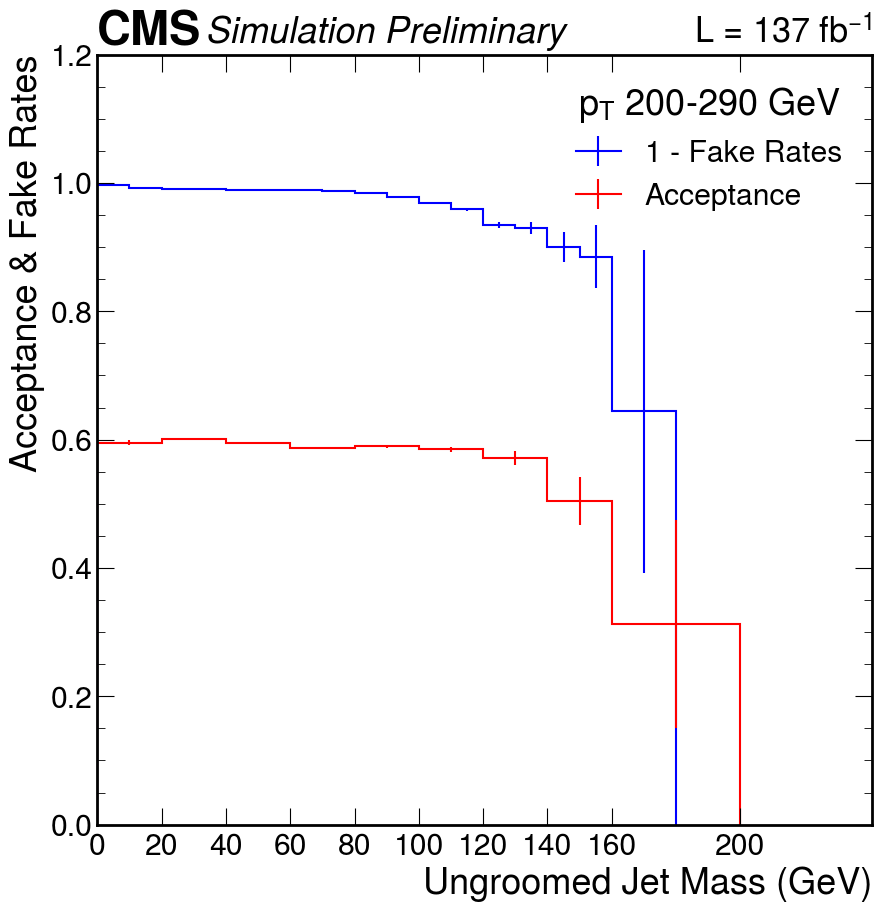

/tmp/ipykernel_1875/4018165049.py:2: RuntimeWarning: invalid value encountered in divide
  hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')


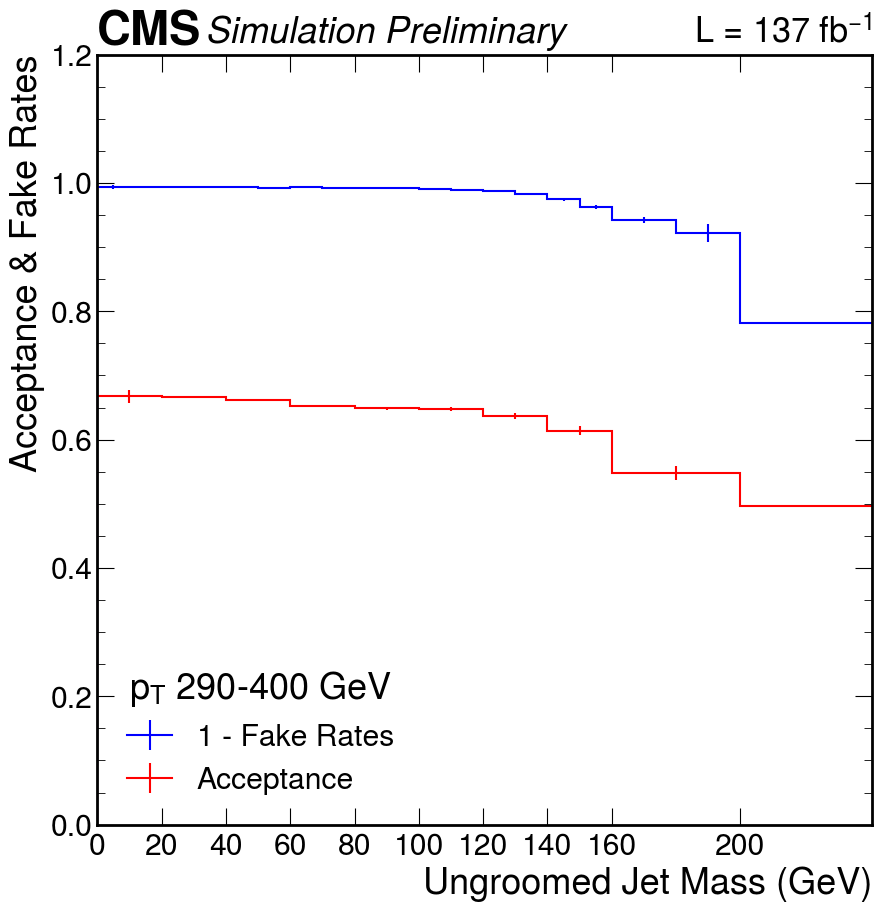

/tmp/ipykernel_1875/4018165049.py:2: RuntimeWarning: invalid value encountered in divide
  hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')


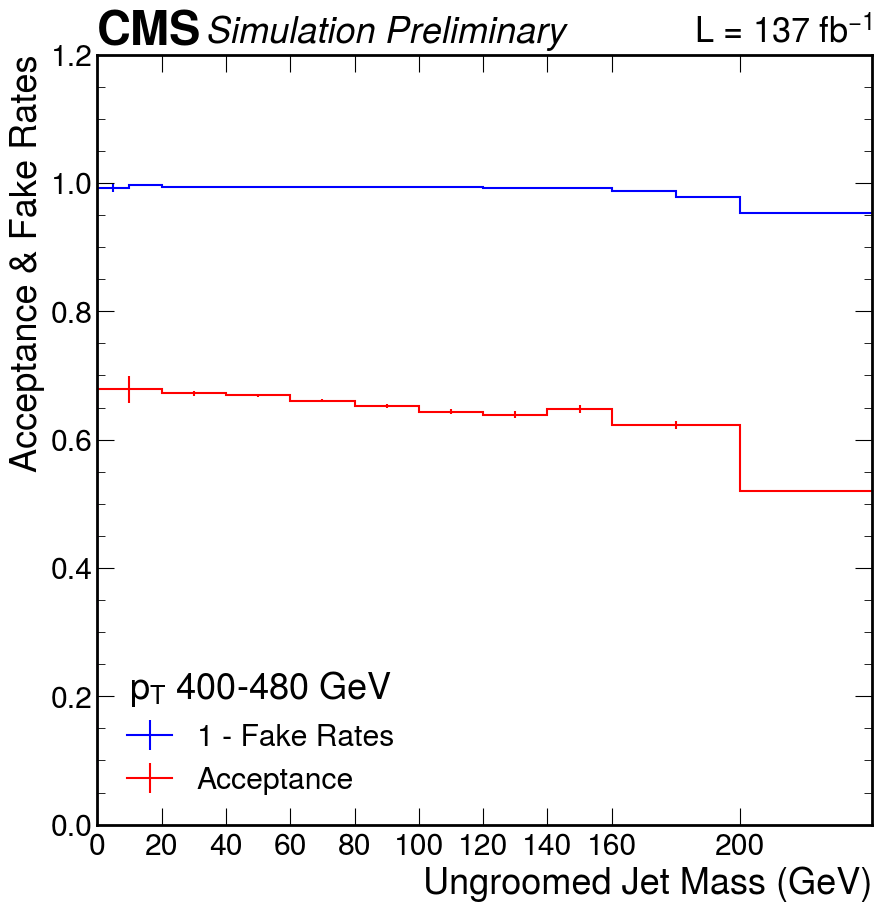

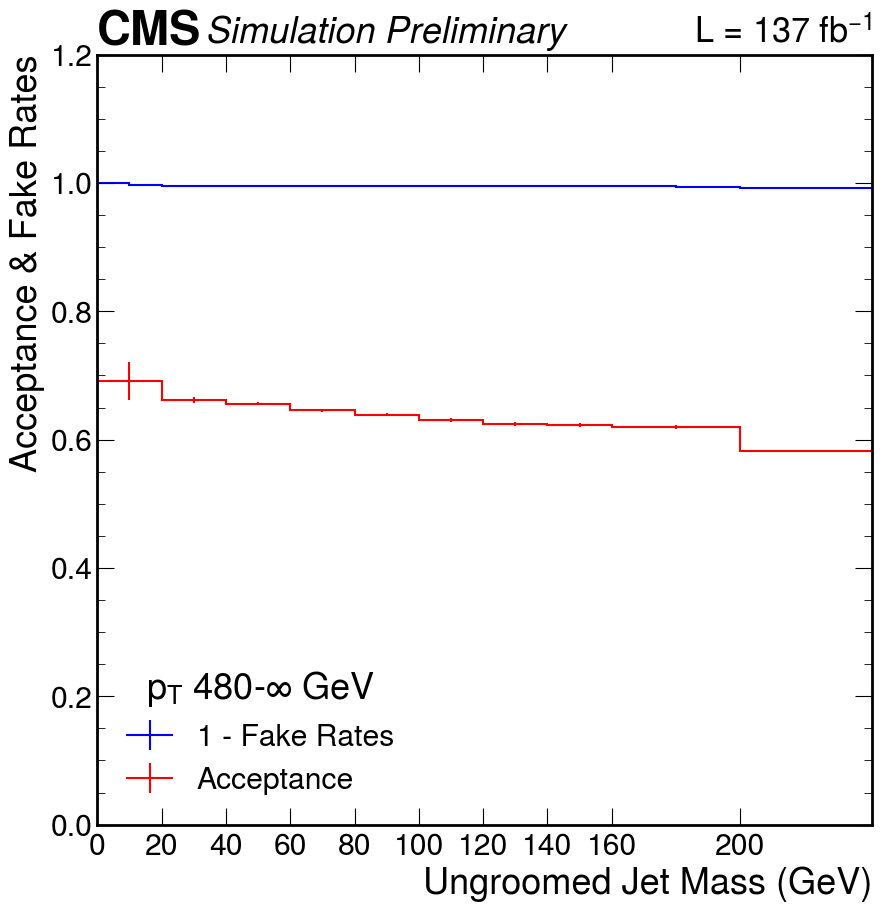

In [36]:
for ipt in range(4):
    hep.histplot( 1 - (faked[ipt]/(faked[ipt] + accepted_reco[ipt])), mreco_edge, yerr = faked_unc[ipt]/(faked[ipt] + accepted_reco[ipt]), color = 'b', label = '1 - Fake Rates')
    hep.histplot(accepted[ipt]/(missed[ipt] + accepted[ipt]), mgen_edge, yerr = accepted_unc[ipt]/(missed[ipt] + accepted[ipt]), color = 'r', label = 'Acceptance')

    xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mgen_edge, xtick_labels)
    
    plt.legend(title = title_list[ipt])
    if not groomed:
        plt.xlim(0,241)
        plt.xlabel("Ungroomed Jet Mass (GeV)")
    else:
        plt.xlim(0, 241)
        plt.xlabel("Groomed Jet Mass (GeV)")
    plt.ylabel("Acceptance & Fake Rates")
    plt.ylim(0, 1.2)
    hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')
    
    if groomed:
        plt.savefig(f'plots/fakerates_groomed_{ipt}.pdf')
    else:
        plt.savefig(f'plots/fakerates_ungroomed_{ipt}.pdf')

    plt.show()

In [37]:
# for ipt in range(4):
#     hep.histplot(resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'ptreco', 'mreco')[hist.underflow, : , :][ipt,:].values()/(accepted[ipt]), mreco_edge, color = color_pt[ipt], label = title_list[ipt])
#     xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
#     xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
#     plt.tick_params(axis='x', which='minor', top=False, bottom=False)

#     plt.xticks(mgen_edge, xtick_labels)
    
#     plt.legend(fontsize = 20)

#     if not groomed:
#         plt.xlim(20,241)
#         plt.xlabel("Groomed Jet Mass (GeV)")
#     else:
#         plt.xlim(10, 241)
#         plt.xlabel("Ungroomed Jet Mass (GeV)")
#     plt.ylabel("Fake Rates Due to Underflow")
#     hep.cms.label("Preliminary", rlabel = r'L = 137 $fb^{-1}$')

In [38]:
# m3 = resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen', 'ptreco', 'mreco')[:,:, sum, hist.rebin(2)].values()
# plt.figure(figsize = (20, 20))
# for ipt in range(4):
#     m30 = m3[ipt]
#     plt.subplot(2, 2, ipt+1)
    
#     hep.histplot(np.diag(m3[ipt])/m3[ipt].sum(axis = 1),mgen_edge, label = 'Stability')
#     hep.histplot(np.diag(m3[ipt])/m3[ipt].sum(axis = 0),mgen_edge, label = 'Purity', color = 'r')
#     plt.xlim(20,250)
#     plt.xlabel("Ungroomed Jet Mass (GeV)")
#     plt.ylabel("Fraction")
#     plt.legend(title = title_list[ipt])
#     xtick_labels = [str(int(tick)) for tick in mgen_edge]  # Convert to string
#     xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
#     plt.tick_params(axis='x', which='minor', top=False, bottom=False)

#     plt.xticks(mgen_edge, xtick_labels)
#     #plt.show()

In [39]:
unfolder_dn = Unfolder(input_data, 
                    resp_matrix_4d[{'systematic':'nominal'}] ,
                    #resp_matrix_4d_jk,
                    fakes = fakes,
                    misses = misses,
                    backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                    #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                    systematics = sys_matrix_dic_down,
                    #systematics= None,
                    #systematics = jes_sys_list_up,
                    closure = False,
                    groomed = groomed,
                    is_uf = True,
                    merge = False,
                    normalised_xs = True,
                    do_syst = True,
                    discard_low_bins = False,
                    regularisation= 'ScanSURE',
                    do_norm = False
                           )

10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (80,)


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:175: RuntimeWarning: invalid value encountered in divide
  self.miss_frac = self.miss_values/ ( self.M_np.sum(axis = 1))


Working until background subtractions
Unfolder object created
Condition number of the matrix  3.449173276158545e+16


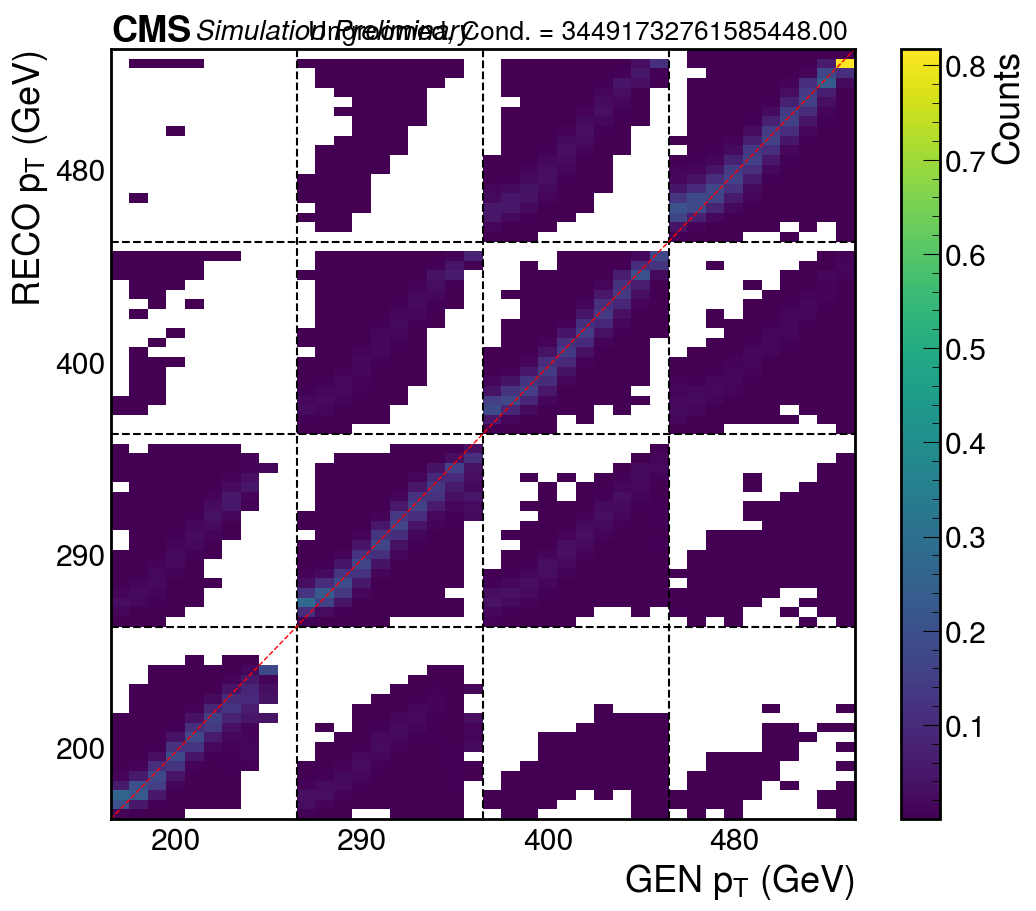

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 10 41
Info in <TUnfold::TUnfold>: 80 input bins and 39 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (signal:ptgen[200,290]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #41
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 7/80 input bins have zero error, and are ignored.
Warning in <TROOT::Append>: Replacing existing TH1: Prob (Potential memory leak).


In [40]:
unfolder.plot_response_matrix(probability_matrix=True)


In [41]:
unfolder.h_np.sum()

np.float64(260848.9799490993)

In [42]:
unfolder.M_np.sum()

np.float64(191854.29386099963)

In [43]:
unfolder.htrue_np.shape

(40,)

In [44]:
resp_matrix_4d[..., 'nominal'].project('ptreco', 'mreco')[:, hist.rebin(2)].values().flatten().shape

(40,)

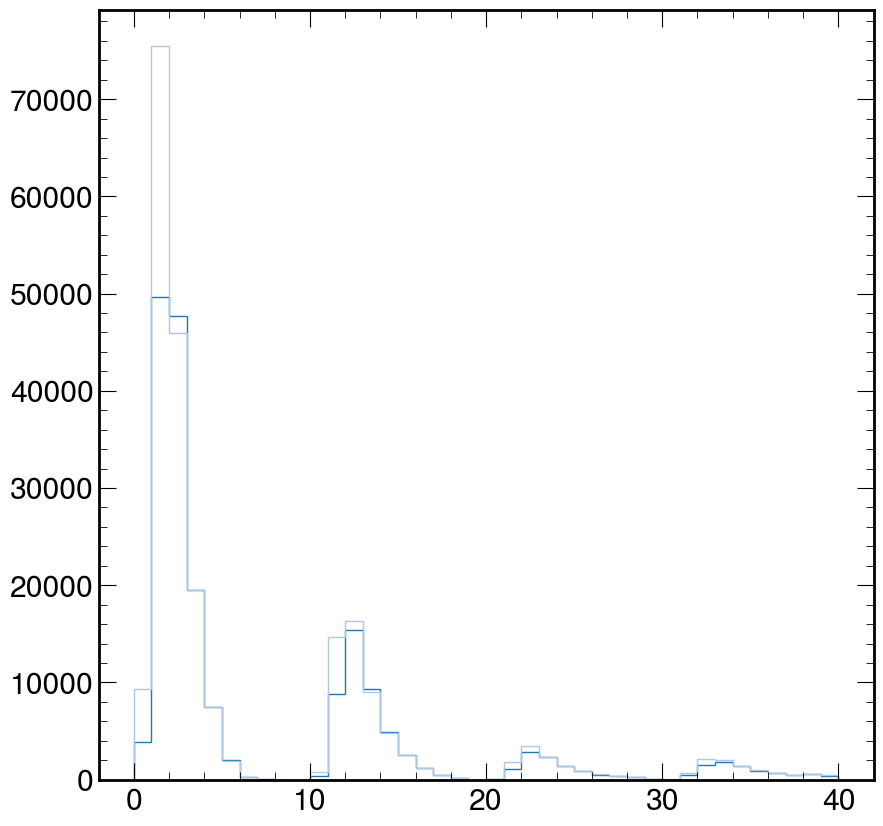

In [45]:
plt.stairs(unfolder.htrue_np)
plt.stairs(resp_matrix_4d[..., 'nominal'].project('ptreco', 'mreco')[:, hist.rebin(2)].values().flatten())

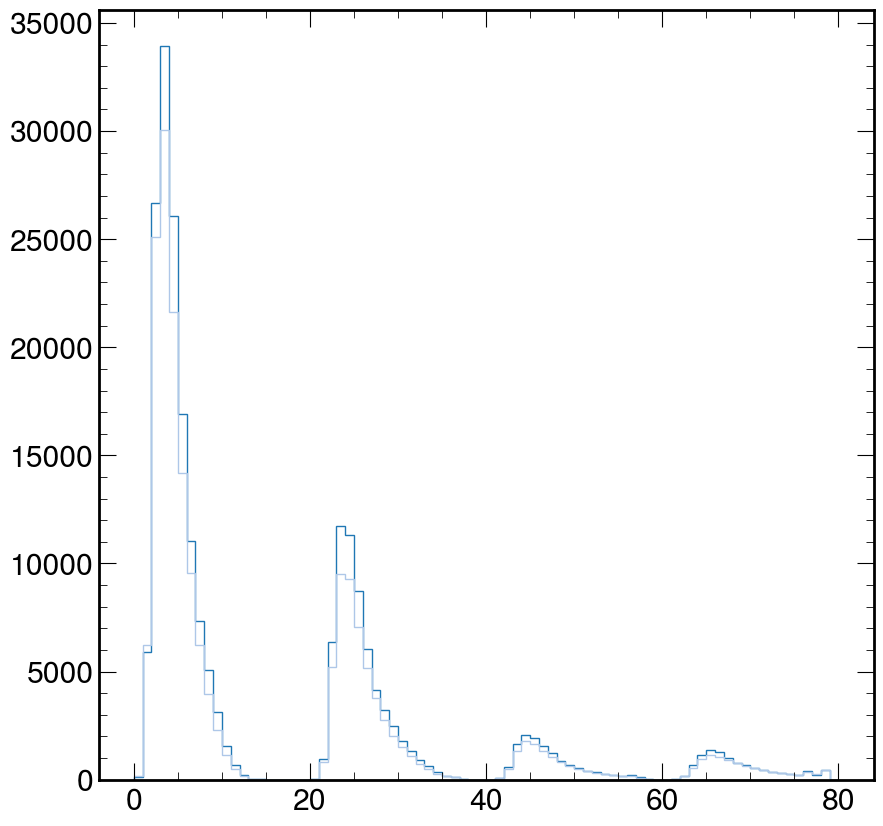

In [46]:
plt.stairs((221732/259859)*unfolder.h_np)
plt.stairs(unfolder.M_np.sum(axis = 0))

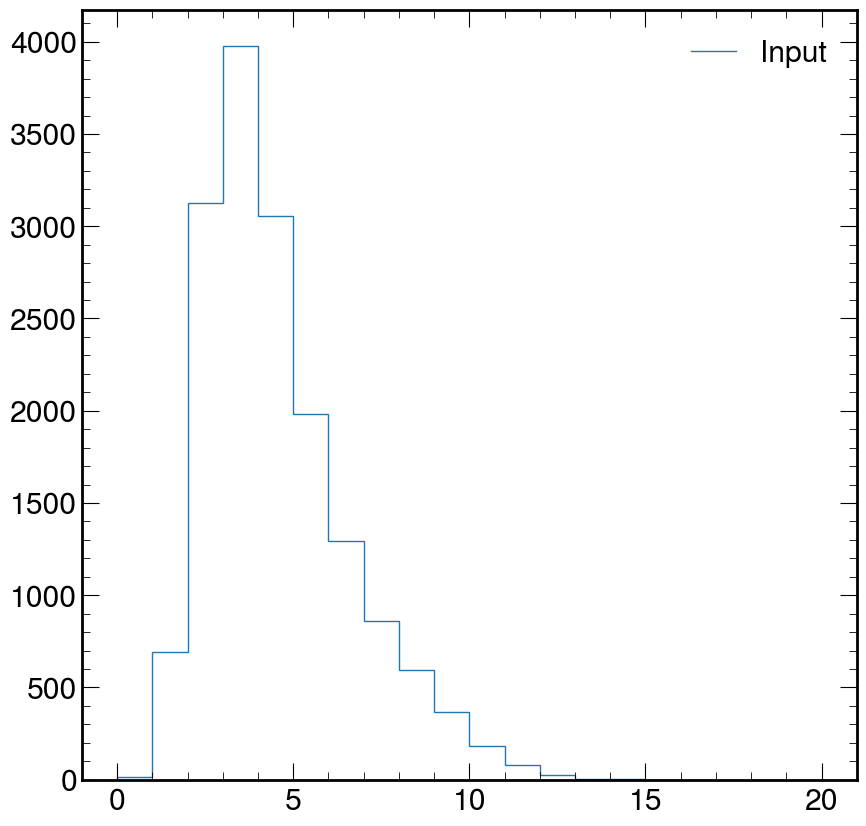

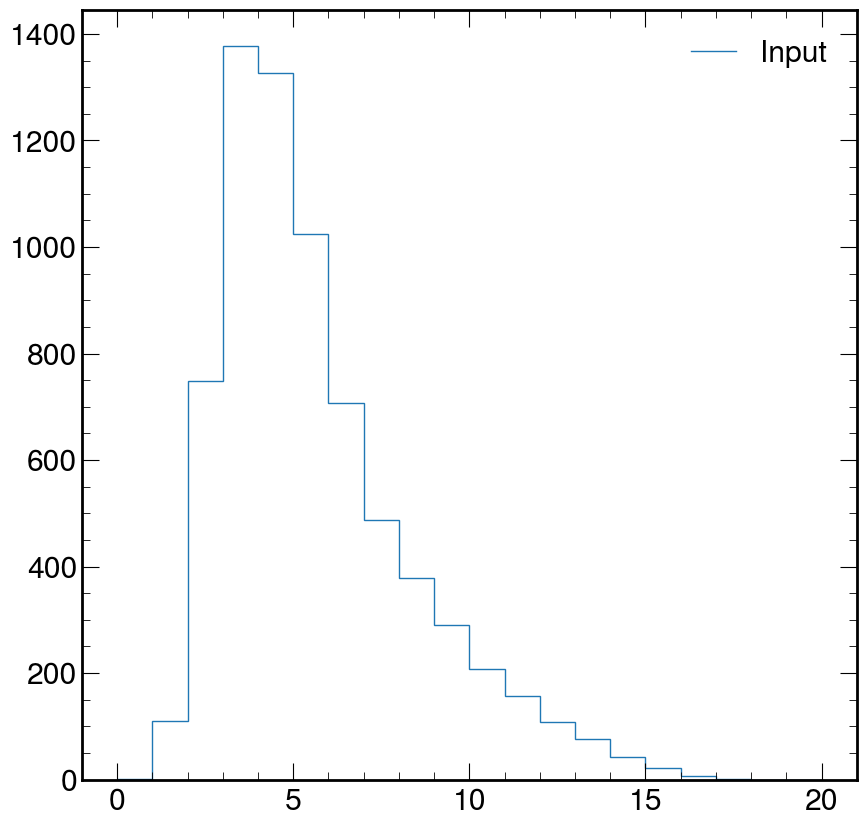

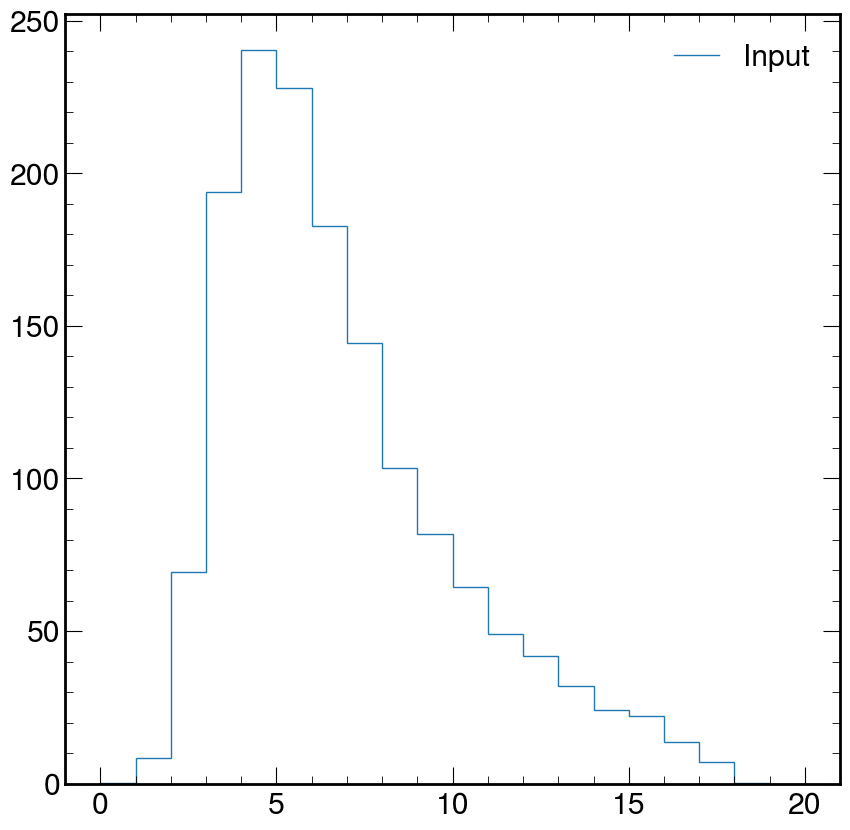

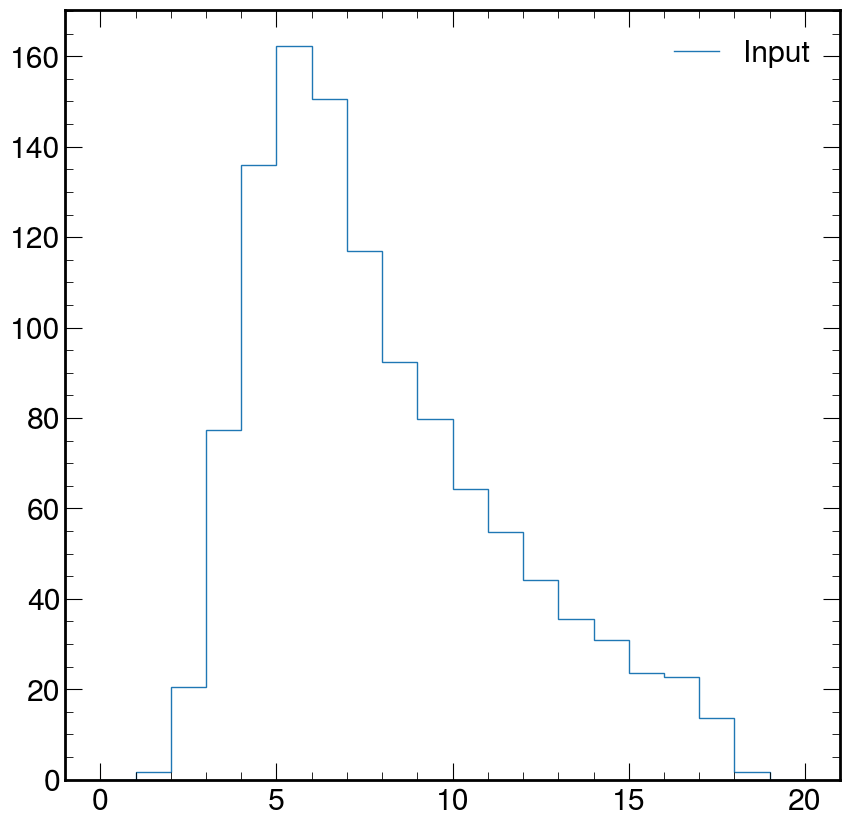

In [47]:
unfolder.plot_input()

In [48]:
len(sys_matrix_dic)

122

In [49]:
#sys_matrix_dic.pop('eletrigUp')

Working until background subtractions
Unfolder object created
Regularisation USED None
Tau value 0.0
Output Underflow 0.0, output overflow 0.0
260848.9799490993
417904.50456240145


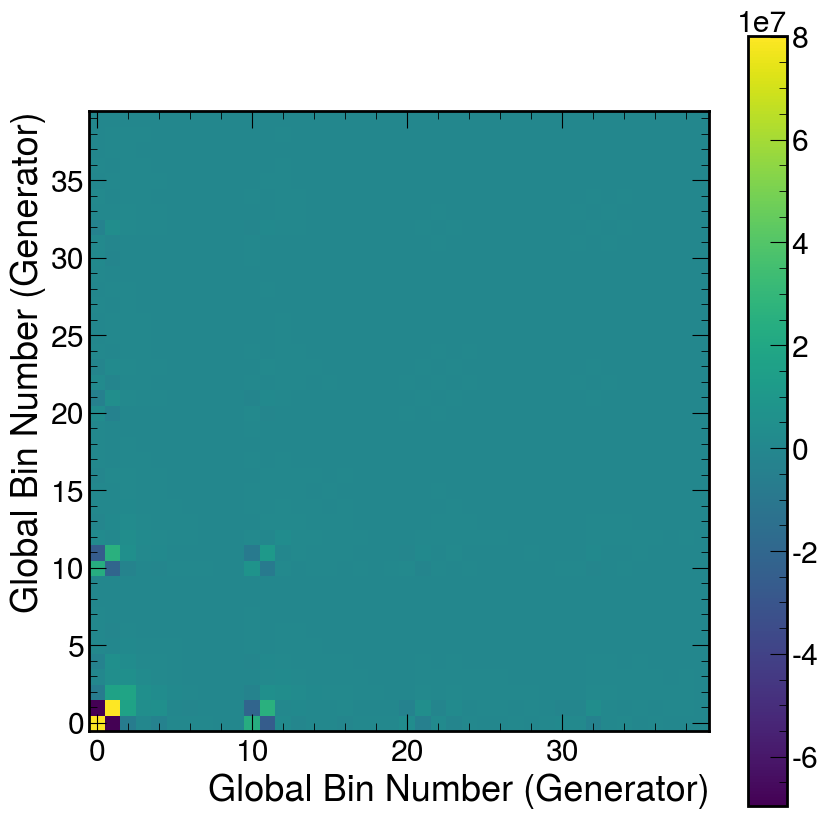

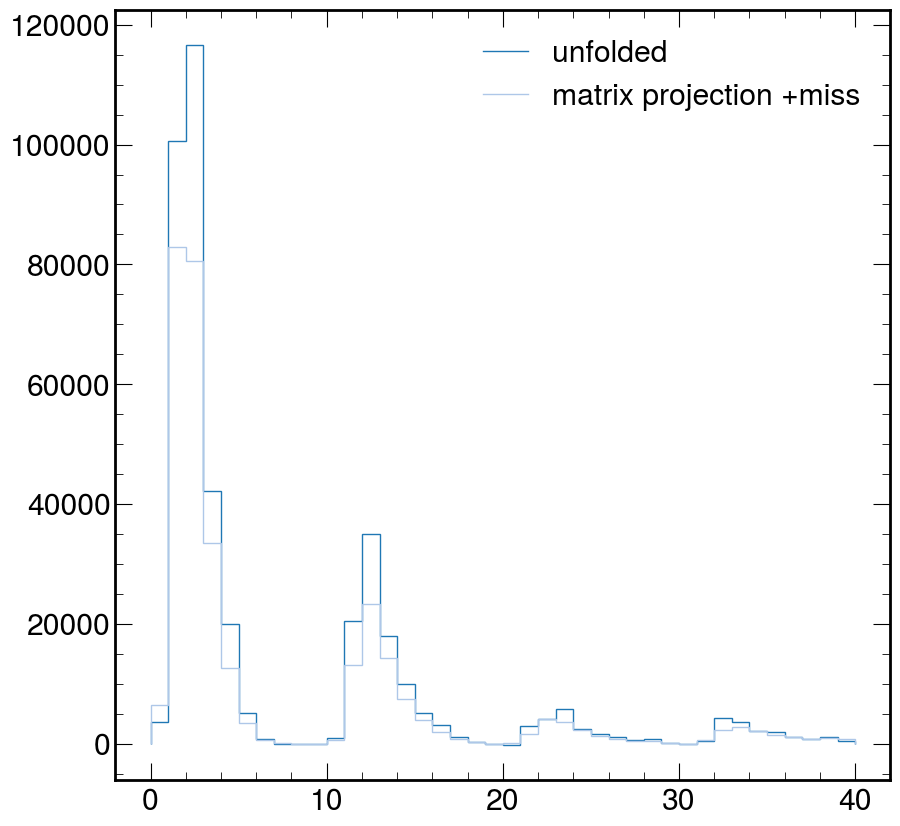

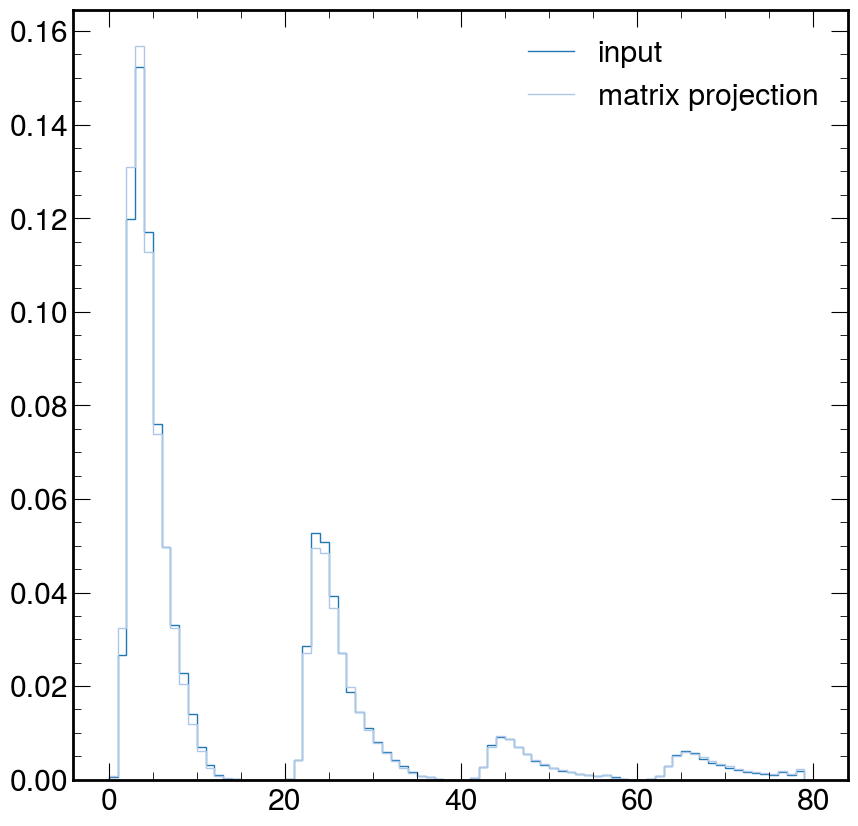

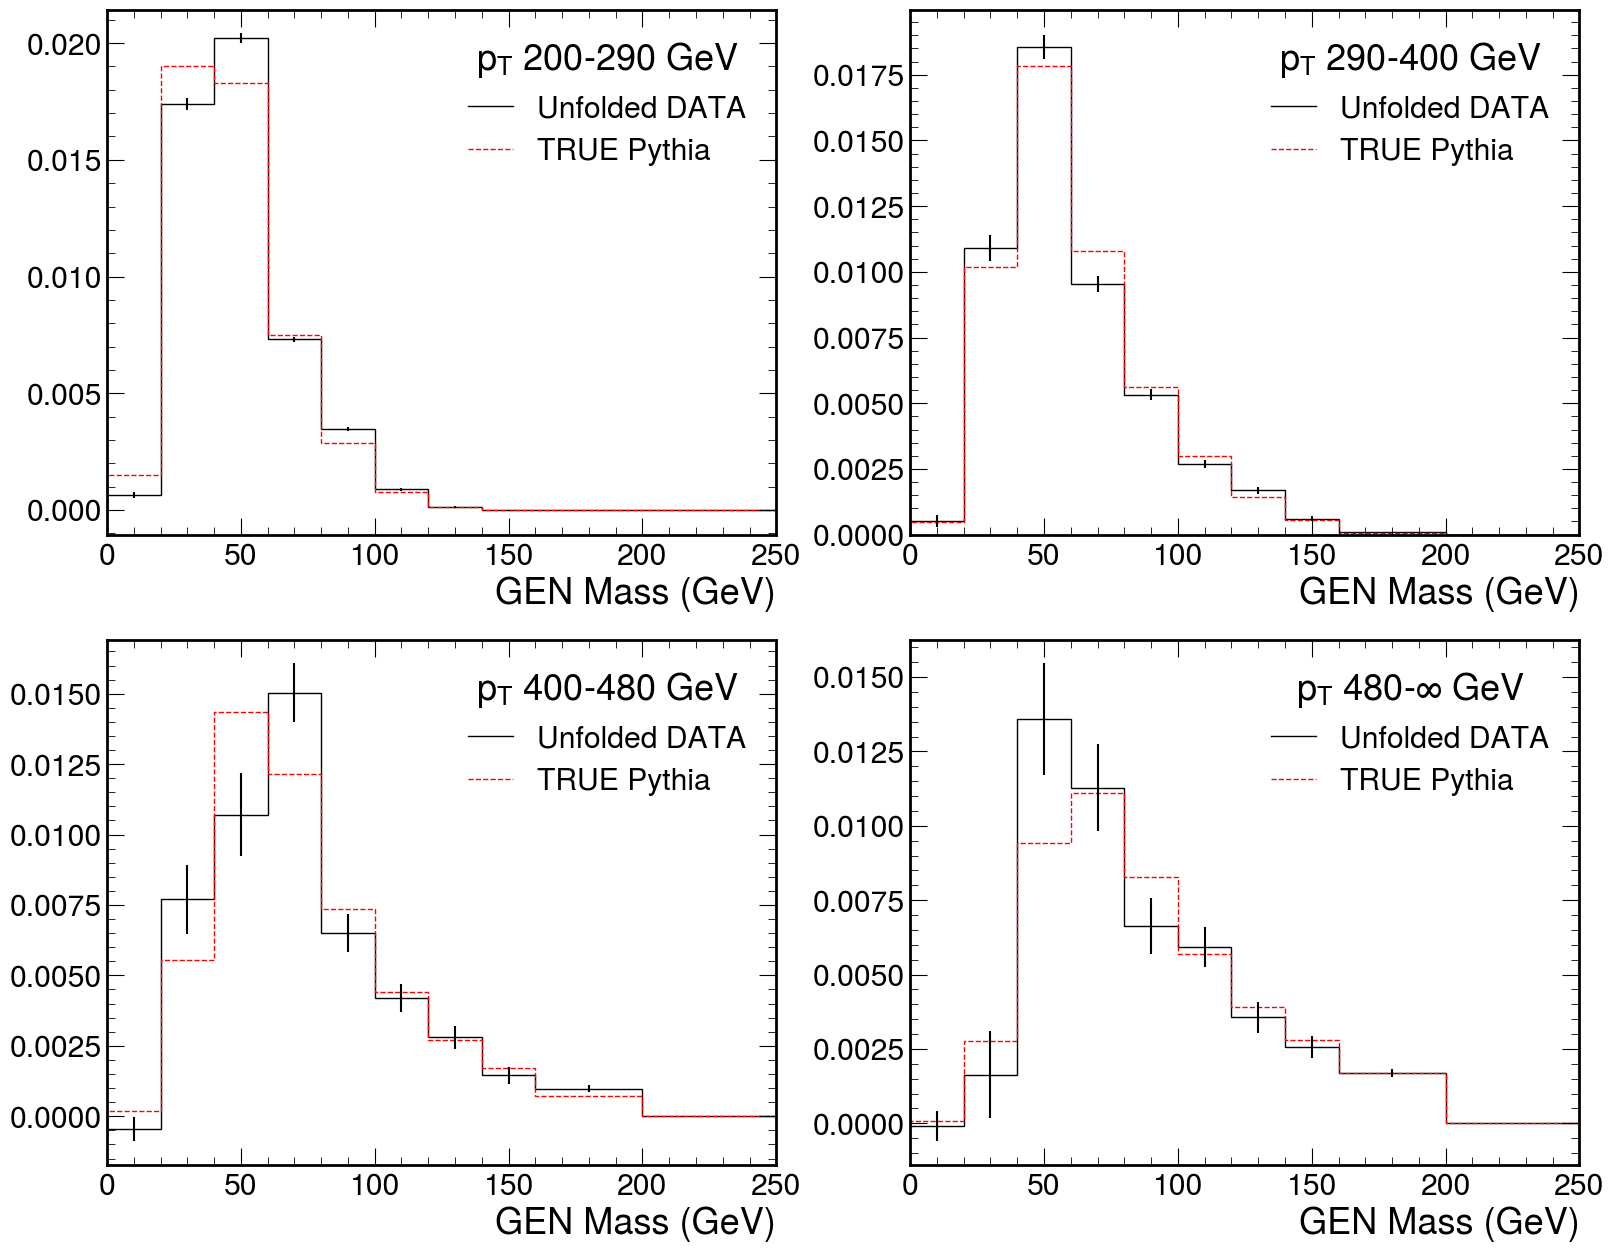

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2016 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2017 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteMPFBiasUp_uncorr_2018 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MJES_AbsoluteScaleUp_corr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing 

In [50]:
unfolder.perform_unfold('None')

# Plot the covariance matrix or unfolded distributions:
unfolder.plot_covariance()
unfolder.plot_unfolded()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x730cdfe65d30>, errorbar=None, legend_artist=None)]

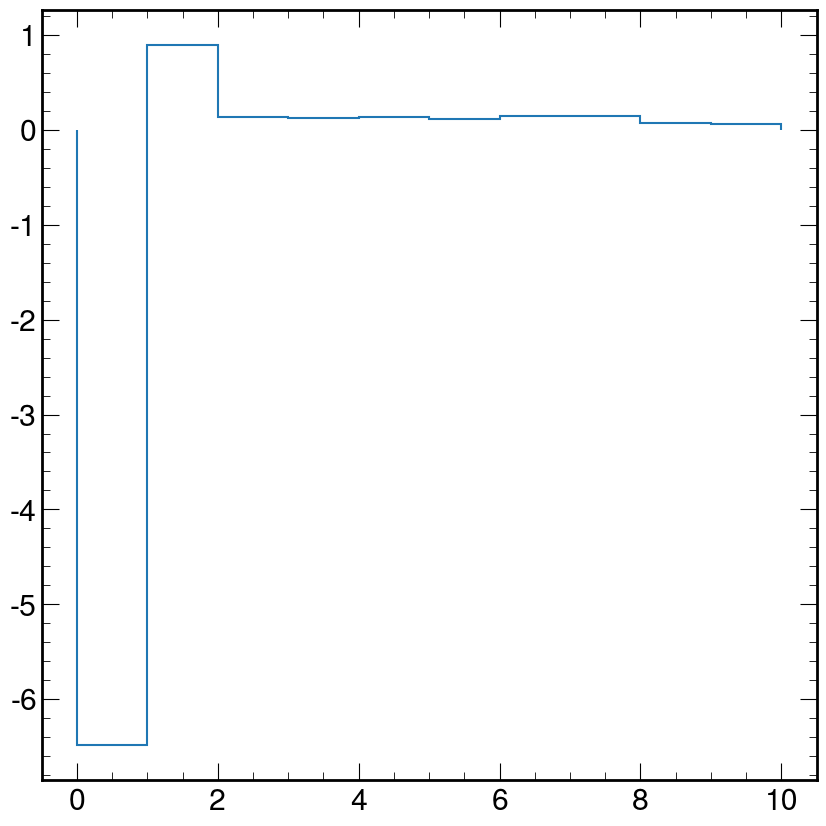

In [51]:
hep.histplot(unfolder.stat_pt_binned[ipt]/unfolder.output_pt_binned[ipt])

In [52]:
# for i in range(4):
#     plt.stairs(o_good[i],  lw = 2, label = "good cond number")
#     plt.stairs(o_bad[i]+10*i, ls = '--',  label = "bad cond number")
# plt.legend()
# plt.yscale('log')

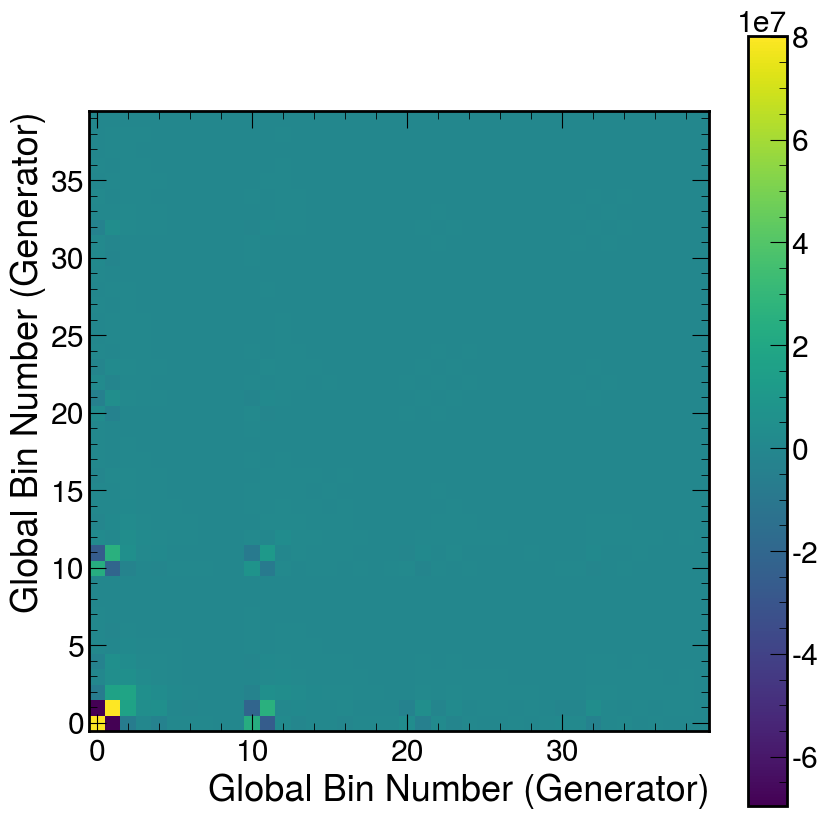

In [53]:
unfolder.plot_covariance()

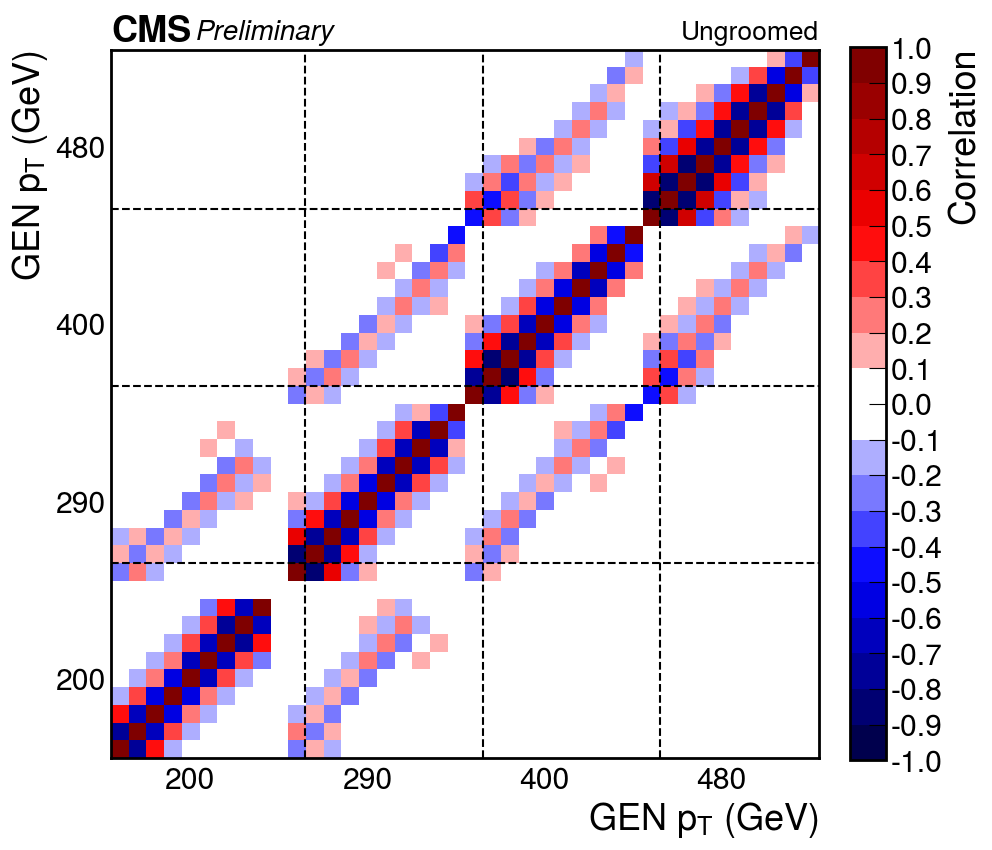

In [54]:
ax = unfolder.plot_correlation()
if groomed:
    hep.cms.label("Preliminary" , fontsize = 20, data = True, ax = ax, rlabel = "Groomed")
else:
    hep.cms.label("Preliminary" , fontsize = 20, data = True, ax = ax, rlabel = "Ungroomed")

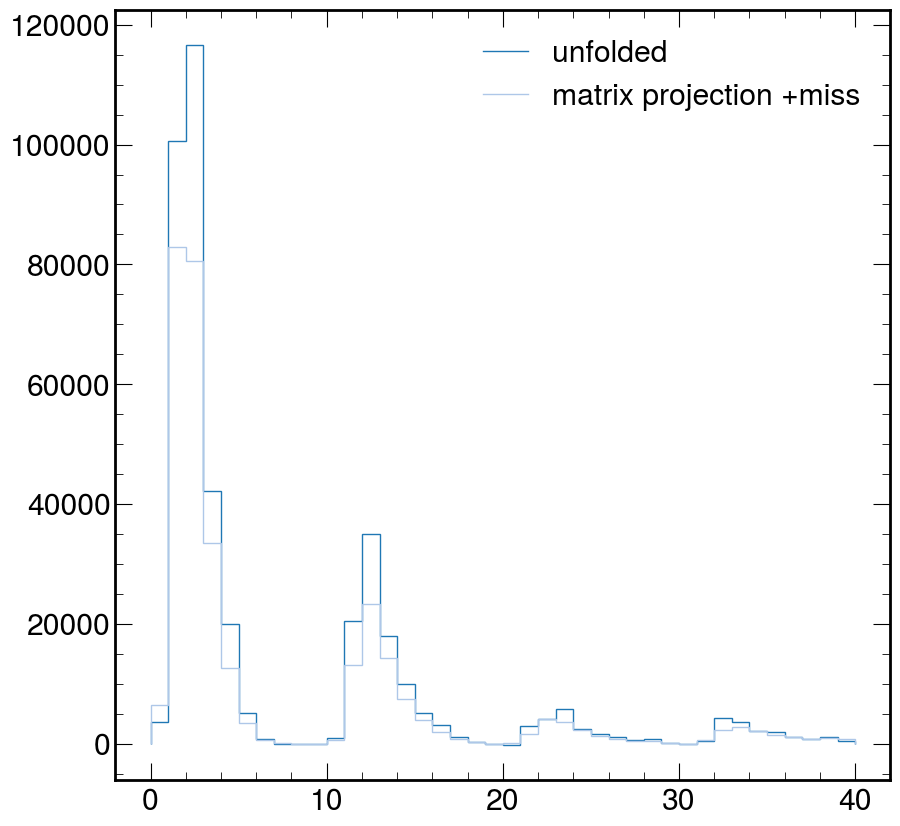

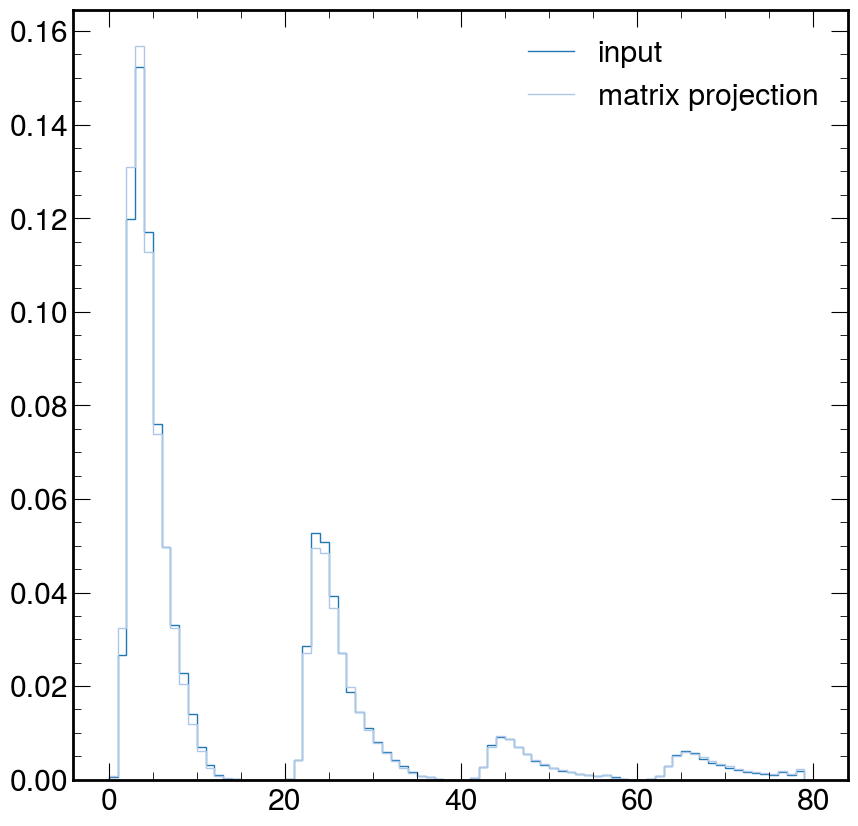

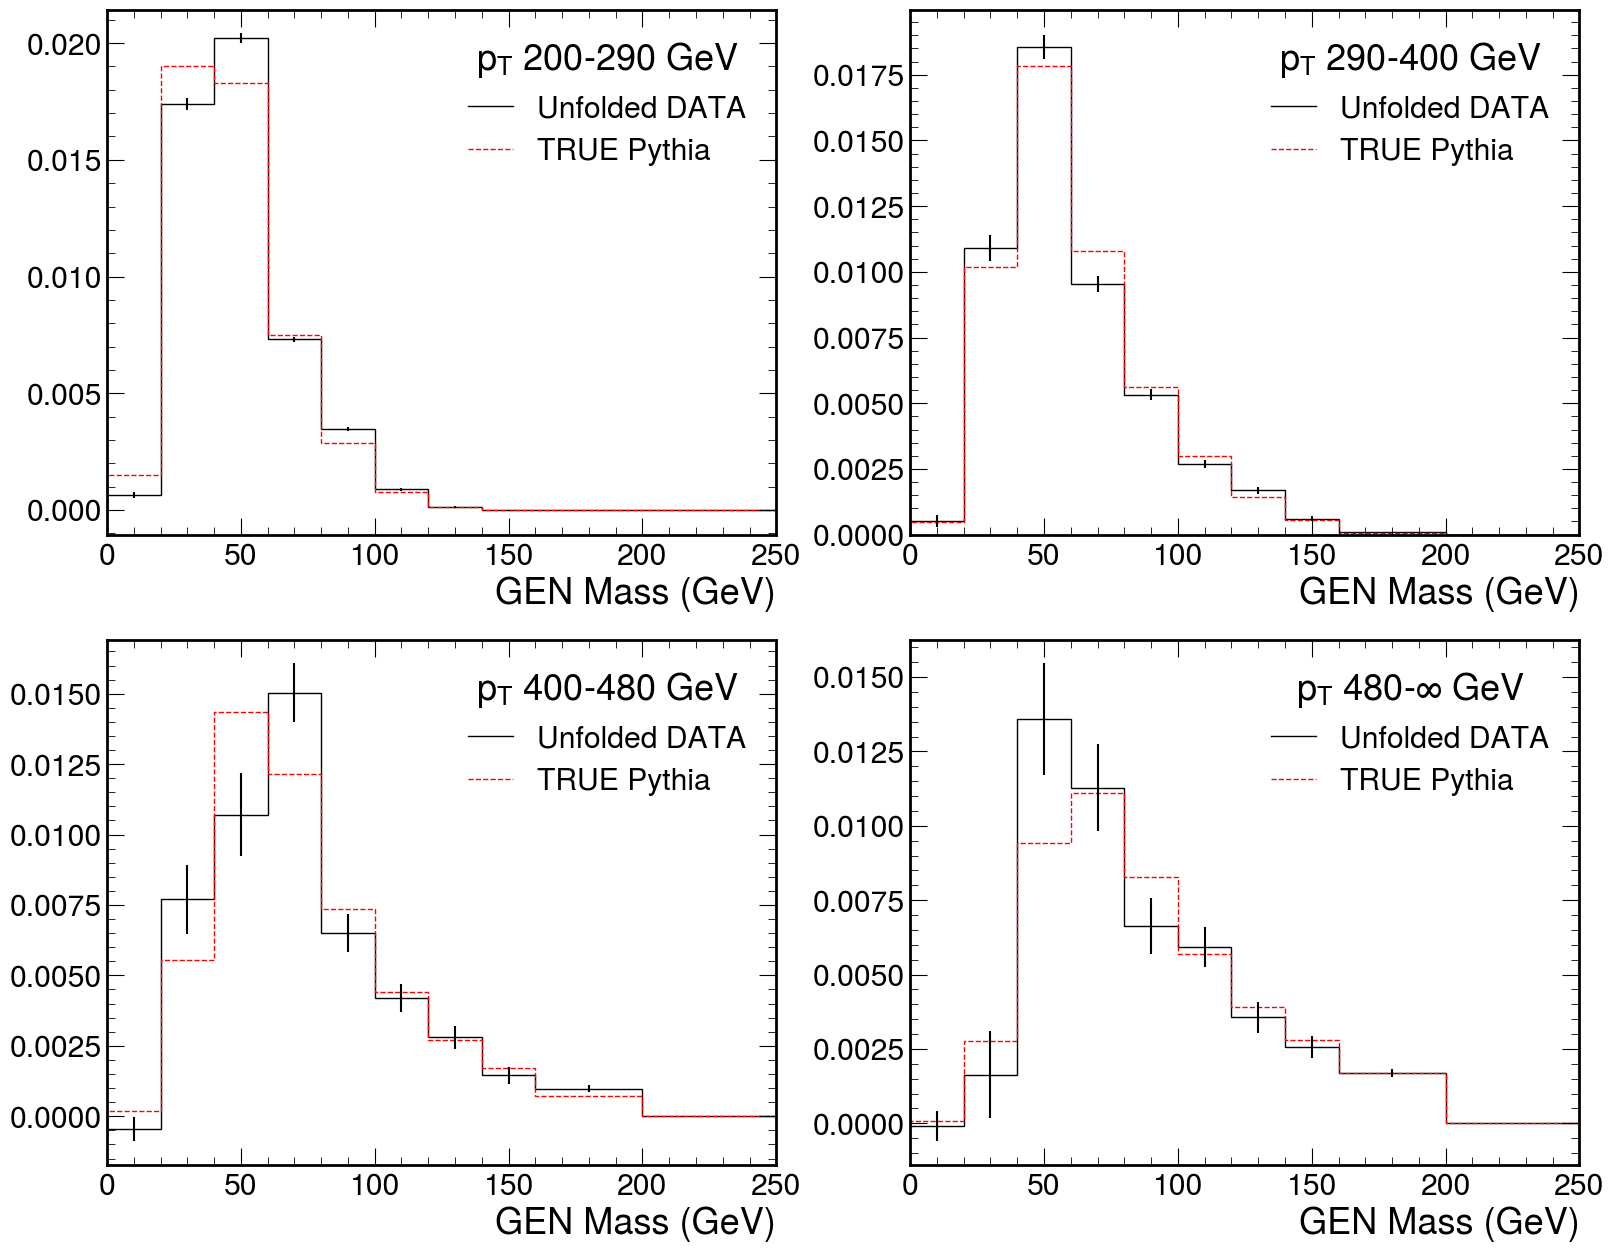

In [55]:
unfolder.plot_unfolded()

Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 2.7890290900785738e-05
Output Underflow 0.0, output overflow 0.0
260848.9799490993
417903.9854453072


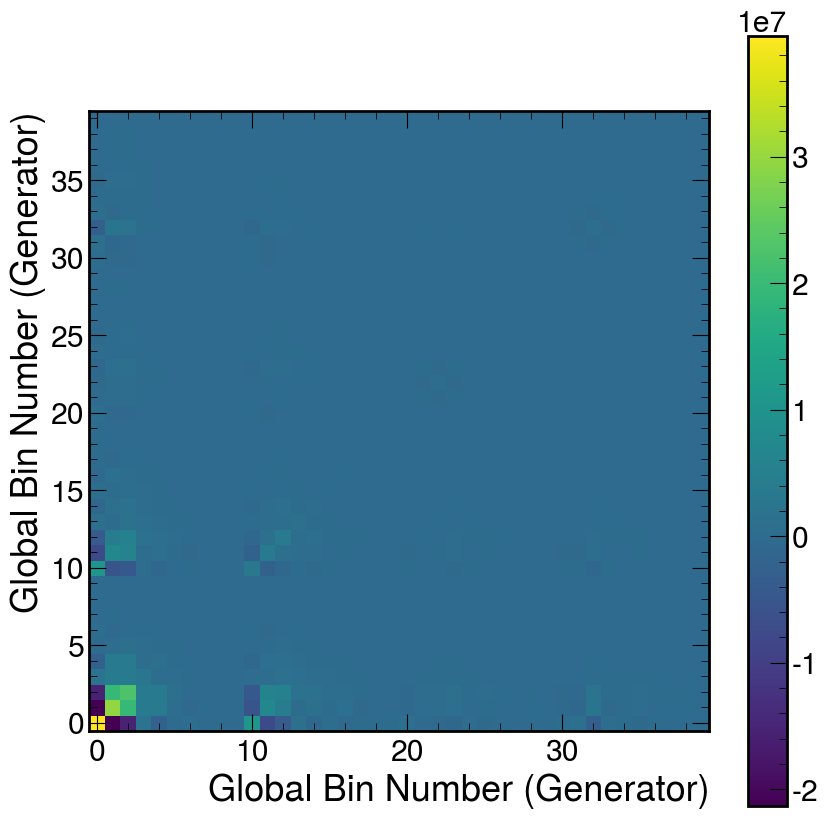

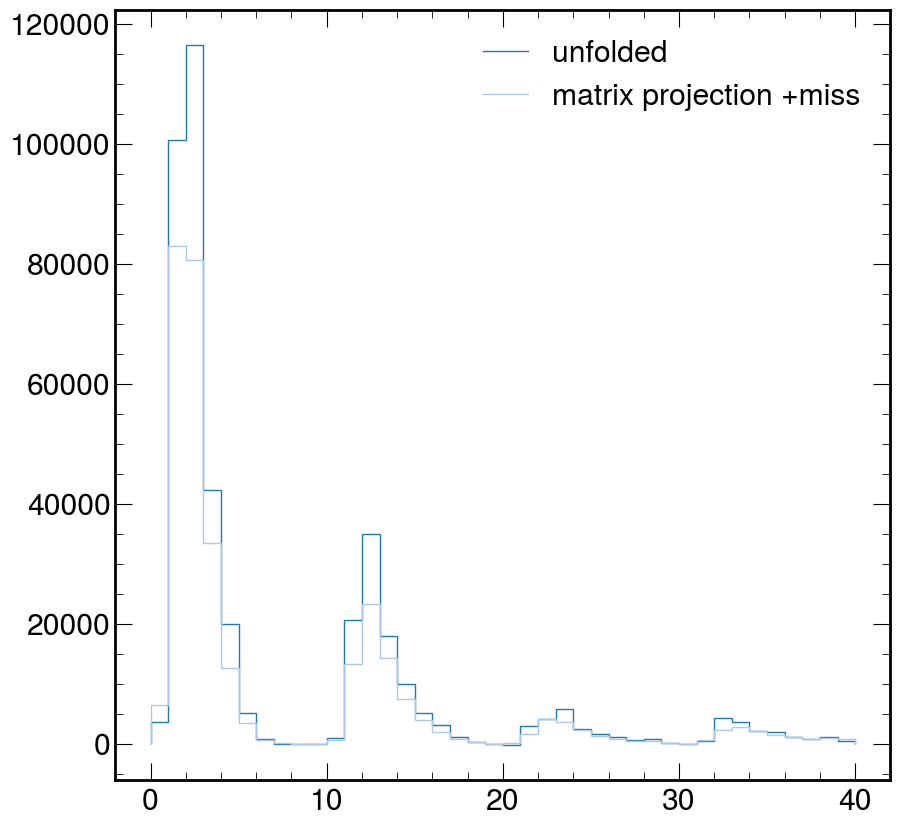

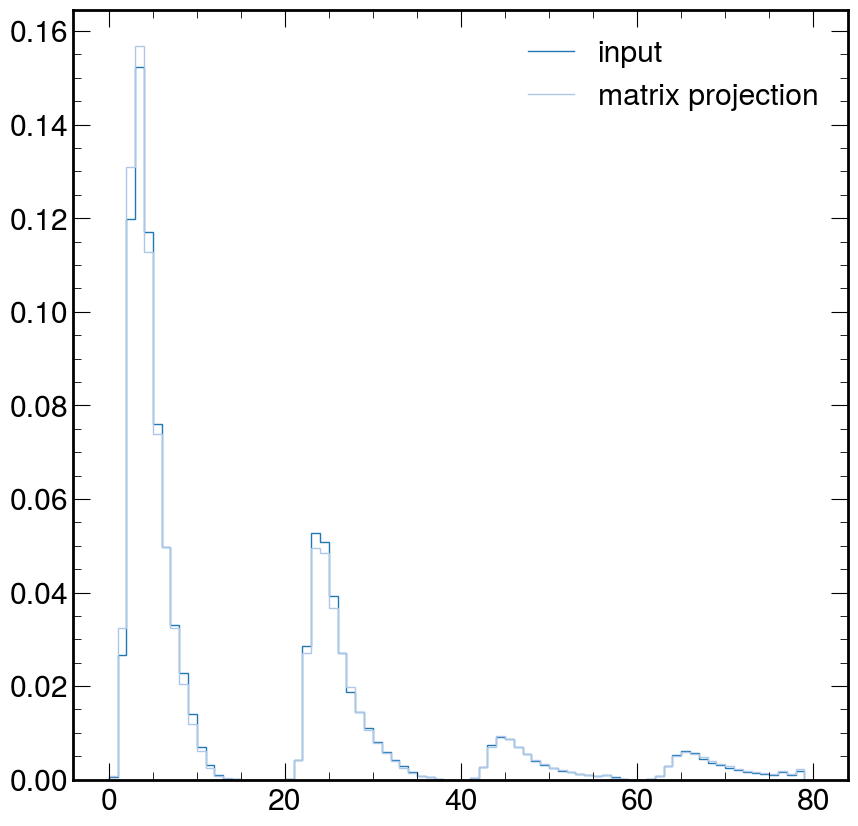

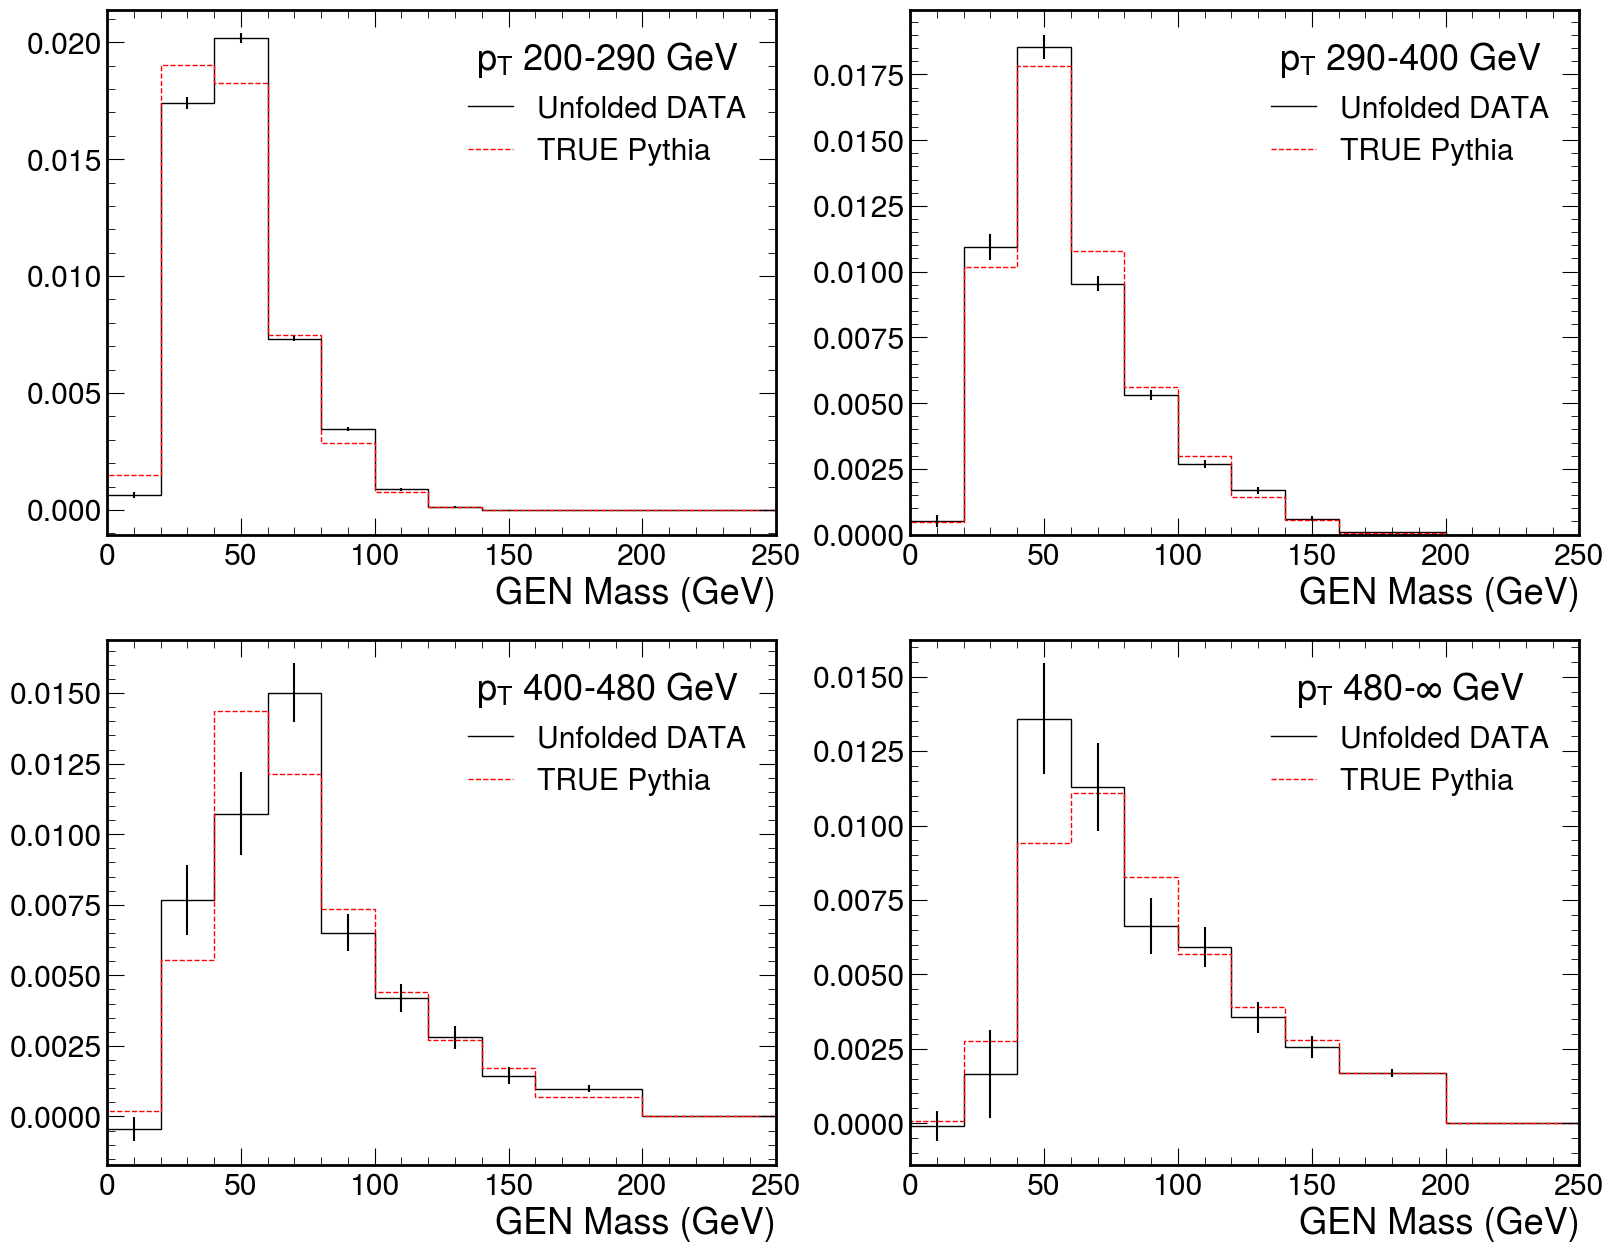

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 10 41
Info in <TUnfold::TUnfold>: 80 input bins and 39 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (signal:ptgen[200,290]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #41
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 7/80 input bins hav

In [56]:
unfolder_dn.perform_unfold()

# Plot the covariance matrix or unfolded distributions:
unfolder_dn.plot_covariance()
unfolder_dn.plot_unfolded()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:729: RuntimeWarning: invalid value encountered in divide
  plt.stairs(np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge , label = sys )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:731: RuntimeWarning: invalid value encountered in divide
  plt.stairs(total_sys_jes[i*self.nmbinsGen  :(i+1)*self.nmbinsGen]/np.abs(self.output_pt_binned[i]), self.mgen_edge , label = "JESUp" )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:732: RuntimeWarning: invalid value encountered in divide
  plt.stairs(self.total_sys[i*self.nmbinsGen  :(i+1)*self.nmbinsGen]/np.abs(self.output_pt_binned[i]), self.mgen_edge , label = "Total" )


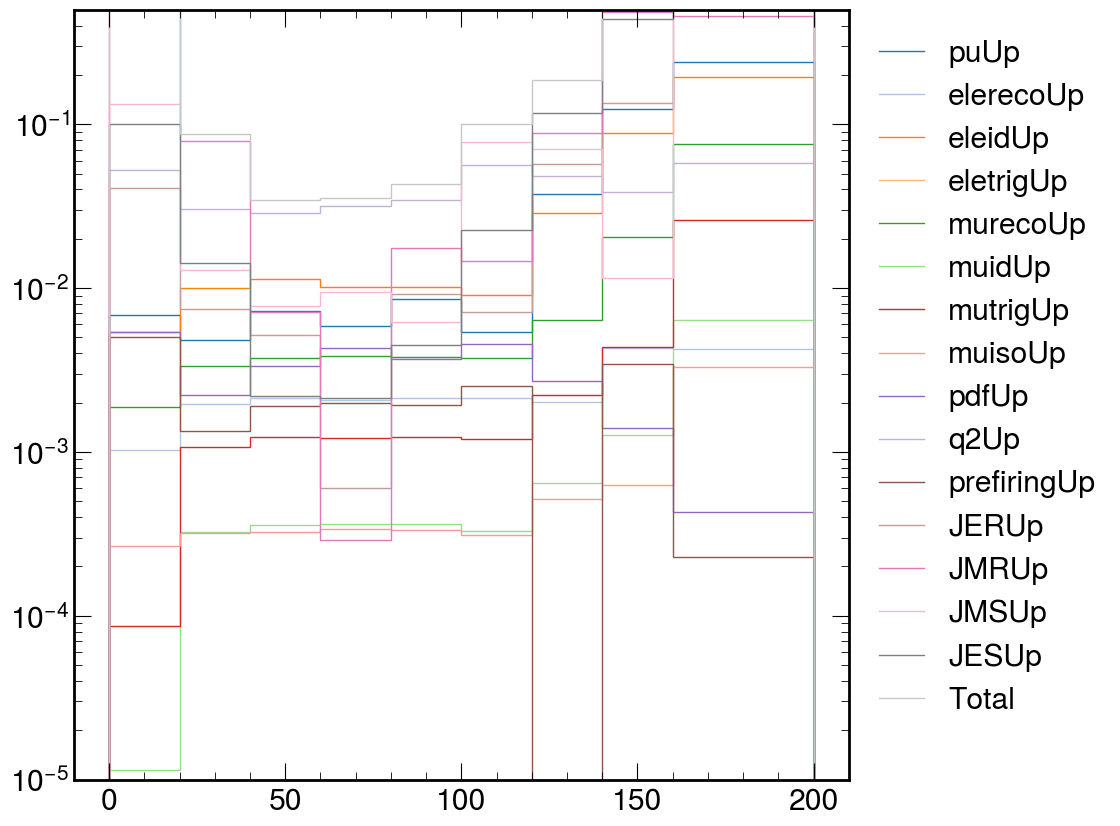

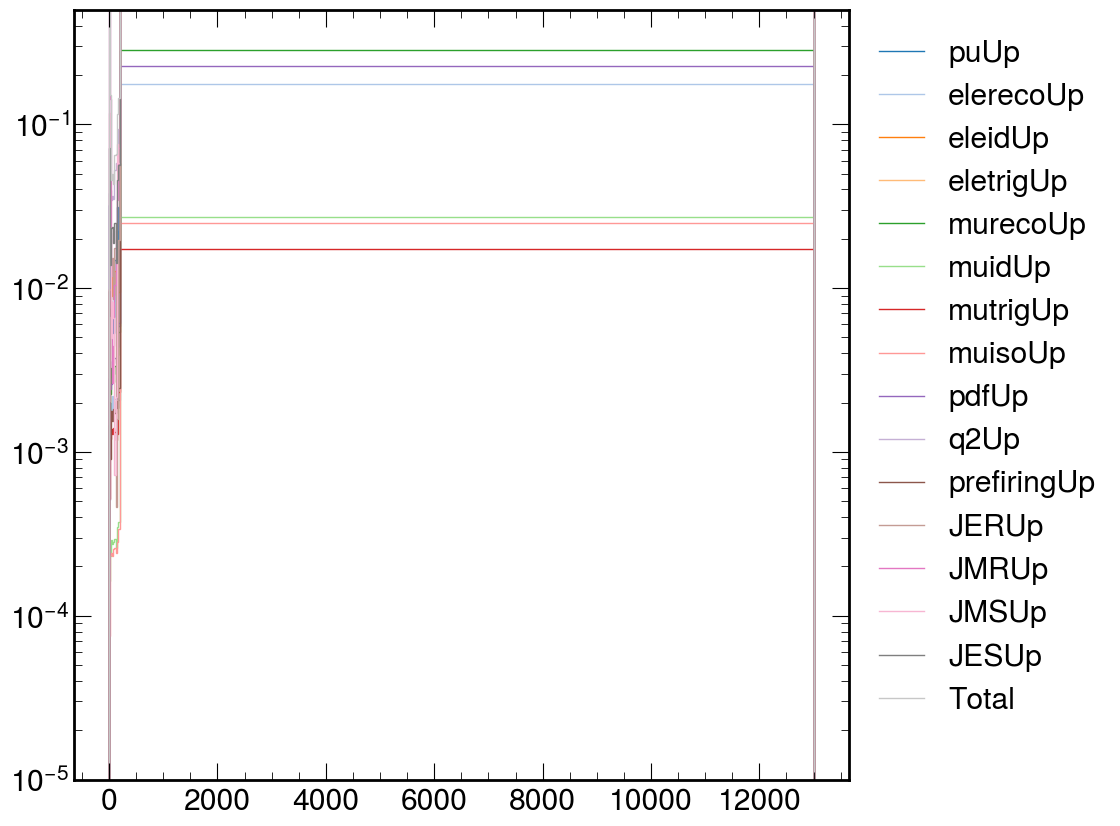

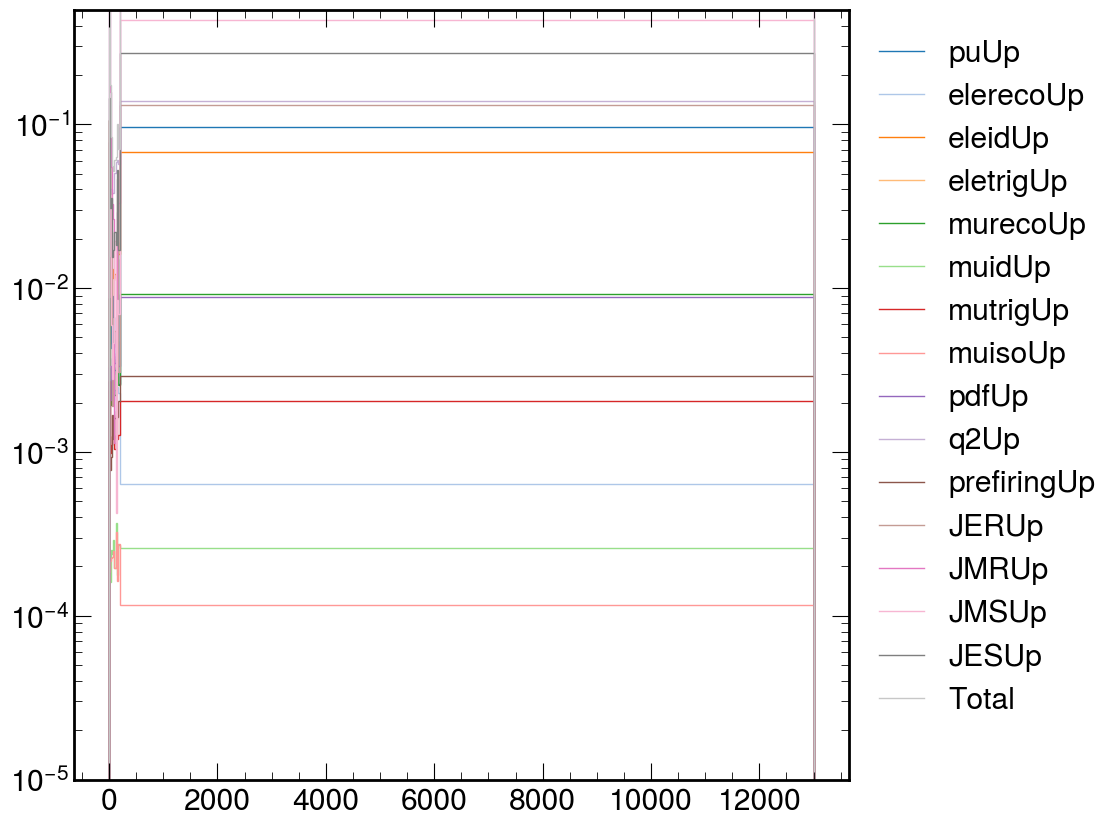

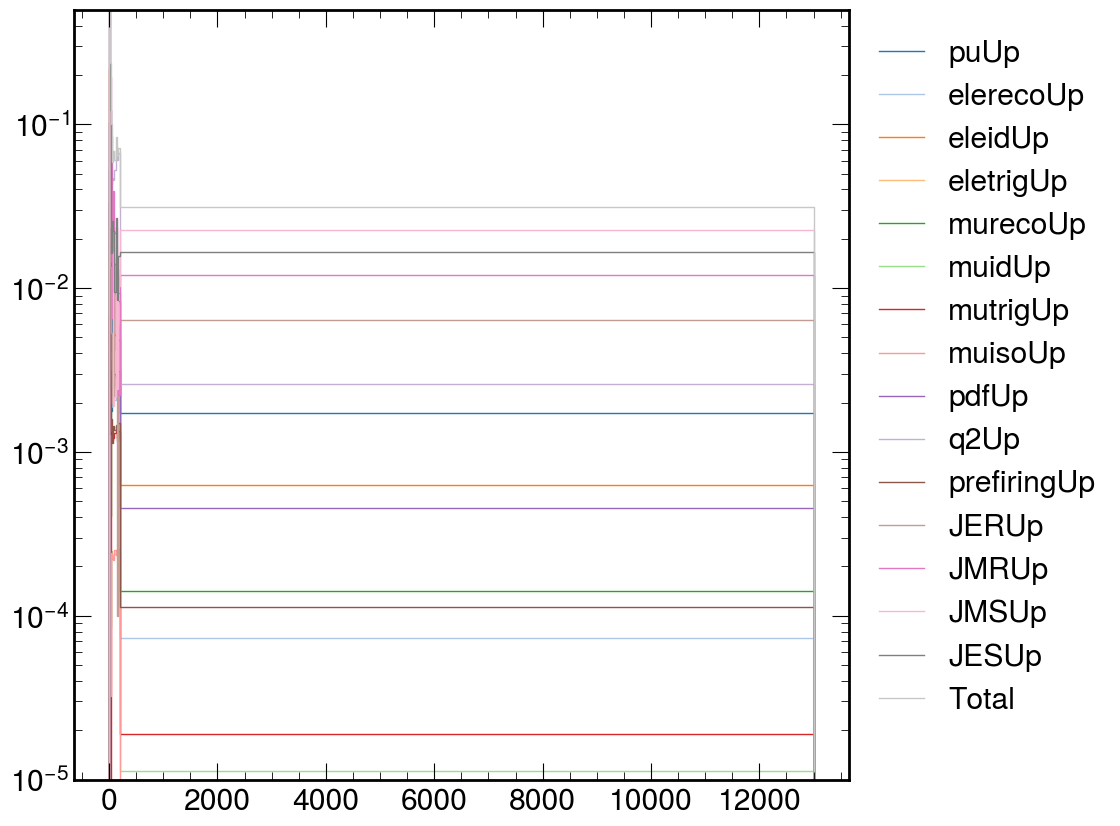

In [57]:
unfolder.plot_systematic_frac()

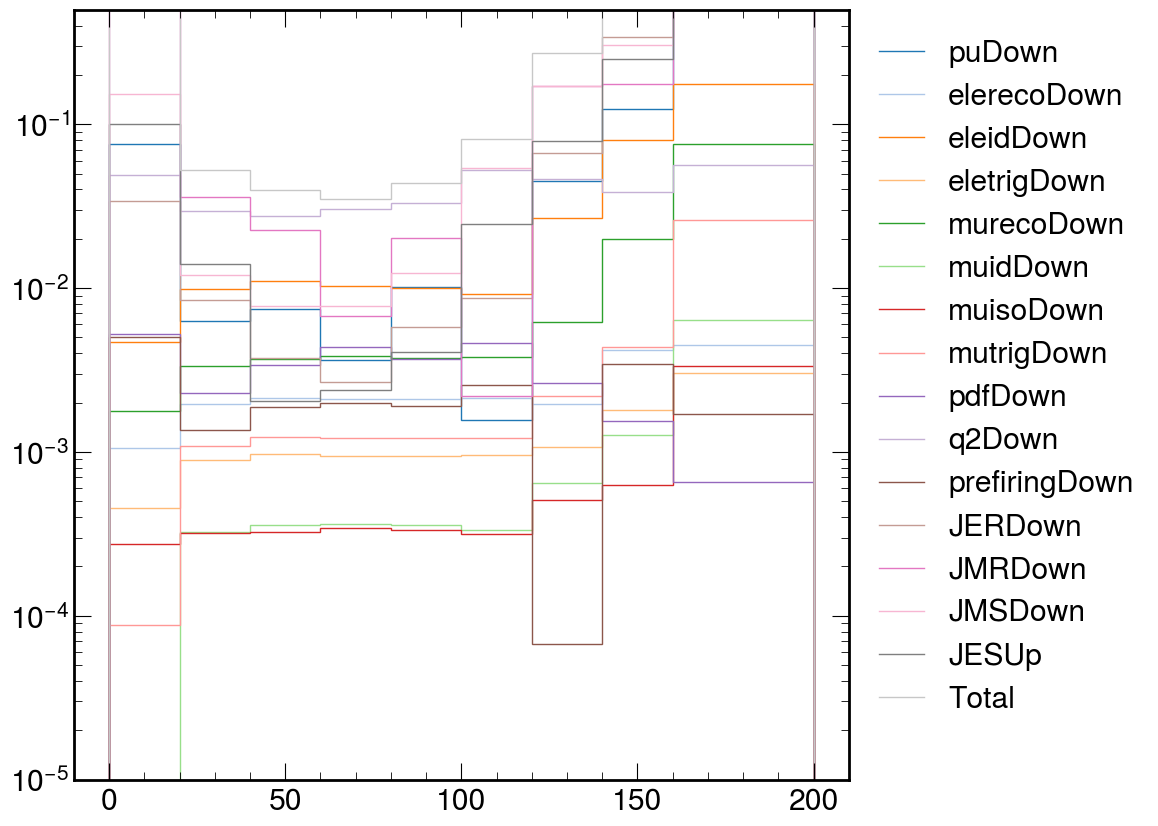

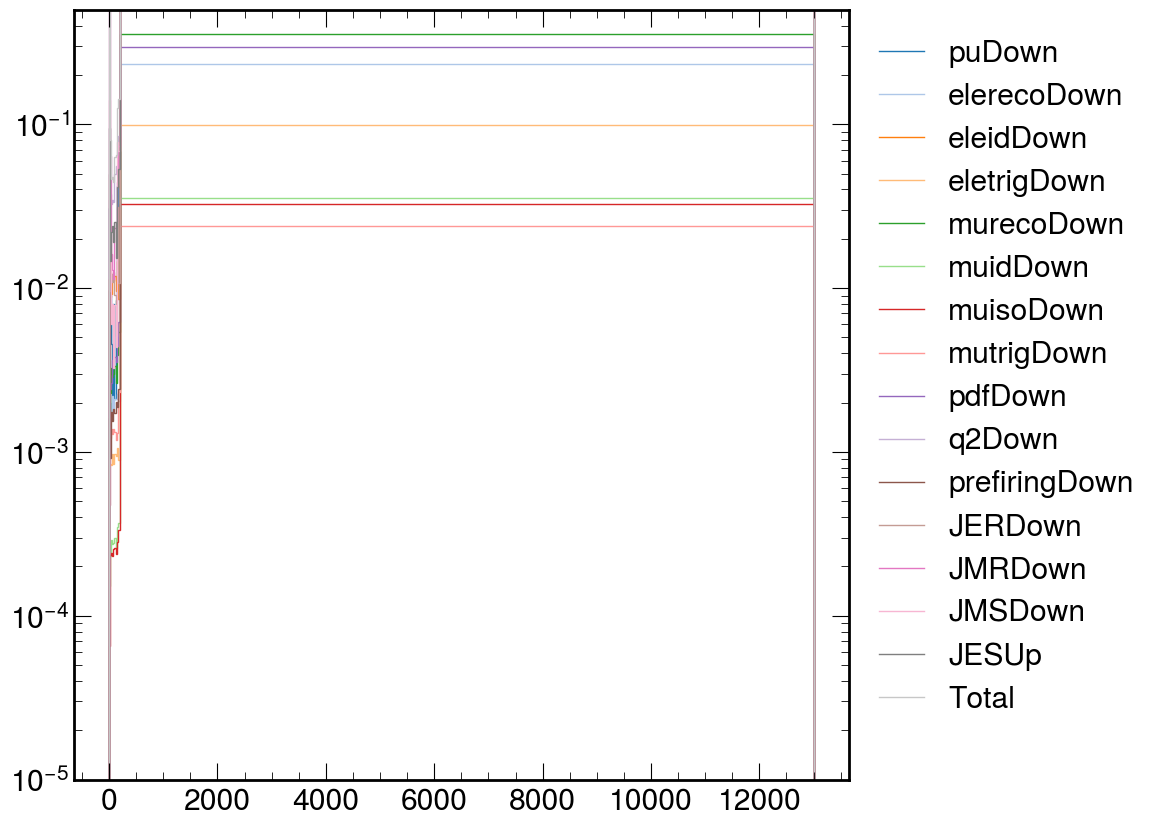

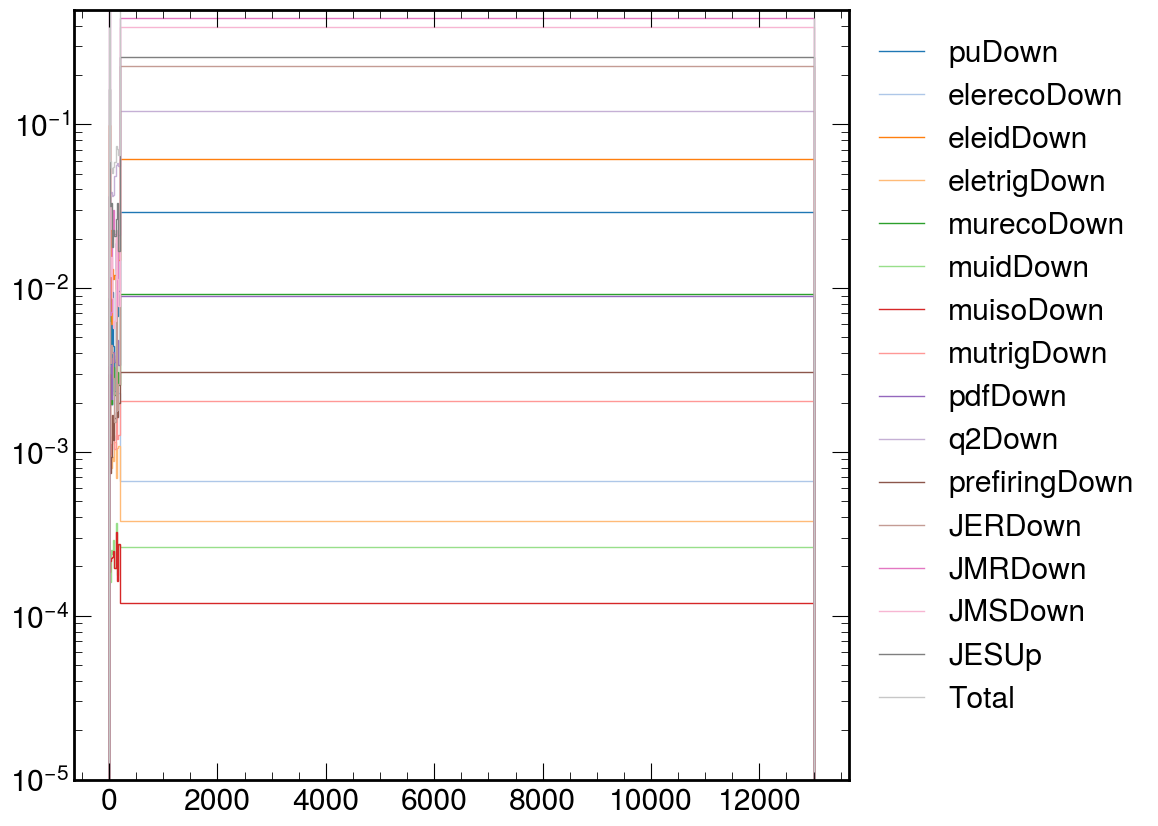

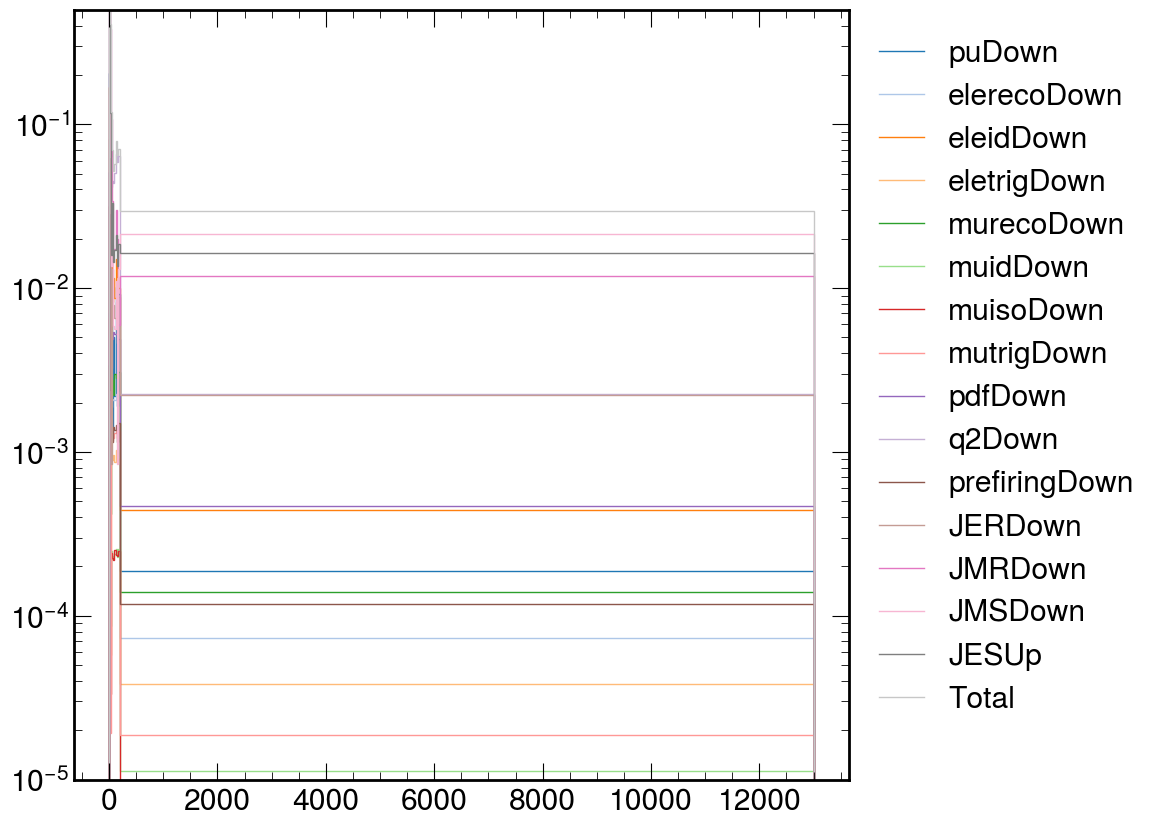

In [58]:
unfolder_dn.plot_systematic_frac()

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )


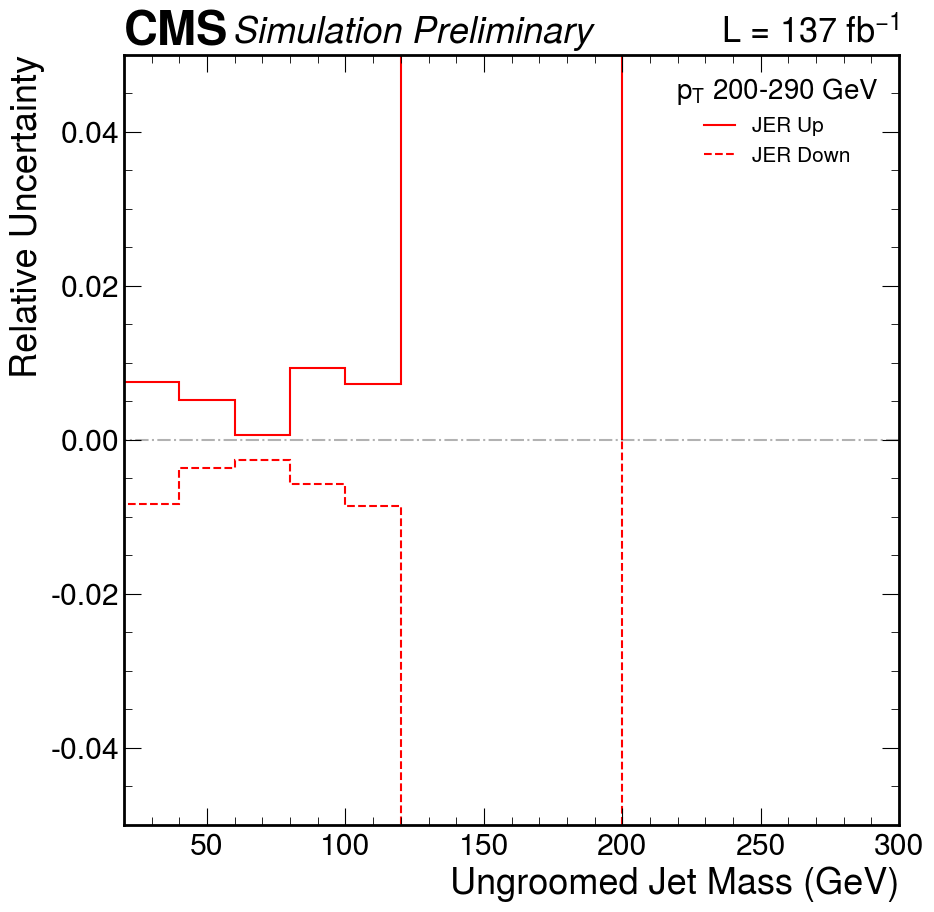

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )


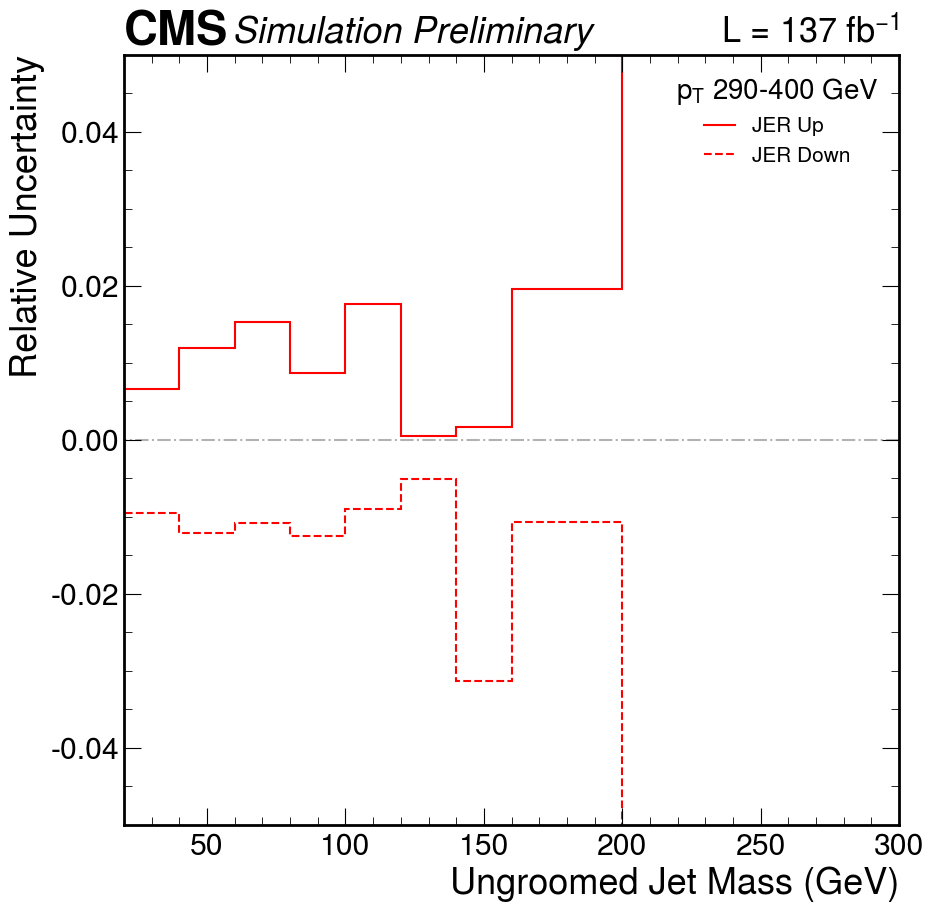

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )


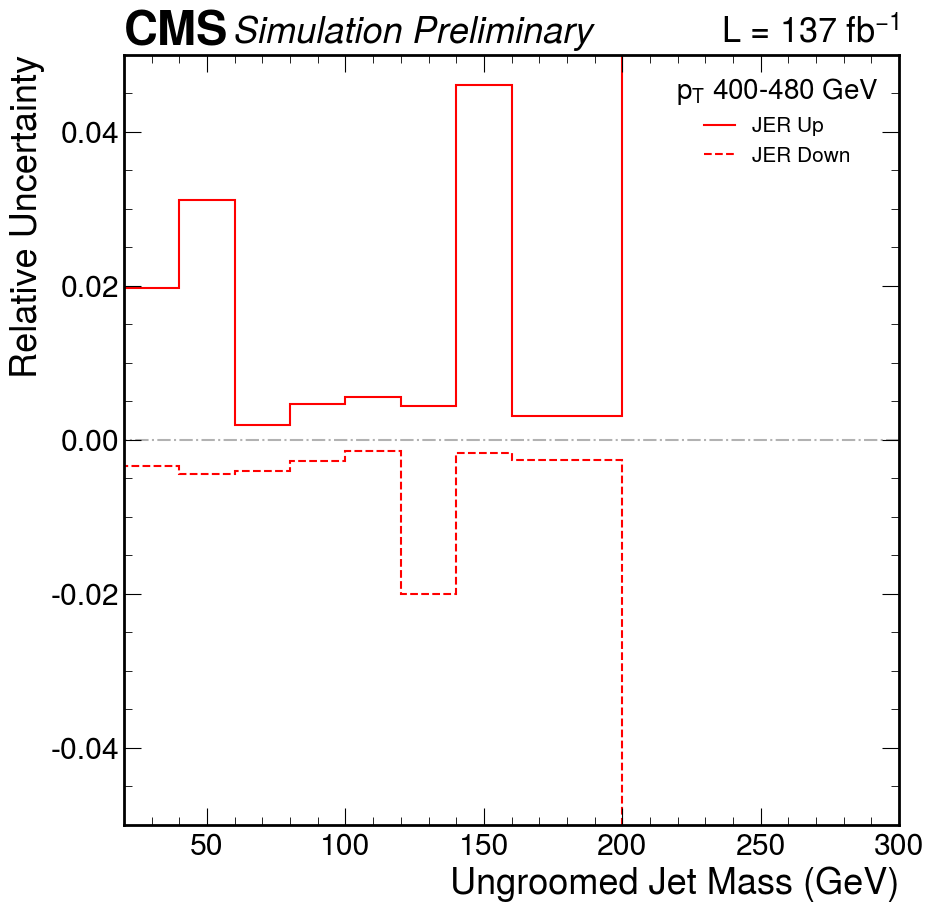

/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:743: RuntimeWarning: invalid value encountered in divide
  return_obj.append([np.abs(self.delta_sys_dic[sys][i*self.nmbinsGen  :(i+1)*self.nmbinsGen])/np.abs(self.output_pt_binned[i]), self.mgen_edge] )


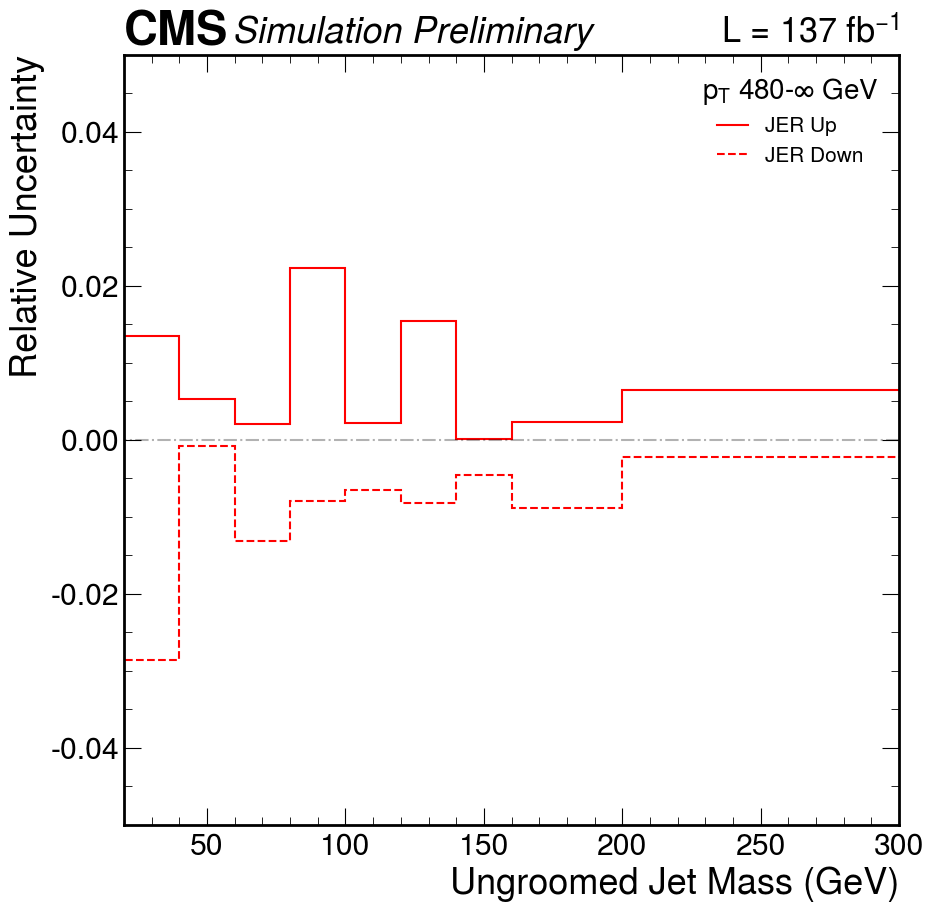

In [59]:
sys = 'JER'
sys2 = 'JMR'
#sys3 = 'eletrig'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    #hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    #hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    #hep.histplot(unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0],unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Up' , color = 'g')
    #hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '-.', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.05, 0.05)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

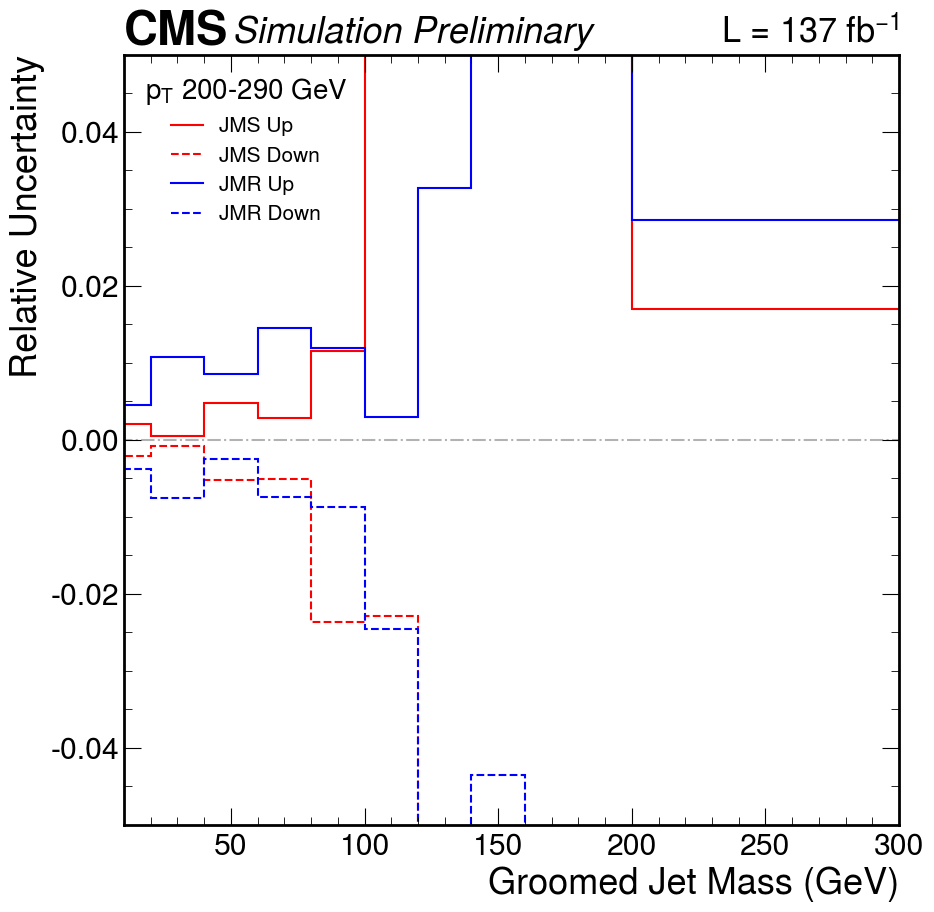

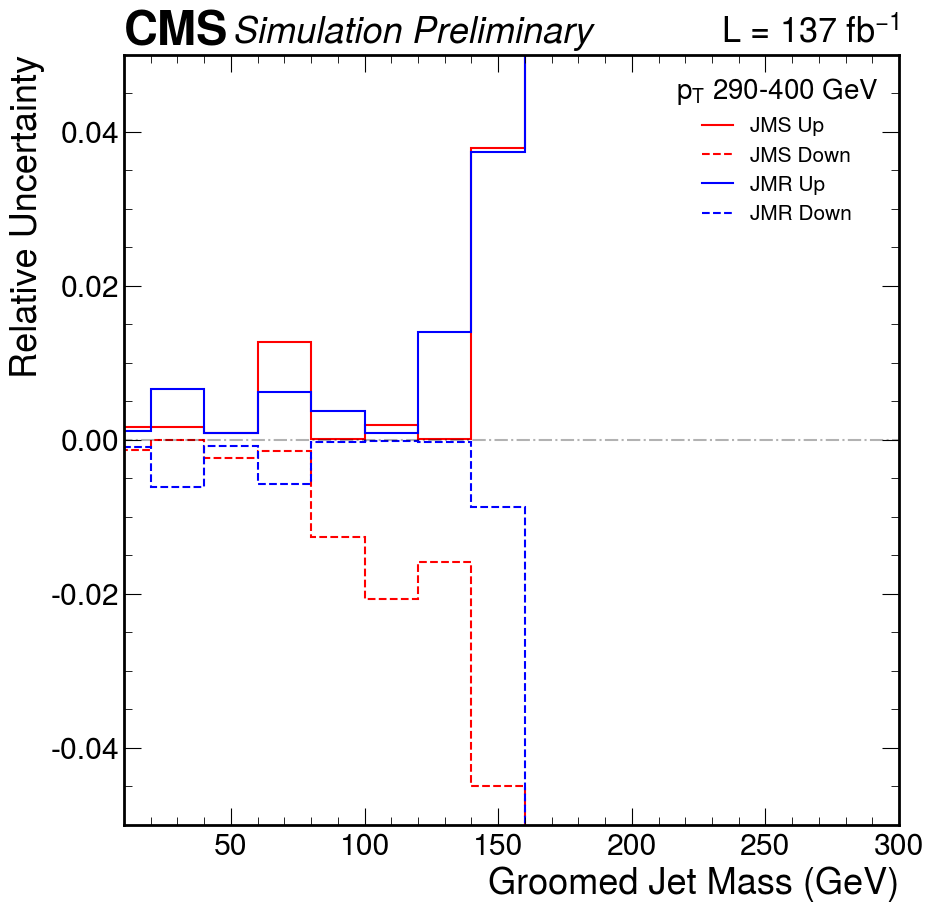

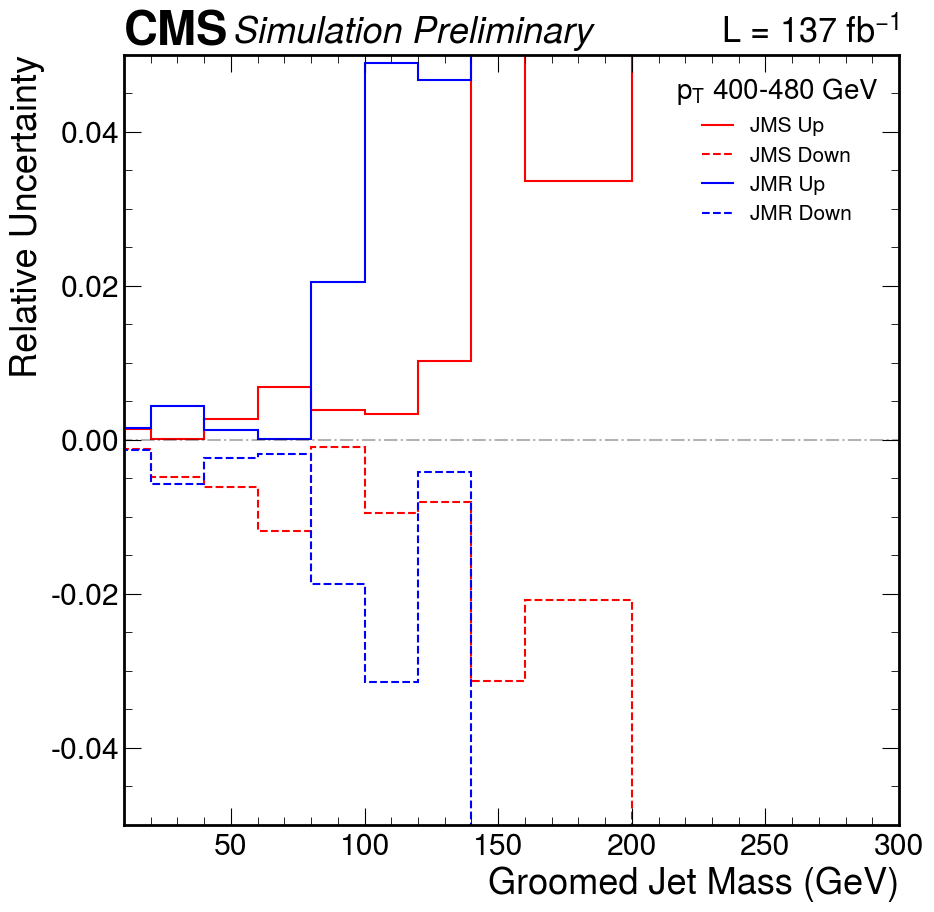

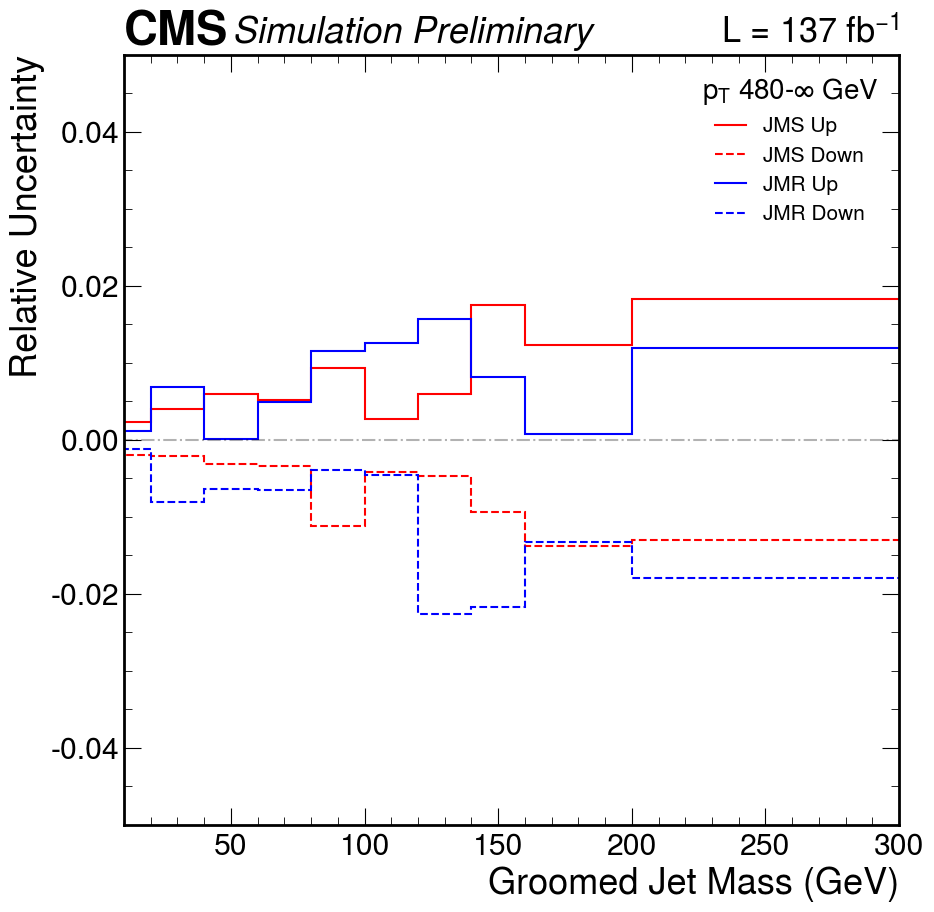

In [207]:
sys = 'JMS'
sys2 = 'JMR'
#sys3 = 'eletrig'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    #hep.histplot(unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0],unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Up' , color = 'g')
    #hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '-.', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.05, 0.05)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

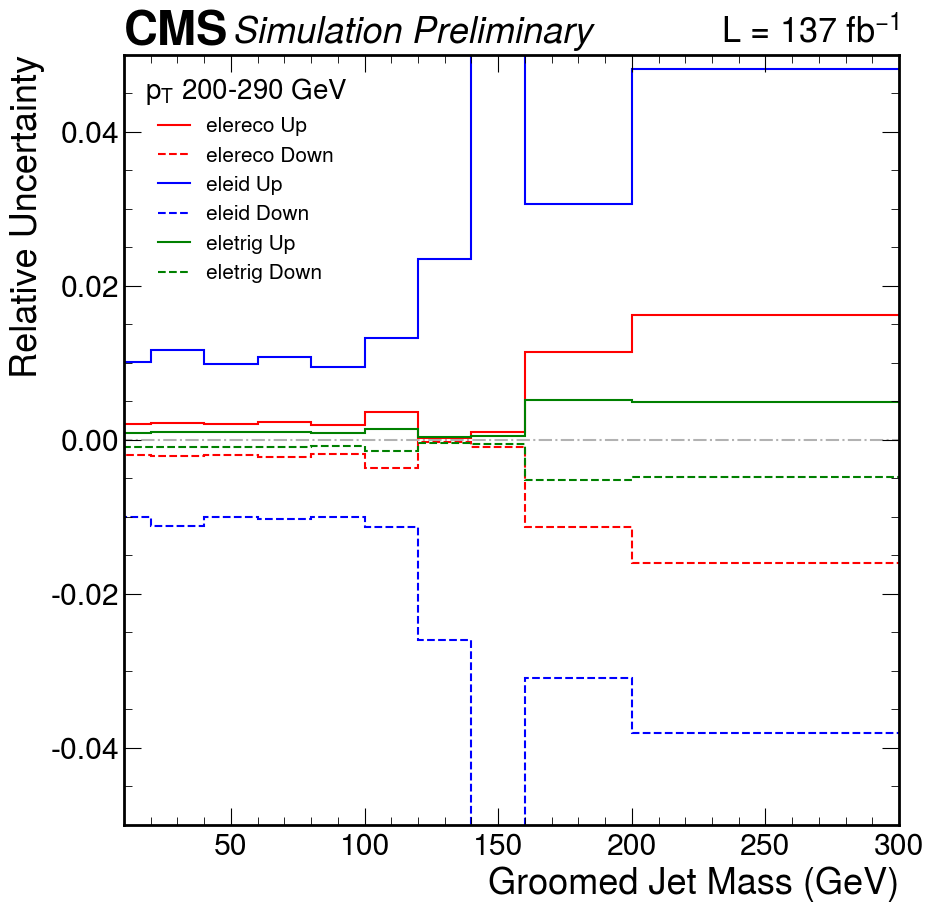

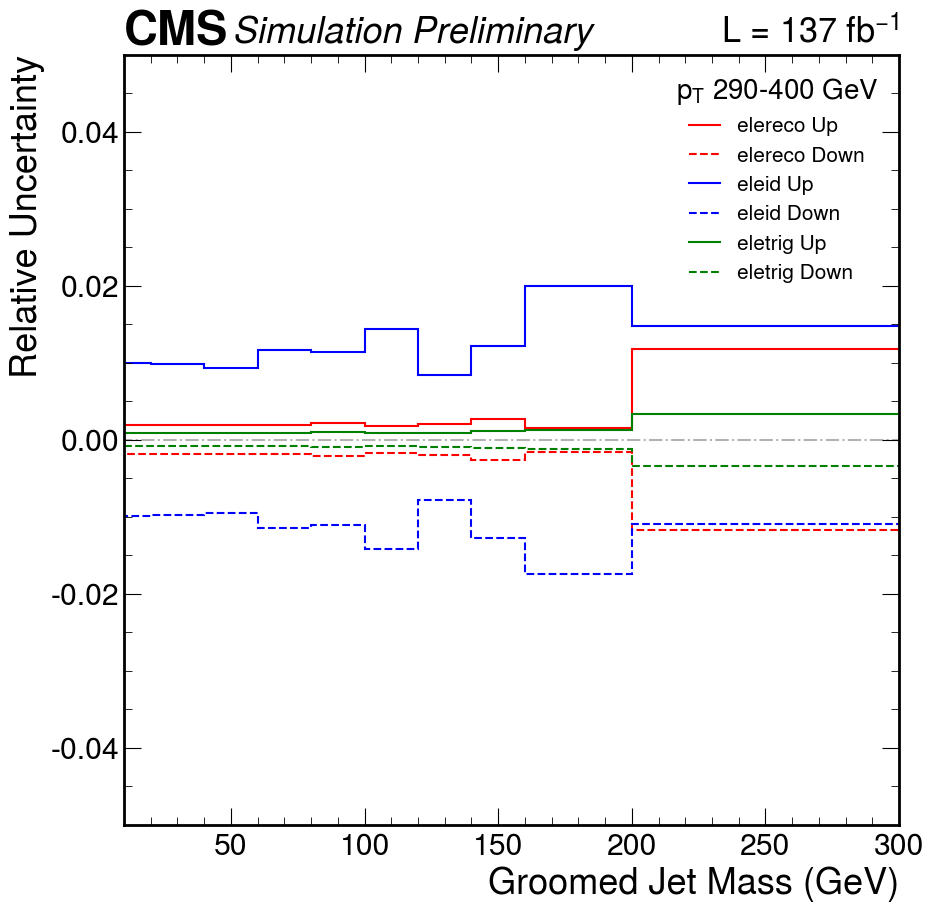

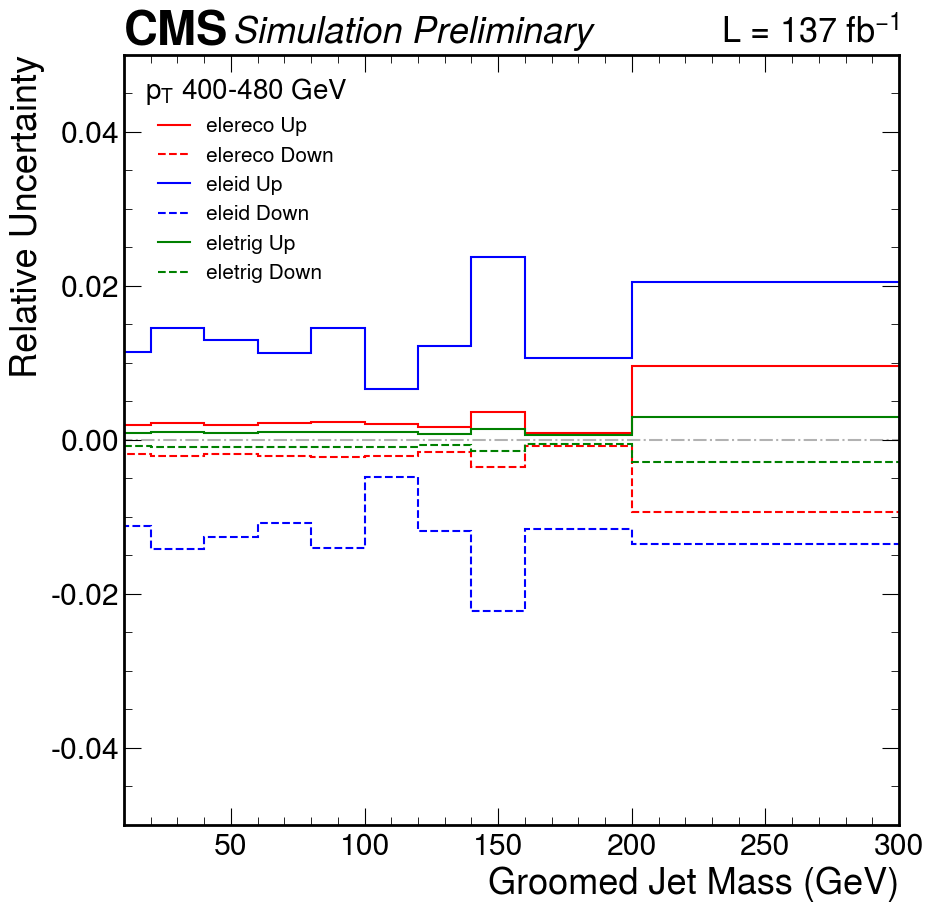

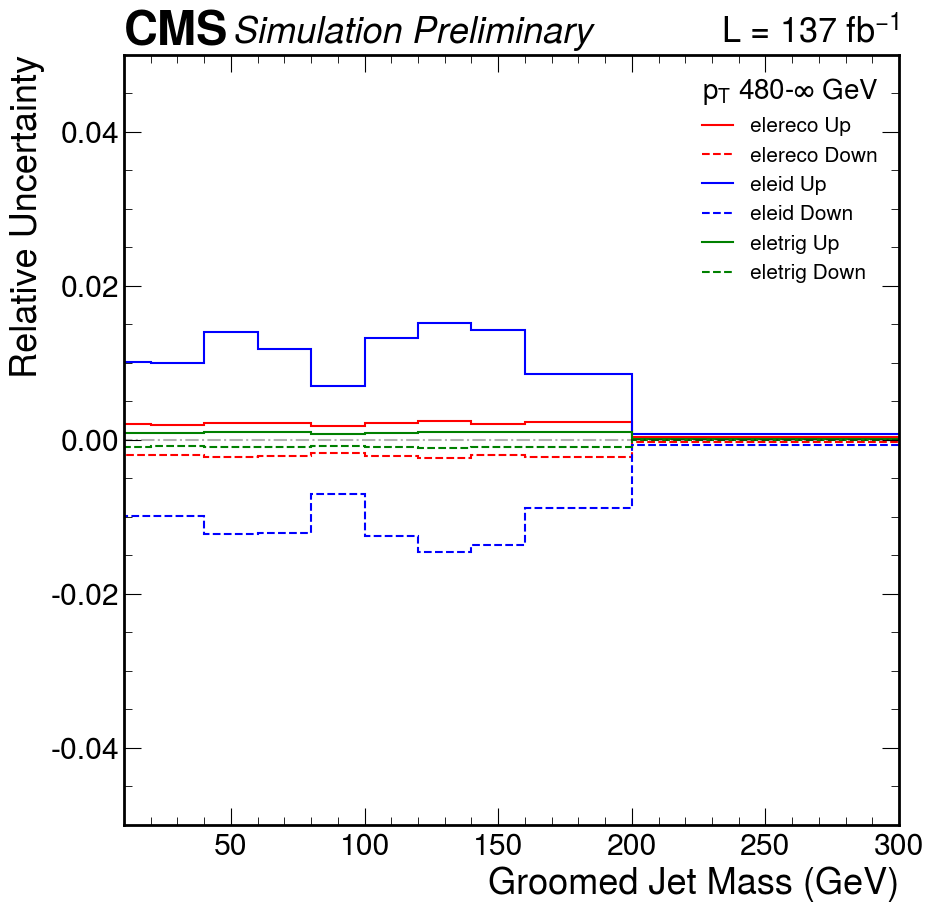

In [208]:
sys = 'elereco'
sys2 = 'eleid'
sys3 = 'eletrig'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    hep.histplot(unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0],unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Up' , color = 'g')
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '-.', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.05, 0.05)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

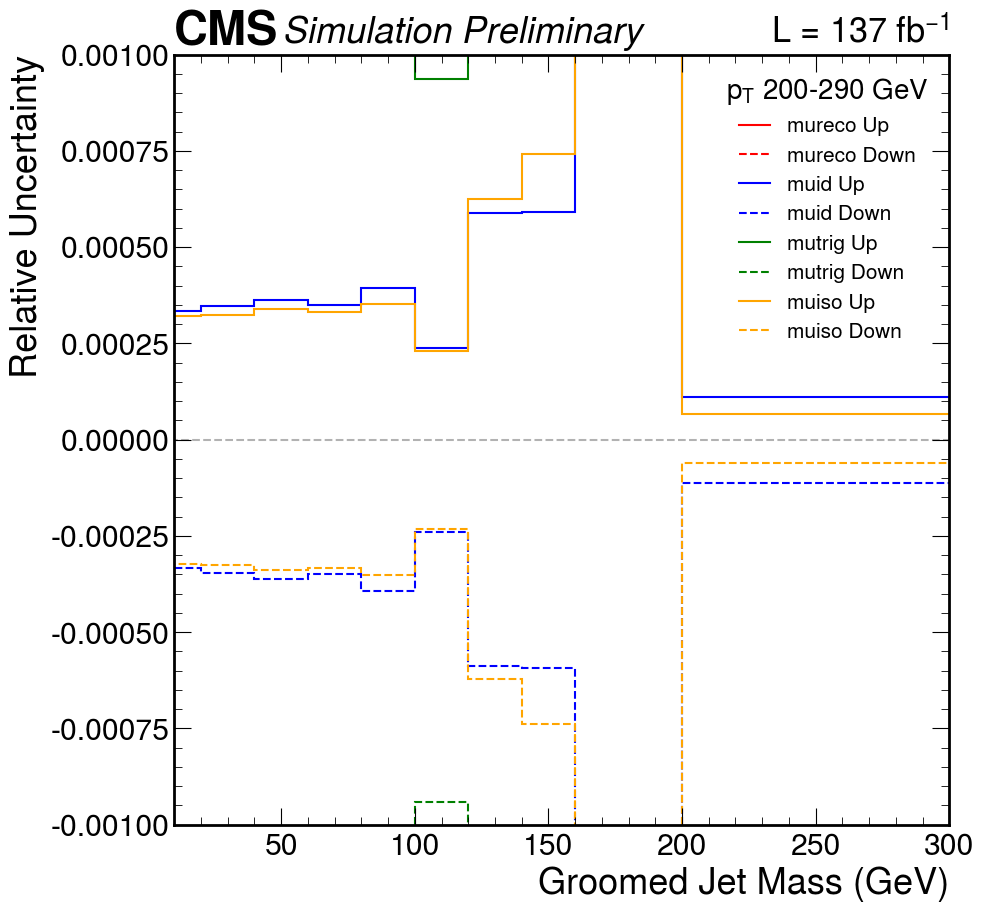

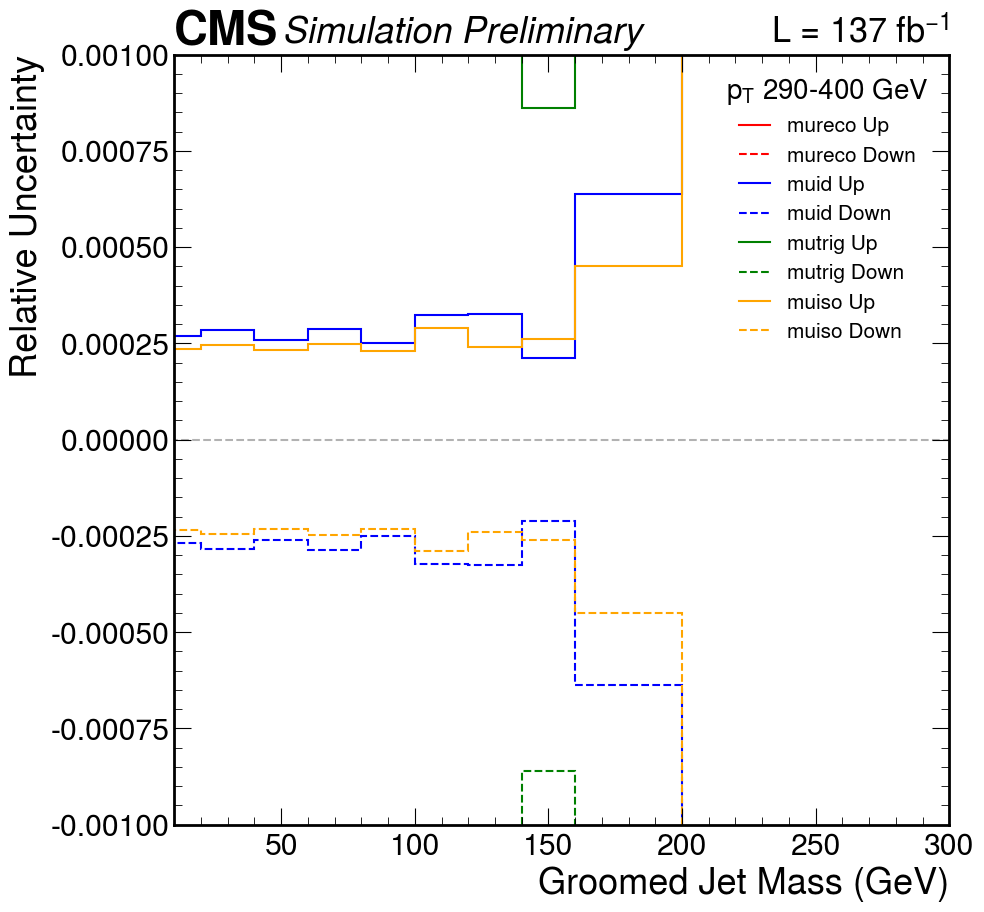

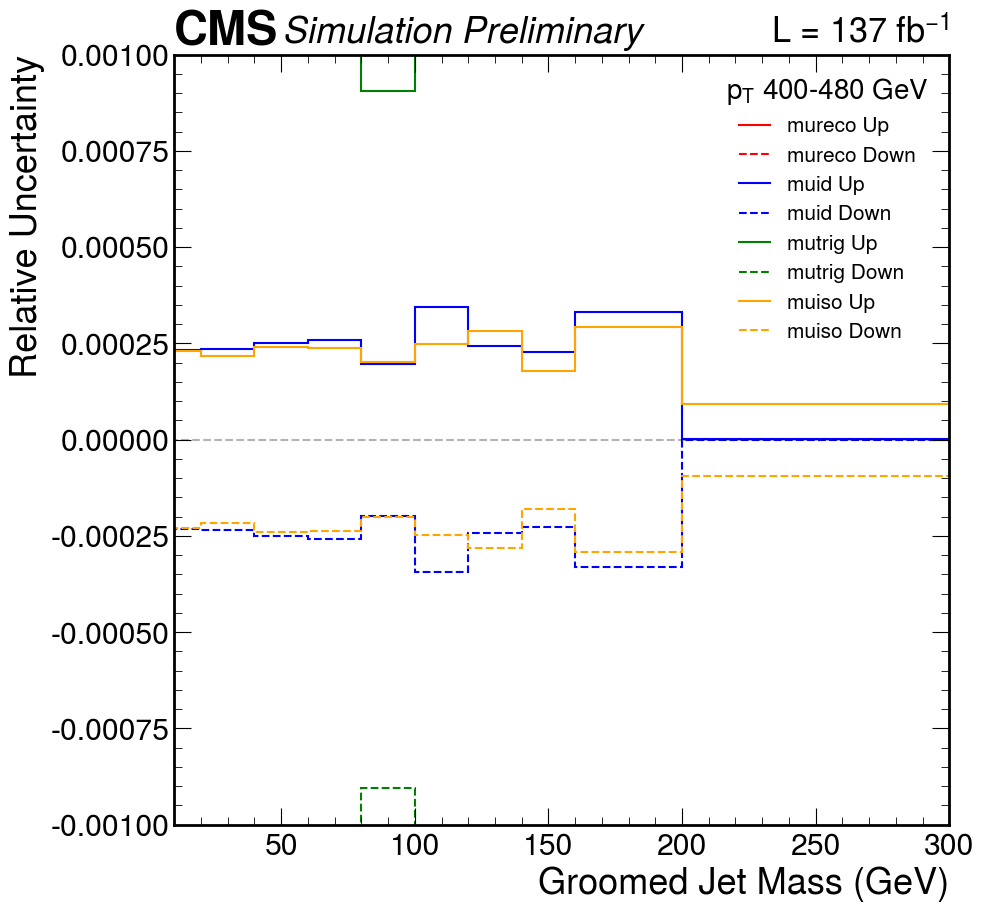

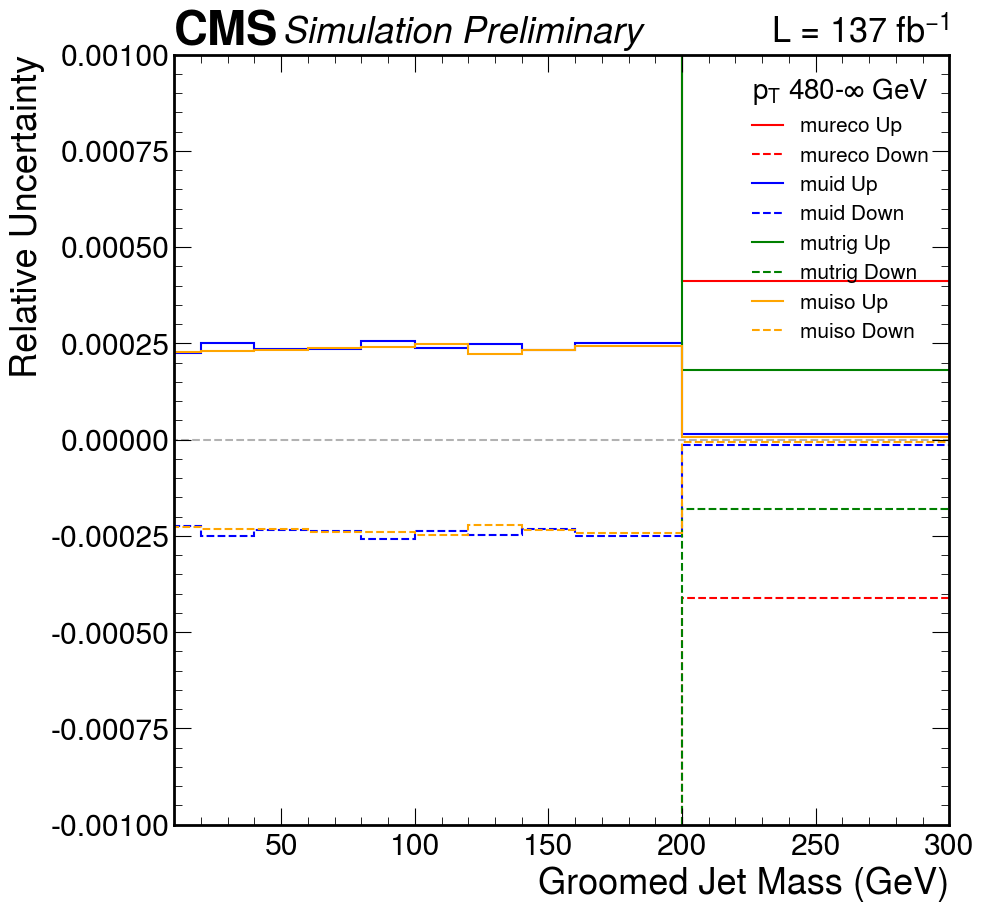

In [209]:
sys = 'mureco'
sys2 = 'muid'
sys3 = 'mutrig'
sys4 = 'muiso'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][1], label = sys3+' Up' , color = 'g')
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color = 'g')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys4+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys4+'Up'])[ipt][1], label = sys4+' Up' , color = 'orange')
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys4+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys4+'Down'])[ipt][1], label = sys4+' Down'  , ls = '--', color = 'orange')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '--', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    #plt.yscale('symlog')
    plt.ylim(-0.001, 0.001)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()

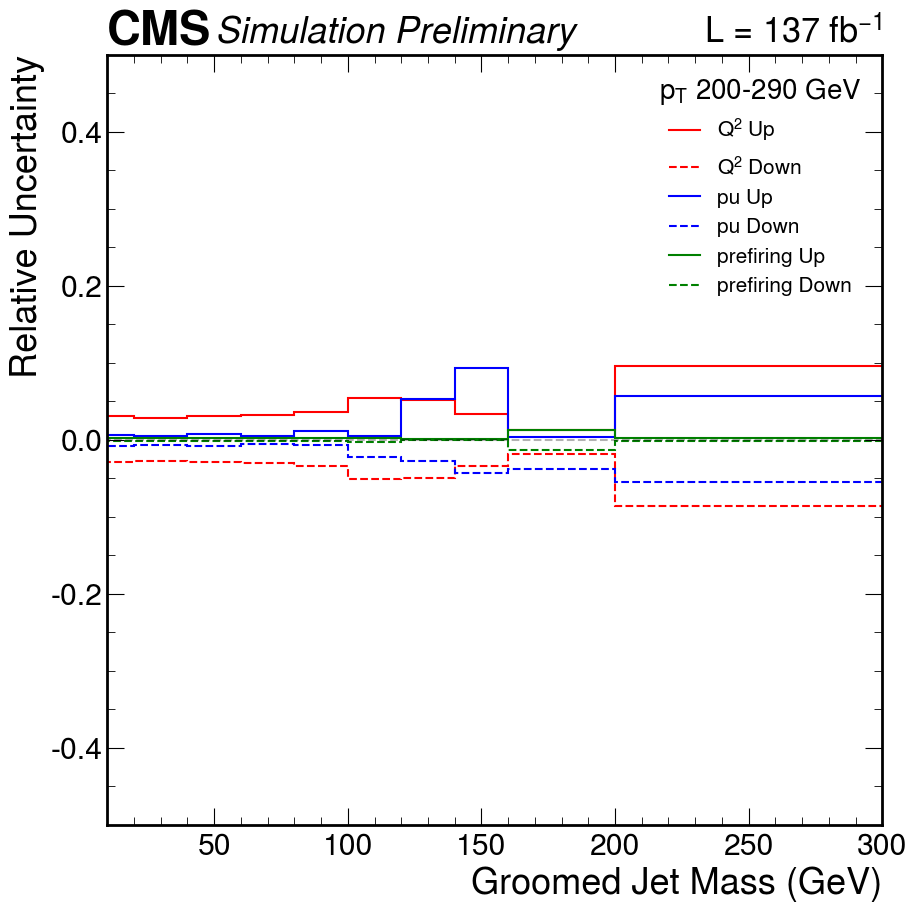

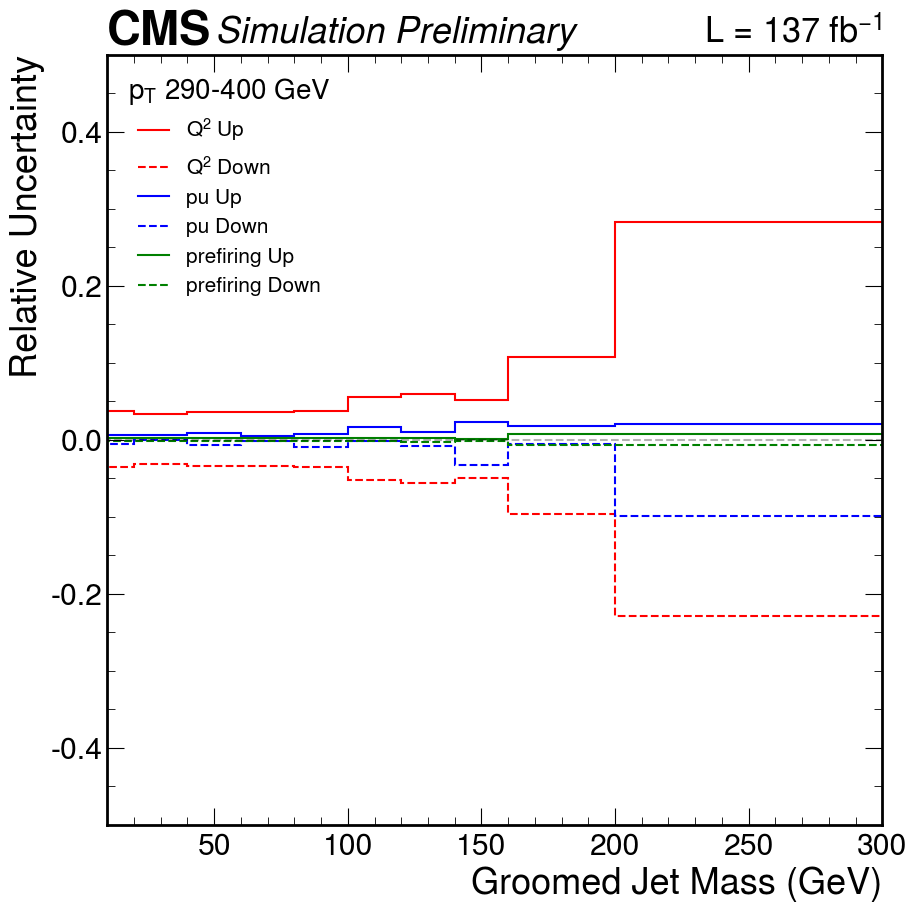

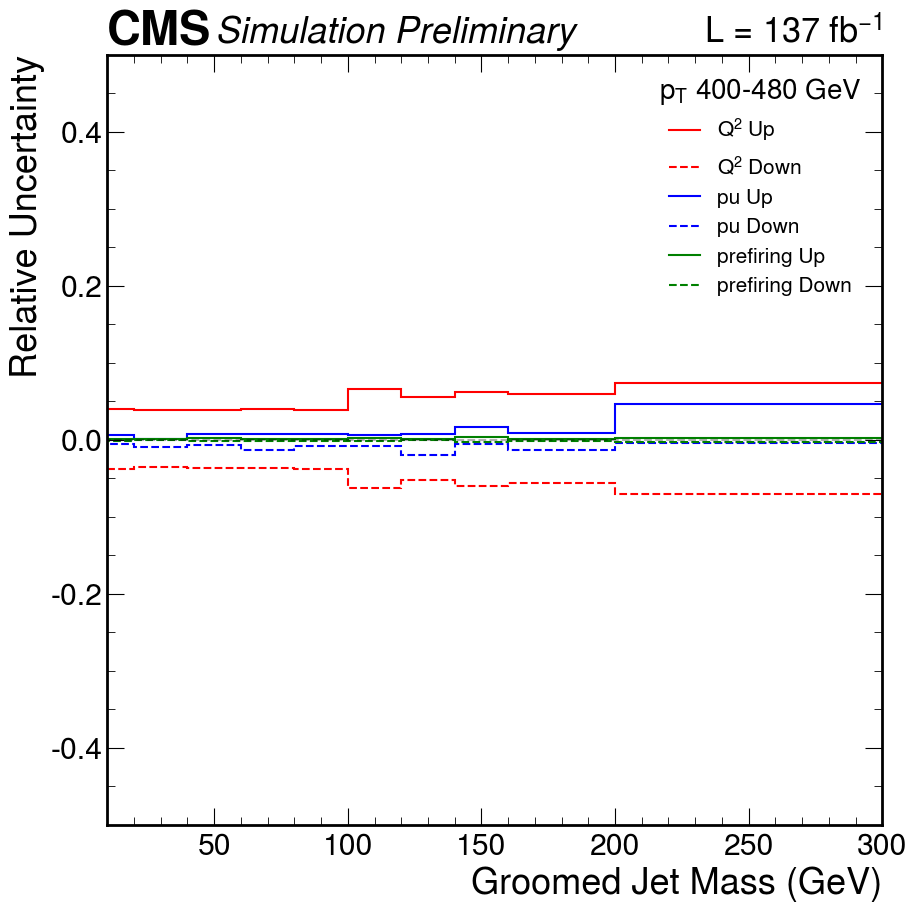

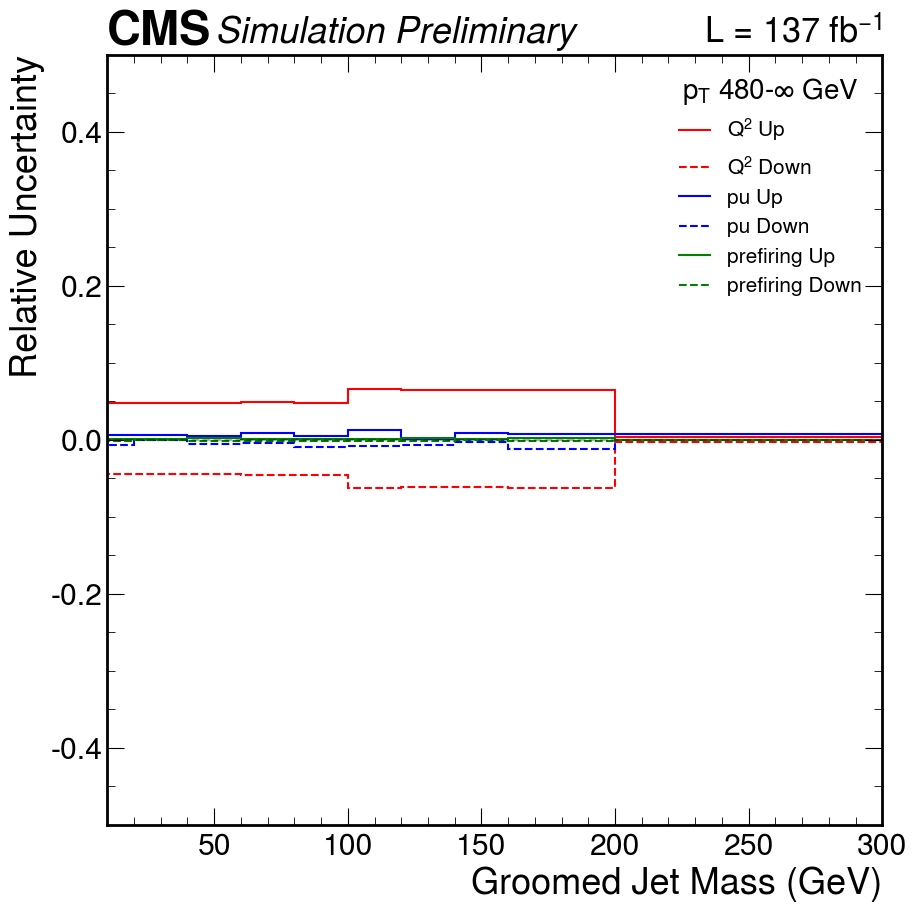

In [210]:
sys = 'q2'
sys2 = 'pu'
sys3 = 'prefiring'
for ipt in range(4):
    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys+'Up'])[ipt][1], label =r'$Q^2$' +' Up' , color = 'r' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys+'Down'])[ipt][1], label = r'$Q^2$'+' Down'  , ls = '--', color = 'r')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')

    hep.histplot(unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][0],unfolder.plot_systematic_frac(sys_list = [sys3+'Up'])[ipt][1], label = sys3+' Up' , color ='g' )
    hep.histplot(-unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][0], unfolder_dn.plot_systematic_frac(sys_list = [sys3+'Down'])[ipt][1], label = sys3+' Down'  , ls = '--', color ='g')
    
    plt.hlines(0, 0, 300, color = 'k' , ls = '--', alpha = 0.3)
    plt.legend(title = title_list[ipt], fontsize = 15, title_fontsize = 20)
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    plt.ylim(-0.5, 0.5)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/{sys}_groomed_{ipt}.pdf', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/{sys}_ungroomed_{ipt}.pdf', dpi = 300)
        
    
    plt.show()



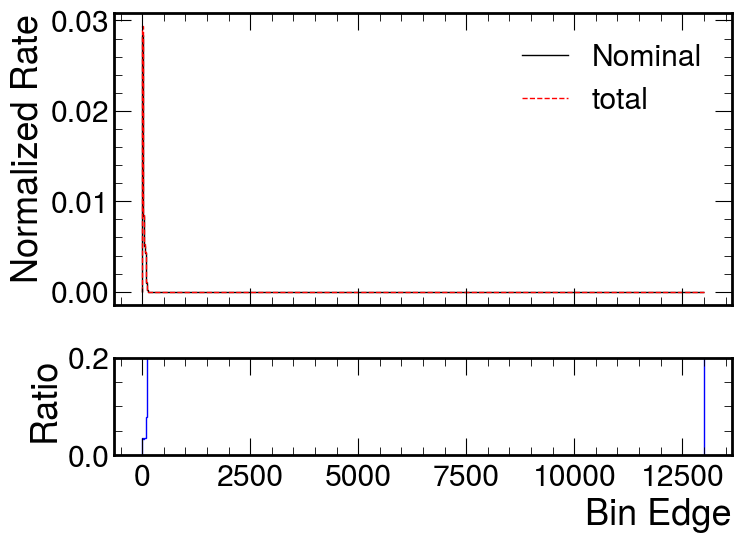

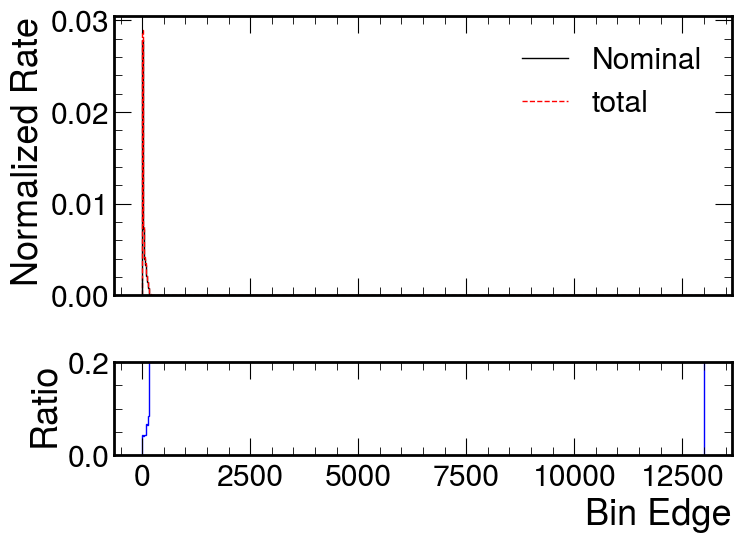

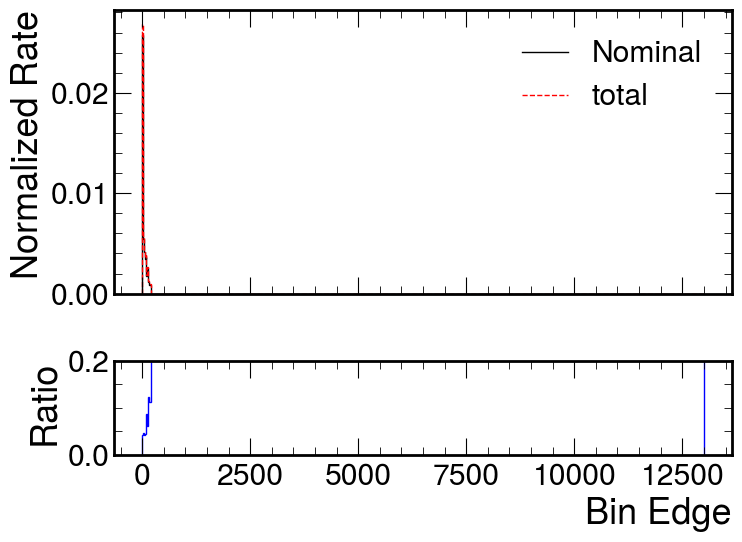

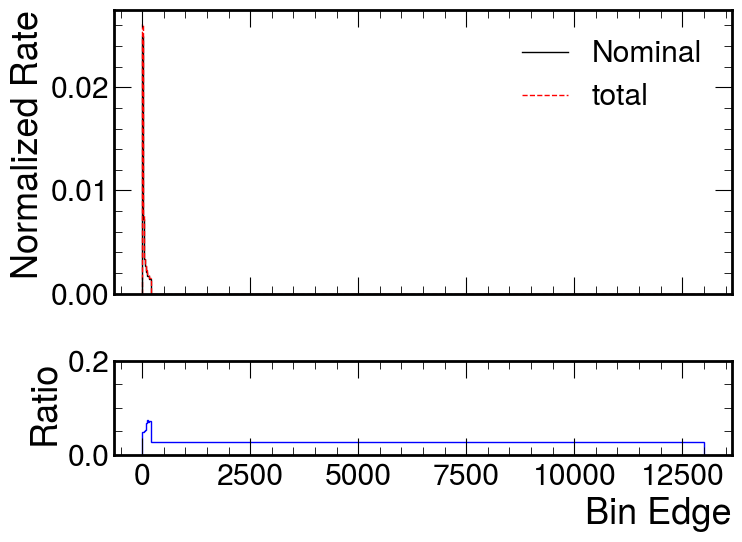

In [211]:
unfolder_dn.plot_systematic('total')

In [212]:
for ipt in range(4):
    for i in range(10):
        hep.histplot(jk_output_list[i][ipt]/mgen_width, mgen_edge)
        plt.xlim(20,200)
        if groomed:
            plt.xlabel("Groomed Jet Mass (GeV)")
        else:
            plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.ylabel("Arbitrary Normalization (1/GeV)")
    hep.cms.label()
    plt.savefig(f"plots/uncertainties/jackknife_{ipt}.png", dpi = 300)
    plt.show()
    

    

ValueError: operands could not be broadcast together with shapes (11,) (10,) 

In [ ]:
#title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-480 GeV",  r"$p_T$ 480-$\infty$ GeV"]
for i in range(4):
    plt.stairs(unfolder.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESUp" , color = 'red', lw = 2)
    plt.stairs(-unfolder_dn.total_sys_jes[i*unfolder.nmbinsGen  :(i+1)*unfolder.nmbinsGen]/np.abs(unfolder.output_pt_binned[i]), unfolder.mgen_edge , label = "JESDown", ls = '--' , color = 'blue', lw = 2)
    plt.hlines(0, 0, 300, color = 'k' , ls = '--', alpha = 0.3)
    plt.legend(title = title_list[i])
    #plt.ylim(-0.1,0.1)
    if groomed:
        plt.xlabel("Groomed Jet Mass (GeV)")
        plt.xlim(10,300)
    else:
        plt.xlabel("Ungroomed Jet Mass (GeV)")
        plt.xlim(20,300)
    plt.ylabel("Relative Uncertainty")
    plt.ylim(-0.1, 0.1)
    #plt.yscale('symlog')
    hep.cms.label('Preliminary', rlabel = r"L = 137 $fb^{-1}$")
    if groomed:
        plt.savefig(f'plots/uncertainties/jes_groomed_{i}.png', dpi = 300)
    else:
        plt.savefig(f'plots/uncertainties/jes_ungroomed_{i}.png', dpi = 300)
        
    
    plt.show()

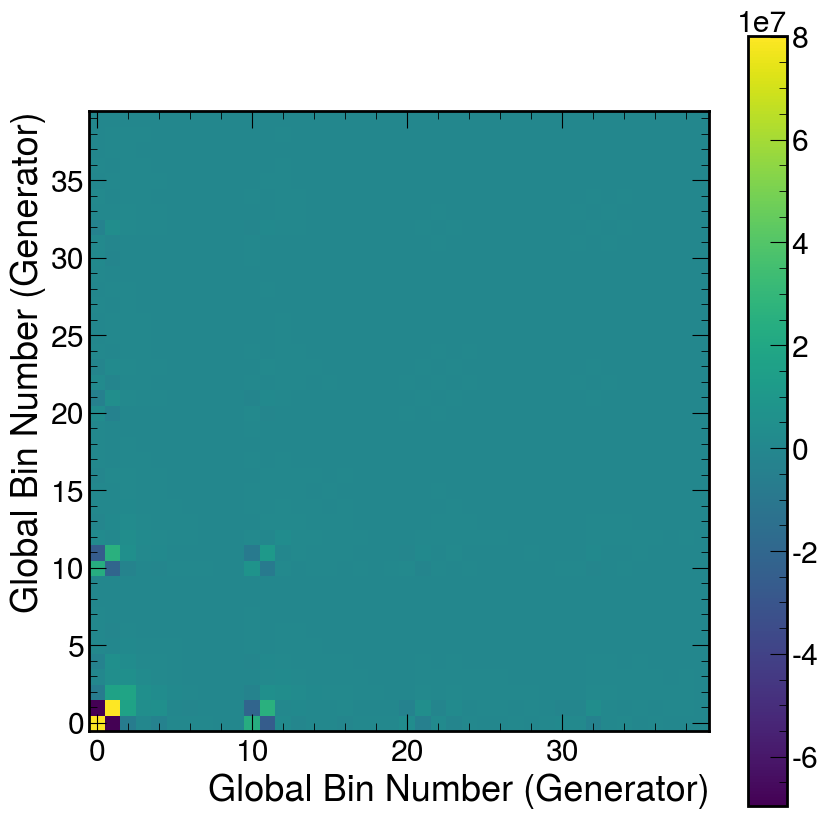

In [121]:
unfolder.plot_covariance()

In [ ]:
input_data

In [ ]:
input_data.project("ptreco", "mreco")[i,hist.rebin(1)].values().shape

In [ ]:
resp_matrix_4d.project("ptgen", "mgen").values().shape

In [ ]:
resp_matrix_4d.project("ptreco", "mreco")[:, hist.rebin(2)].values().shape

In [ ]:
mc = resp_matrix_4d.project("ptgen", "mgen").values()
mc_reco =  resp_matrix_4d.project("ptreco", "mreco")[:, hist.rebin(1)].values()
mc_errors = resp_matrix_4d.project("ptgen", "mgen").variances()**0.5

for i in range(4):

    mc[i] = mc[i]/mc[i][:-1].sum()
    data_postunfold = unfolder.get_results()[0][i]/unfolder.get_results()[0][i][:-1].sum()
    data_preunfold = input_data.project("ptreco", "mreco")[i,hist.rebin(1)].values()/input_data.project("ptreco", "mreco")[i,hist.rebin(1)].values()[:-1].sum()
    
    plt.plot(data_preunfold/mc_reco[i], marker = 'x')
    plt.plot(data_postunfold/mc[i], marker = 'o')
    plt.ylim(0.5,1.5)
    plt.show()


    

In [ ]:
np.sqrt(input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values())

In [ ]:
input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values()

In [ ]:
input_data.project("ptreco", "mreco")[i, hist.rebin(2)].values()

In [ ]:
data_preunfold

In [ ]:
stat_unc[0]

In [ ]:
unfolder.stat_pt_binned[0]

In [96]:
for i in range(4):
    # Normalize the distributions
    fig = plt.figure(figsize = (10,4))
    mc[i] = mc[i] / mc[i].sum()
    mc_reco[i] = mc_reco[i]/mc_reco[i].sum()
    data_postunfold = unfolder.get_results()[0][i] / unfolder.get_results()[0][i].sum()
    data_preunfold = input_data.project("ptreco", "mreco")[i, hist.rebin(1)].values() / input_data.project("ptreco", "mreco")[i, hist.rebin(1)].values().sum()

    # Calc`ulate uncertainties (example: Poisson sqrt)
    mc_unc = np.sqrt(mc[i]) / mc[i].sum()
    #post_unc = np.sqrt( unfolder.get_results()[0][i]) / unfolder.get_results()[0][i].sum()/mc[i]
    post_unc = stat_unc[i] / unfolder.get_results()[0][i].sum()/mc[i]
    pre_unc = np.sqrt( input_data.project("ptreco", "mreco")[i, hist.rebin(1)].values()) /  input_data.project("ptreco", "mreco")[i, hist.rebin(1)].values().sum()/mc_reco[i]

    # Plot using stairs with uncertainty bars
    plt.stairs(data_preunfold/mc_reco[i], edges=mreco_edge, label='Pre-unfold / MC', color='blue', ls = '--')
    plt.errorbar((mreco_edge[:-1] + mreco_edge[1:]) / 2, data_preunfold/mc_reco[i], yerr=pre_unc,  fmt='x', color='blue')

    plt.stairs(data_postunfold/mc[i], edges=mgen_edge_mod, label='Post-unfold / MC', color='green')
    plt.errorbar((mgen_edge_mod[:-1] + mgen_edge_mod[1:]) / 2, data_postunfold/mc[i], yerr=post_unc, fmt='o', color='green')
    plt.hlines([1], 0, 240 , color = 'k')
    plt.ylim(0.5, 1.5)
    plt.xlim(0,240)
    if groomed:
        plt.xlabel('Groomed Jet Mass (GeV)')
        plt.savefig(f"plots/unfold/bottom_line_groomed_{i}.pdf")
    else:
        plt.xlabel('Ungroomed Jet Mass (GeV)')
        plt.savefig(f"plots/unfold/bottom_line_ungroomed_{i}.pdf")
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()


NameError: name 'mc' is not defined

<Figure size 1000x400 with 0 Axes>

In [60]:
herwig_input = resp_matrix_4d_herwig.project('ptreco', 'mreco')

In [61]:
jk_output_list = []
for i in range(10):
    if not groomed:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_u'][{'jk':i}]
        resp_matrix_4d_jk= rebin_hist(resp_matrix_4d_jk, 'mreco',edges )
        resp_matrix_4d_jk= rebin_hist(resp_matrix_4d_jk, 'mgen',edges_gen )
        input_data = output_data['ptjet_mjet_u_reco']
        input_data = rebin_hist(input_data, 'mreco',edges)
        fakes_jk = fakes
        misses_jk = (9/10)*misses
        

    else:
        resp_matrix_4d_jk = output_jk['jk_response_matrix_g'][{'jk':i}]
        resp_matrix_4d_jk= rebin_hist(resp_matrix_4d_jk, 'mreco',edges )
        resp_matrix_4d_jk= rebin_hist(resp_matrix_4d_jk, 'mgen',edges_gen )
        input_data = output_data['ptjet_mjet_g_reco']
        input_data = rebin_hist(input_data, 'mreco',edges)
        fakes_jk = fakes
        misses_jk = (9/10)*misses

    unfolder_jk = Unfolder(input_data, resp_matrix_4d_jk[{'systematic':'nominal'}] , fakes_jk, misses_jk,
                            backgrounds = {"ww": ww_bg, "wz":wz_bg, "zz": zz_bg},
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            #systematics = sys_matrix_dic_down,
                            systematics= None,
                            closure = closure,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = True,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )

    unfolder_jk.perform_unfold()
    jk_output_list.append(unfolder_jk.get_results()[0])
        
    # resp_matrix_4d_jk = resp_matrix_4d_jk[:,:,:hist.loc(131), : ,:hist.loc(121),:] 
    # resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:] = resp_matrix_4d_jk[:,:,hist.loc(121), : ,:,:].view() + resp_matrix_4d_jk[:,:,hist.loc(131), : ,:,:].view()
    # resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:] = resp_matrix_4d_jk[:,:,:, : ,hist.loc(111),:].view() + resp_matrix_4d_jk[:,:, :, : ,hist.loc(121),:].view()



10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (80,)
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 6.662630879292915e-06


/home/aritra/workspace/unfold/unfold_utils/unfolder.py:124: RuntimeWarning: invalid value encountered in divide
  self.underflow_frac = np.nan_to_num(h_np_underflow / self.M_np.sum(axis=0))
/home/aritra/workspace/unfold/unfold_utils/unfolder.py:175: RuntimeWarning: invalid value encountered in divide
  self.miss_frac = self.miss_values/ ( self.M_np.sum(axis = 1))


Output Underflow 0.0, output overflow 0.0
149194.13927239957
230958.61118987628
10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (80,)
Working until background subtractions
Unfolder object created
Regularisation USED ScanSURE
Tau value 6.461605439233404e-06
Output Underflow 0.0, output overflow 0.0
149204.936223828
231026.63274039404
10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (80,)
Working until background subtractions
Unfolder object created
Regular

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 10 41
Info in <TUnfold::TUnfold>: 80 input bins and 39 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (signal:ptgen[200,290]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #41
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 7/80 input bins hav

In [62]:
jk_output_list = np.array(jk_output_list)

stat_unc = np.sqrt(10/9)*np.std(jk_output_list, axis = 0)

stat_unc.shape

(4, 10)

In [63]:
if groomed:
    np.savetxt('stat_mat_groomed.txt', stat_unc)
else:
    np.savetxt( 'stat_mat_ungroomed.txt', stat_unc,)

In [64]:
resp_matrix_4d_herwig[{'systematic':'herwig'}].values().shape

(3, 4, 20, 4, 10)

In [65]:
input_data.values().shape

(8, 4, 20, 1)

In [66]:
unfolder_herwig = Unfolder(input_data, resp_matrix_4d_herwig[{'systematic':'herwig'}] , fakes = None, misses = None,
                            backgrounds = None,
                            #systematics = {'JES_AbsoluteMPFBiasUp': resp_matrix_4d[{'systematic':'JES_AbsoluteMPFBiasUp'}].project('ptgen', 'mgen', 'ptreco', 'mreco').values()  },
                            #systematics = sys_matrix_dic,
                            systematics= None,
                            closure = False,
                            groomed = groomed,
                            is_uf = True,
                            merge = False,
                            normalised_xs = True,
                            do_syst = False,
                            discard_low_bins = False,
                            regularisation= 'ScanSURE',
                            do_norm = False
                                   )

10
[    0.    20.    40.    60.    80.   100.   120.   140.   160.   200.
 13000.]
20
[0.0e+00 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.8e+02
 2.0e+02 5.0e+02 1.3e+04]
Signal Binning created
Detector Binning created
shape of you (80,)


In [67]:
unfolder_herwig.perform_unfold()

Unfolder object created
Regularisation USED ScanSURE
Tau value 2.3835641101927274e-05
Output Underflow 0.0, output overflow 0.0
269641.1371081045
269641.1371081043


Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 4 output bins do not depend on the input data  0 9-10 41
Info in <TUnfold::TUnfold>: 80 input bins and 38 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (signal:ptgen[200,290]:massgen[160,200])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (signal:ptgen[200,290]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #41
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing signal r

AttributeError: 'Unfolder' object has no attribute 'miss_values'

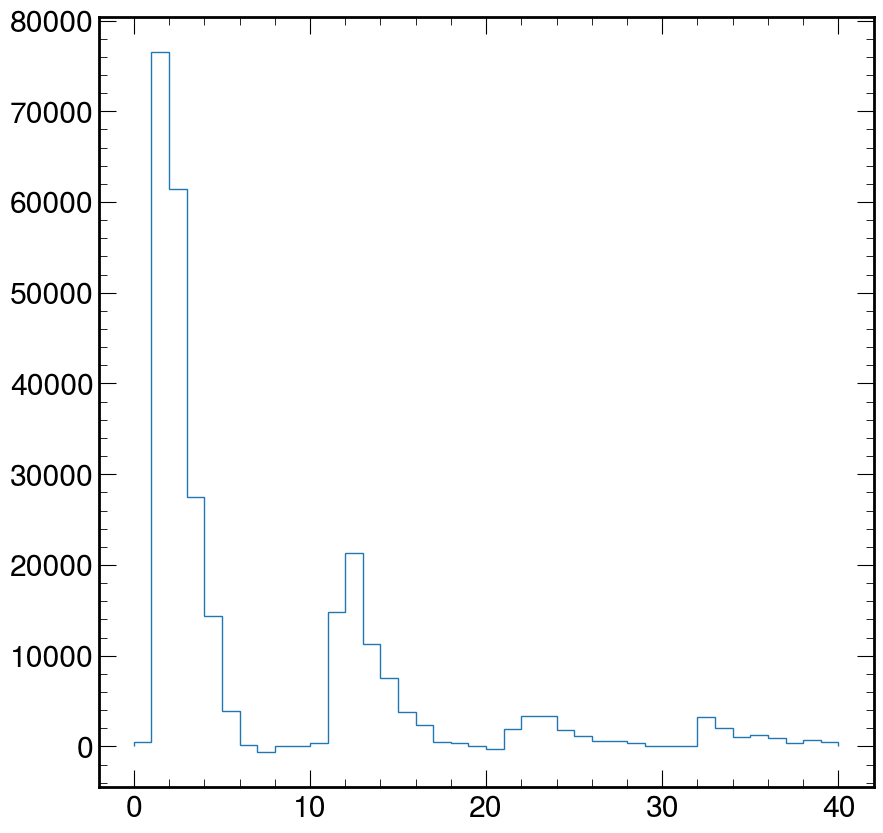

In [68]:
unfolder_herwig.plot_unfolded()

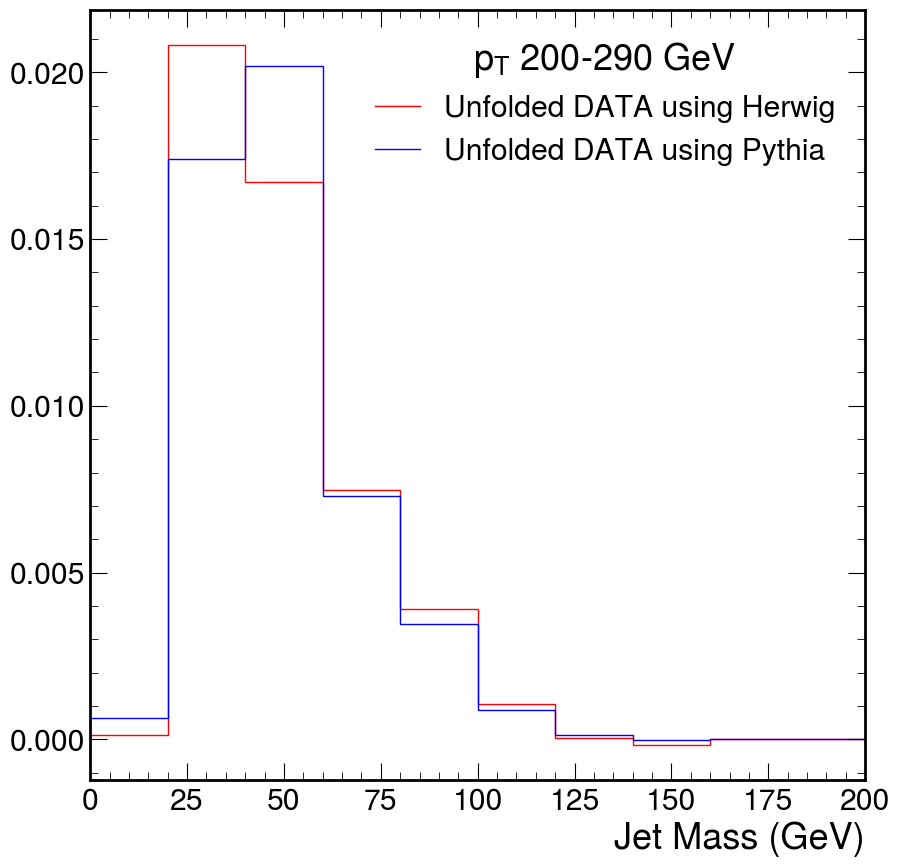

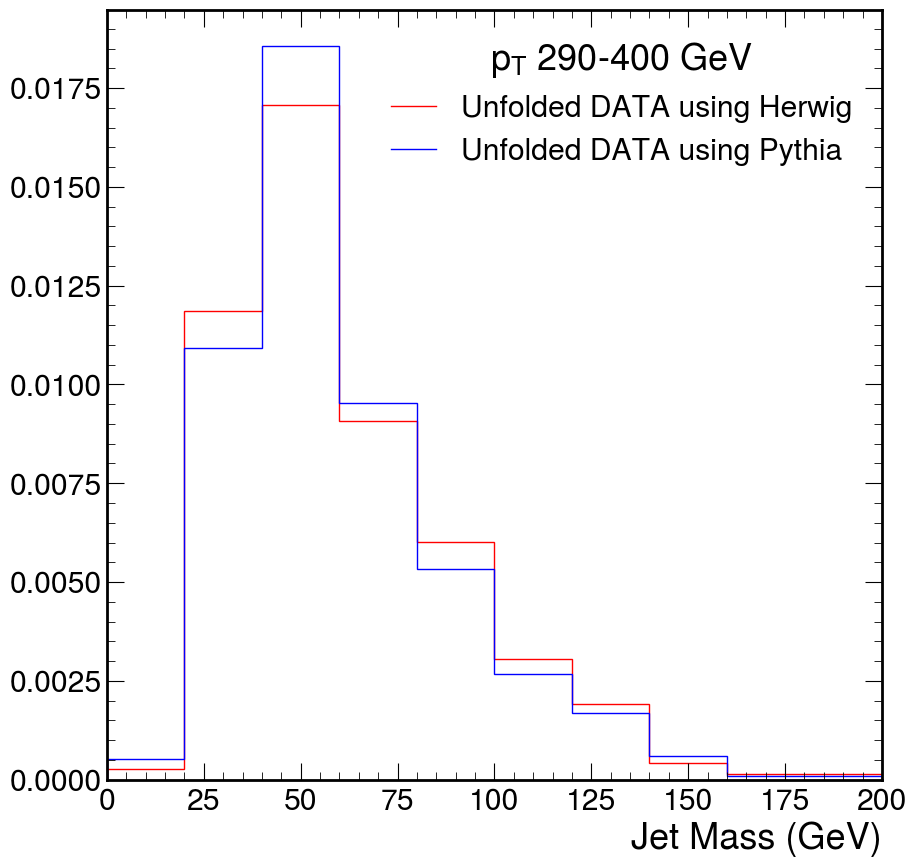

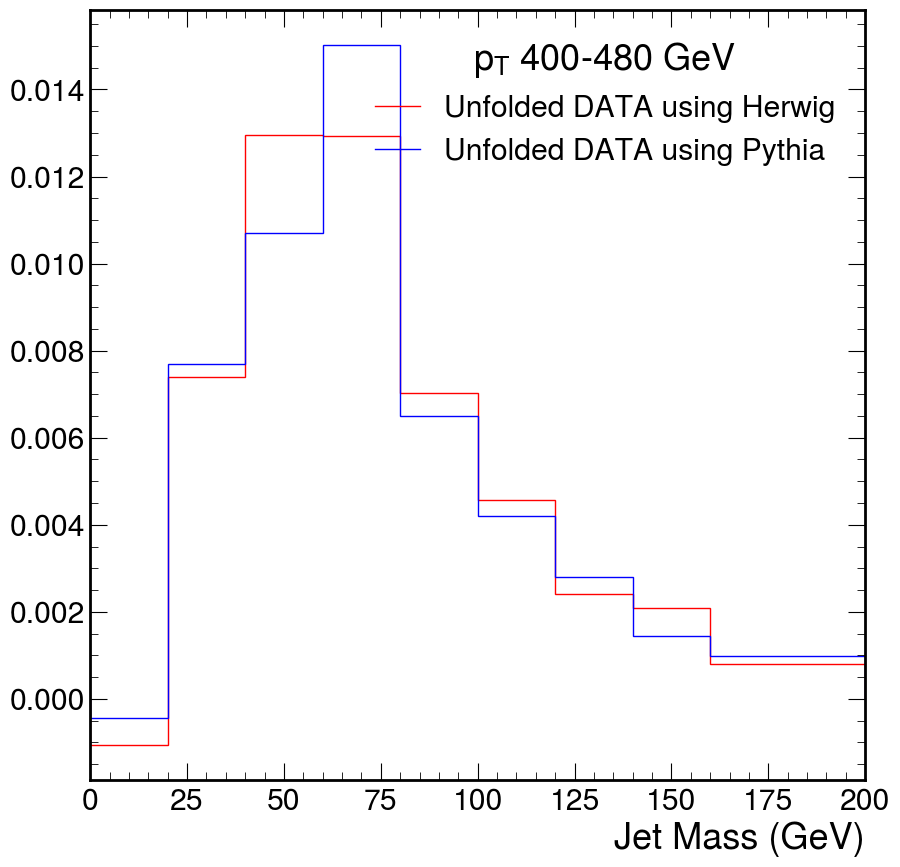

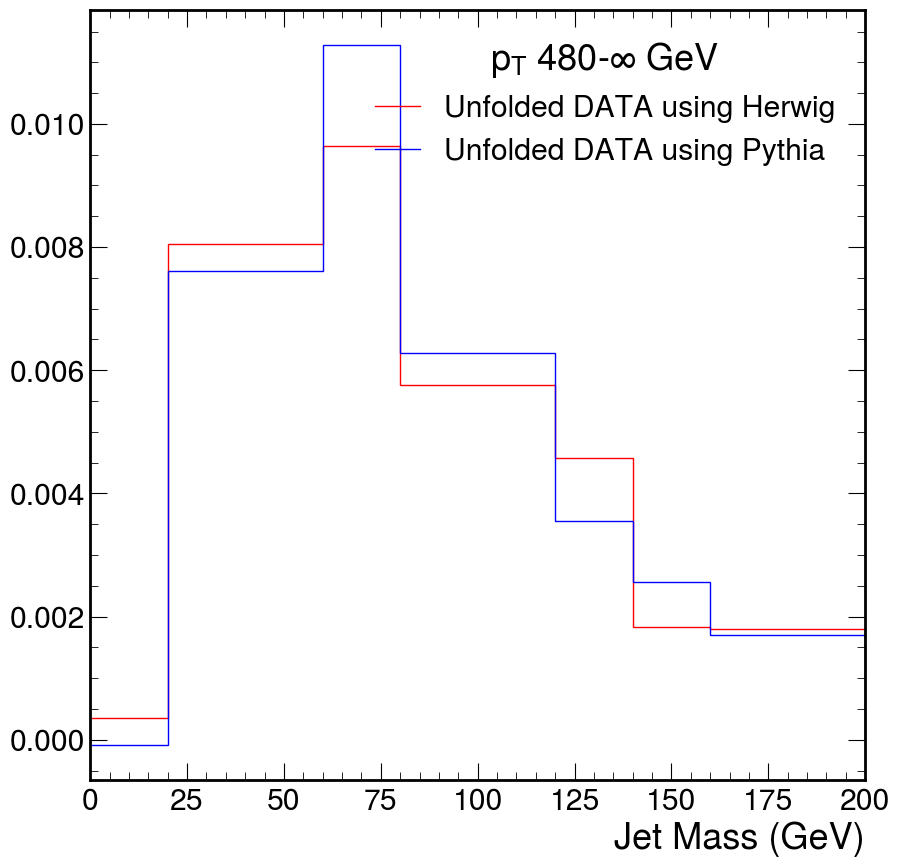

In [69]:
pythia_output = unfolder.get_results()[0]
herwig_output = unfolder_herwig.get_results()[0]
for ipt in range(4):
    # if groomed:
        
    #     herwig_normalised  = herwig_output[ipt]/herwig_output[ipt].sum()
    #     pythia_normalised = pythia_output[ipt]/pythia_output[ipt].sum()
    #     plt.stairs(herwig_normalised/mgen_width, mgen_edge, color = 'r', label = 'Unfolded DATA using Herwig')
    #     plt.stairs(pythia_normalised/mgen_width, mgen_edge, color = 'b', label = 'Unfolded DATA using Pythia')
    #     plt.legend(title = title_list[ipt])
    #     plt.xlim(0,200)
    #     plt.xlabel("Jet Mass (GeV)")
    #     plt.show()
        
    if (ipt!=3):
        herwig_normalised  = herwig_output[ipt]/herwig_output[ipt].sum()
        pythia_normalised = pythia_output[ipt]/pythia_output[ipt].sum()
        plt.stairs(herwig_normalised/mgen_width, mgen_edge, color = 'r', label = 'Unfolded DATA using Herwig')
        plt.stairs(pythia_normalised/mgen_width, mgen_edge, color = 'b', label = 'Unfolded DATA using Pythia')
        plt.legend(title = title_list[ipt])
        plt.xlim(0,200)
        plt.xlabel("Jet Mass (GeV)")
        plt.show()
    else:
        
        # Normalize Herwig and Pythia distributions
        herwig_normalised = herwig_output[ipt] / herwig_output[ipt].sum()
        pythia_normalised = pythia_output[ipt] / pythia_output[ipt].sum()
        
        # Define the indices to merge
        if not groomed:
            merge_indices = [(1, 2), (4, 5)]  # Python index is 0-based, so (2nd,3rd) -> (1,2) and (5th,6th) -> (4,5)
        else:
            merge_indices = [(3,4), (5,6)]
        # Merge the bin values
        def merge_bins(data, bin_edges, merge_indices):
            new_data = list(data)
            new_edges = list(bin_edges)
        
            for i, j in reversed(merge_indices):  # Reverse to avoid shifting indices
                new_data[i] += new_data[j]  # Sum the values
                del new_data[j]  # Remove the merged element
                new_edges[i + 1] = new_edges[j + 1]  # Extend the bin range
                del new_edges[j + 1]  # Remove the extra bin edge
        
            new_width = np.diff(new_edges)  # Recalculate bin widths
            return np.array(new_data), np.array(new_edges), new_width
        
        # Apply merging
        herwig_merged, mgen_edge_merged, mgen_width_merged = merge_bins(herwig_normalised, mgen_edge, merge_indices)
        pythia_merged, _, _ = merge_bins(pythia_normalised, mgen_edge, merge_indices)  # Use the same edges for Pythia
        
        # Plot the modified histograms
        plt.stairs(herwig_merged / mgen_width_merged, mgen_edge_merged, color='r', label='Unfolded DATA using Herwig')
        plt.stairs(pythia_merged / mgen_width_merged, mgen_edge_merged, color='b', label='Unfolded DATA using Pythia')
        
        plt.legend(title=title_list[ipt])
        plt.xlim(0, 200)
        plt.xlabel("Jet Mass (GeV)")
        plt.show()


    

/tmp/ipykernel_1875/366455692.py:16: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(pythia_normalised-herwig_normalised)/2/np.abs(pythia_normalised)


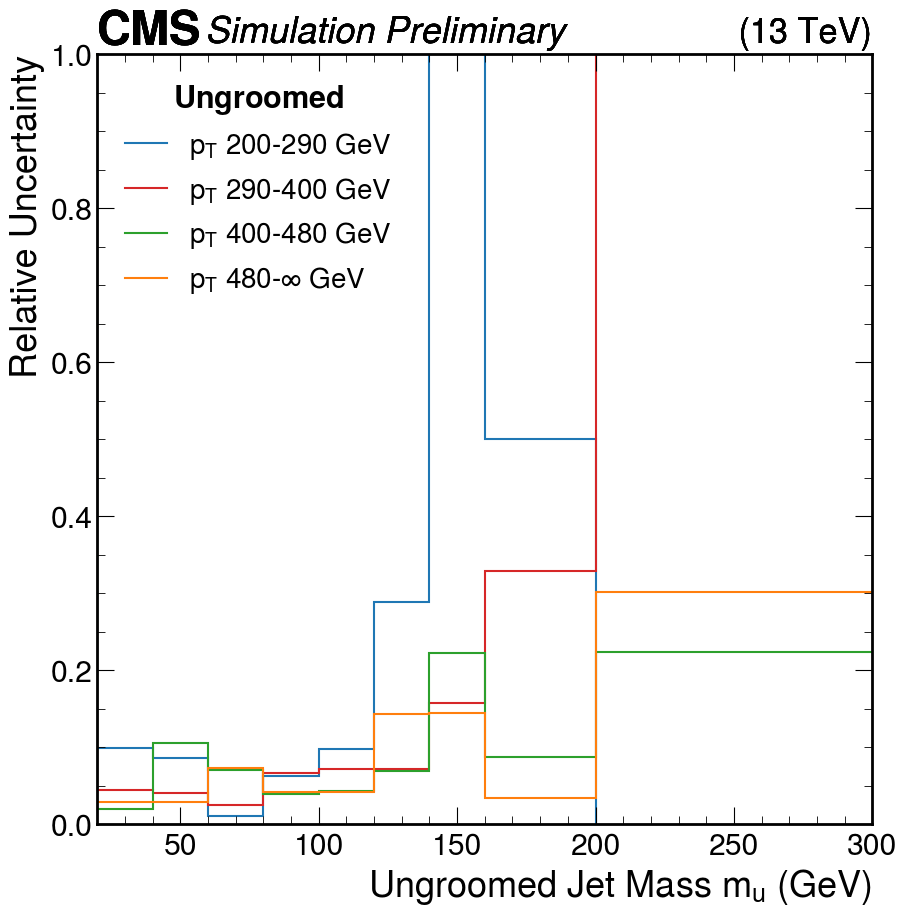

In [70]:
relative_herwig = []

for ipt in range(4):
    # if groomed:

    #     herwig_normalised  = herwig_output[ipt]/herwig_output[ipt].sum()
    #     pythia_normalised = pythia_output[ipt]/pythia_output[ipt].sum()
    #     diff = np.abs(pythia_normalised-herwig_normalised)/2/np.abs(pythia_normalised)
    #     hep.histplot(diff, mgen_edge, label = title_list[ipt], color = color_pt[ipt])
    #     plt.xlim(10,300)
    #     plt.ylim(0,1)
    #     #plt.show()
    if ipt!=3:
        herwig_normalised  = herwig_output[ipt]/herwig_output[ipt].sum()
        pythia_normalised = pythia_output[ipt]/pythia_output[ipt].sum()
        diff = np.abs(pythia_normalised-herwig_normalised)/2/np.abs(pythia_normalised)
        hep.histplot(diff, mgen_edge, label = title_list[ipt], color = color_pt[ipt])
        plt.xlim(20,300)
        plt.ylim(0,1)
        #plt.show()
    else:
        
        diff = np.abs(pythia_merged-herwig_merged)/2/np.abs(pythia_merged)
        hep.histplot(diff, mgen_edge_merged, label = title_list[ipt], color = color_pt[ipt])
        plt.xlim(20,300)
        plt.ylim(0,1)
        #plt.show()

    relative_herwig.append(diff)
    
    
    plt.ylabel("Relative Uncertainty")
    hep.cms.label("Preliminary", data = False)
    if groomed:
        plt.legend(title=r"$\bf{Groomed}$", fontsize = 20, title_fontsize = 22)
        plt.xlabel(r"Groomed Jet Mass $m_u$ (GeV)")
        plt.savefig(f"plots/unfold/herwig_unc_groomed.pdf")
    else:
        plt.legend(title=r"$\bf{Ungroomed}$", fontsize = 20, title_fontsize = 22)
        plt.xlabel(r"Ungroomed Jet Mass $m_u$ (GeV)")
        plt.savefig(f"plots/unfold/herwig_unc_ungroomed.pdf")

In [71]:
total_sys_pt_bin = unfolder.total_sys_pt_binned

total_sys_pt_bin_down = unfolder_dn.total_sys_pt_binned

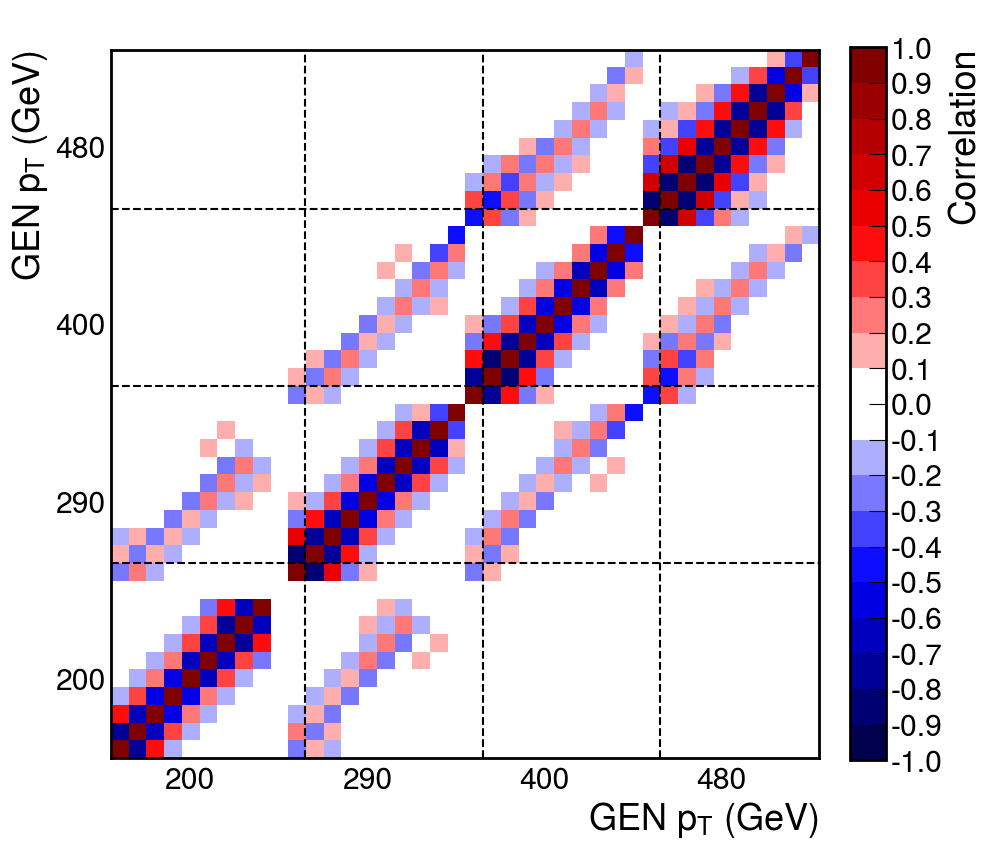

In [73]:
unfolder.plot_correlation()
corr_matrix = unfolder.corr_matrix

In [74]:
############## Up ##################

total_sys_w_herwig_pt_binned = []
total_sys_down_w_herwig_pt_binned = []
unfolded_result_dic = {}
for ipt in range(4):
    if ipt !=3:
        nominal_result = unfolder.get_results()[0][ipt]
        herwig_unc = nominal_result*relative_herwig[ipt]

        ######### Up ###############
        total_sys2 = total_sys_pt_bin[ipt]**2       
        total_sys2 += herwig_unc
        total_sys = total_sys2**0.5
        total_sys_w_herwig_pt_binned.append(total_sys)
        ######### Down ###############
        total_sys2_down = total_sys_pt_bin_down[ipt]**2
        total_sys2_down += herwig_unc
        total_sys_down = total_sys2_down**0.5
        total_sys_down_w_herwig_pt_binned.append(total_sys_down)
        
        unfolded_result_dic[ipt] = nominal_result
    else:
        pythia_merged, _, _ = merge_bins(pythia_output[ipt], mgen_edge, merge_indices)
        nominal_result = pythia_merged
        
        herwig_unc = nominal_result*relative_herwig[ipt]
        if not groomed:
            corr_12 = corr_matrix[30+1, 30+2]
            corr_45 = corr_matrix[30+4, 30+5]

            ############# Up ##############
            total_sys_final_bin = total_sys_pt_bin[ipt]
            
            
            s1 = total_sys_final_bin[1]
            s2 = total_sys_final_bin[2]
            s4 =  total_sys_final_bin[4]
            s5 =  total_sys_final_bin[5]
    
            s1 = np.sqrt(s1**2 + s2**2 + 2*corr_12*s1*s2)
            s4 = np.sqrt(s4**2 + s5**2 + 2*corr_45*s4*s5)
    
            total_sys_final_bin[4] = s4
            total_sys_final_bin = np.delete(total_sys_final_bin, 5)
            total_sys_final_bin[1] = s1
            total_sys_final_bin = np.delete(total_sys_final_bin, 2)

            ############# Down ##############

            total_sys_final_bin_down = total_sys_pt_bin_down[ipt]
            
            
            s1 = total_sys_final_bin_down[1]
            s2 = total_sys_final_bin_down[2]
            s4 =  total_sys_final_bin_down[4]
            s5 =  total_sys_final_bin_down[5]
    
            s1 = np.sqrt(s1**2 + s2**2 + 2*corr_12*s1*s2)
            s4 = np.sqrt(s4**2 + s5**2 + 2*corr_45*s4*s5)
    
            total_sys_final_bin_down[4] = s4
            total_sys_final_bin_down = np.delete(total_sys_final_bin_down, 5)
            total_sys_final_bin_down[1] = s1
            total_sys_final_bin_down = np.delete(total_sys_final_bin_down, 2)
        else:

            
            corr_34 = corr_matrix[30+3, 30+4]
            corr_56 = corr_matrix[30+5, 30+6]


            ######### Up ####################
            total_sys_final_bin = total_sys_pt_bin[ipt]
            
            s3 = total_sys_final_bin[3]
            s4 = total_sys_final_bin[4]
            s5 = total_sys_final_bin[5]
            s6 = total_sys_final_bin[6]
            
            s3 = np.sqrt(s3**2 + s4**2 + 2*corr_34*s3*s4)
            s5 = np.sqrt(s5**2 + s6**2 + 2*corr_56*s5*s6)
            
            total_sys_final_bin[3] = s3
            total_sys_final_bin = np.delete(total_sys_final_bin, 4)
            total_sys_final_bin[5] = s5
            total_sys_final_bin = np.delete(total_sys_final_bin, 6)

            ############ Down ####################
            total_sys_final_bin_down = total_sys_pt_bin_down[ipt]
            
            s3 = total_sys_final_bin_down[3]
            s4 = total_sys_final_bin_down[4]
            s5 = total_sys_final_bin_down[5]
            s6 = total_sys_final_bin_down[6]
            
            s3 = np.sqrt(s3**2 + s4**2 + 2*corr_34*s3*s4)
            s5 = np.sqrt(s5**2 + s6**2 + 2*corr_56*s5*s6)
            
            total_sys_final_bin_down[3] = s3
            total_sys_final_bin_down = np.delete(total_sys_final_bin_down, 4)
            total_sys_final_bin_down[5] = s5
            total_sys_final_bin_down = np.delete(total_sys_final_bin_down, 6)

        ########## Up ##############
        total_sys2 =total_sys_final_bin**2
        total_sys2 += herwig_unc
        total_sys = total_sys2**0.5
        total_sys_w_herwig_pt_binned.append(total_sys)


        ########### Down #################
        total_sys2_down =total_sys_final_bin_down**2
        total_sys2_down += herwig_unc
        total_sys_down = total_sys2_down**0.5
        total_sys_down_w_herwig_pt_binned.append(total_sys_down)
        
        unfolded_result_dic[ipt] = nominal_result


In [75]:
unfolded_result_dic = {}
if not groomed:
    for ipt in range(4):
        if ipt !=3:
            nominal_result = unfolder.get_results()[0][ipt]
            unfolded_result_dic[ipt] = nominal_result
        else:
            pythia_merged, _, _ = merge_bins(pythia_output[ipt], mgen_edge, merge_indices)
            nominal_result = pythia_merged
    
            unfolded_result_dic[ipt] = nominal_result
else:
    for ipt in range(4):
        if ipt !=3:
            nominal_result = unfolder.get_results()[0][ipt]
            unfolded_result_dic[ipt] = nominal_result
        else:
            pythia_merged, _, _ = merge_bins(pythia_output[ipt], mgen_edge, merge_indices)
            nominal_result = pythia_merged
    
            unfolded_result_dic[ipt] = nominal_result
        
if groomed:
    with open("unfolded_result_groomed.pkl", "wb") as f:
        pkl.dump(unfolded_result_dic, f)
else:
    with open("unfolded_result_ungroomed.pkl", "wb") as f:
        pkl.dump(unfolded_result_dic, f)

In [76]:
total_sys_pt_dic = {0:total_sys_w_herwig_pt_binned[0], 1:total_sys_w_herwig_pt_binned[1], 2:total_sys_w_herwig_pt_binned[2], 3:total_sys_w_herwig_pt_binned[3]}

total_sys_down_pt_dic = {0:total_sys_down_w_herwig_pt_binned[0], 1:total_sys_down_w_herwig_pt_binned[1], 2:total_sys_down_w_herwig_pt_binned[2], 3:total_sys_down_w_herwig_pt_binned[3]}

In [77]:
if groomed:
    with open("total_sys_pt_dic_groomed.pkl", "wb") as f:
        pkl.dump(total_sys_pt_dic, f)
    with open("total_sys_down_pt_dic_groomed.pkl", "wb") as f:
        pkl.dump(total_sys_down_pt_dic, f)
else:
    with open("total_sys_pt_dic_ungroomed.pkl", "wb") as f:
        pkl.dump(total_sys_pt_dic, f)
    with open("total_sys_down_pt_dic_ungroomed.pkl", "wb") as f:
        pkl.dump(total_sys_down_pt_dic, f)

In [497]:
def make_comparison_plot(data1, unc1, data2, unc2, x_edges):
    """
    Create a two-panel figure:
      - Top: data1 (stepped line + shaded uncertainty) vs. data2 (points with error bars)
      - Bottom: (data2/data1 - 1) vs. x, with a band showing the fractional uncertainty of data1.

    Parameters
    ----------
    data1 : array-like
        Central values for the first (nominal) distribution in each bin.
    unc1 : array-like
        Uncertainties for the first (nominal) distribution in each bin.
    data2 : array-like
        Central values for the second (alternative) distribution in each bin.
    unc2 : array-like
        Uncertainties for the second (alternative) distribution in each bin.
    x_edges : array-like
        The bin edges in x (length should be len(data1)+1).

    Returns
    -------
    fig : matplotlib.figure.Figure
    (ax_top, ax_bot) : tuple of matplotlib.axes.Axes
        The top and bottom axes, respectively.
    """

    # Compute bin centers
    x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
    
    # Create the figure and subplots with a ratio of heights
    fig, (ax_top, ax_bot) = plt.subplots(
        2, 1, sharex=True,
        gridspec_kw={"height_ratios": [3, 1]},

    )
    
    # -- Top Panel --
    # Plot data1 as a step curve
    ax_top.step(
        x_edges, np.append(data1, data1[-1]),  # for step(..., where='post') we often repeat last value
        where='post', color='black', label="Unfolded PYTHIA"
    )
    # Add a shaded band for the uncertainty on data1
    lower1 = data1 - unc1
    upper1 = data1 + unc1
    ax_top.fill_between(
        x_edges,
        np.append(lower1, lower1[-1]),
        np.append(upper1, upper1[-1]),
        step='post', color='gray', alpha=0.5
    )
    
    # Plot data2 with error bars
    ax_top.errorbar(
        x_centers, data2, yerr=unc2, fmt='o', color='orange', label="Unfolded herwig7"
    )
    
    # Set y-scale to log
    #ax_top.set_yscale('log')
    
    # -- Bottom Panel --
    # Compute ratio (data2 / data1) minus 1
    # Protect against division by zero just in case:
    ratio = np.zeros_like(data1, dtype=float)
    valid_bins = (data1 != 0.0)
    ratio[valid_bins] = data2[valid_bins] / data1[valid_bins]
    ratio_minus_1 = ratio - 1.0
    
    # Uncertainty band around data1 in the ratio panel:
    # data1 itself in the ratio panel is effectively 1.0,
    # so the band is ± (unc1 / data1). We'll plot that around 0.0 (i.e. ratio_minus_1 = 0).
    band = np.zeros_like(data1, dtype=float)
    band[valid_bins] = unc1[valid_bins] / data1[valid_bins]
    
    # Plot the nominal ratio line (which is 0 in "ratio_minus_1" space) plus the band
    ax_bot.axhline(0, color='black', lw=1)
    ax_bot.fill_between(
        x_edges,
        np.append(-band, -band[-1]),
        np.append(band, band[-1]),
        step='post', color='gray', alpha=0.5
    )
    
    # Compute uncertainties on data2/data1
    #   ratio_err^2 = (unc2/data1)^2 + (data2*unc1 / data1^2)^2
    ratio_err = np.zeros_like(data1, dtype=float)
    ratio_err[valid_bins] = np.sqrt(
        (unc2[valid_bins]/data1[valid_bins])**2 +
        (data2[valid_bins]*unc1[valid_bins]/(data1[valid_bins]**2))**2
    )
    
    # Plot data2/data1 - 1 with error bars
    ax_bot.errorbar(
        x_centers, ratio_minus_1, yerr=ratio_err, fmt='o', color='orange'
    )
    
    # Some reasonable y-limits for the bottom panel
    ax_bot.set_ylim(-0.2, 0.5)
    
    # Remove extra spacing
    plt.tight_layout(h_pad=0.0)
    
    return fig, (ax_top, ax_bot)

In [299]:
output_pythia, unc_pythia, _ = unfolder.get_results()

output_herwig, _, unc_herwig = unfolder_herwig.get_results()

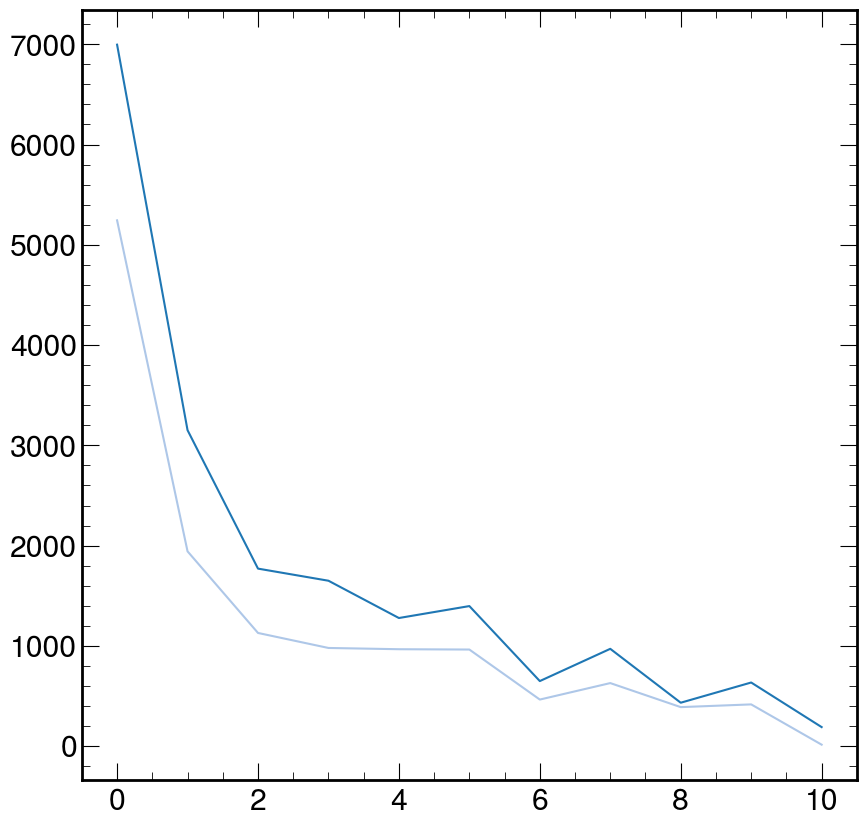

In [300]:
plt.plot(output_pythia[2])
plt.plot(output_herwig[2])

In [500]:
mgen_edge_mod = mgen_edge.copy()
mgen_edge_mod[-1] = 240
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-480 GeV",  r"$p_T$ 480-$\infty$ GeV"]


for i in range(4):
    fig, (ax1, ax2) = make_comparison_plot(
            output_pythia[i]/mgen_width/output_pythia[i].sum(), unc_pythia[i]/mgen_width/output_pythia[i].sum(),
            output_herwig[i]/mgen_width/output_herwig[i].sum(), unc_herwig[i]/mgen_width/output_herwig[i].sum(),
            mgen_edge_mod
        )
    
    ax2.set_ylim(-1, 1)
    ax1.set_xlim(10,240)
    ax1.legend(title = title_list[i])
    if groomed:
        ax2.set_xlabel("Groomed Jet Mass (GeV)")

    else:
        ax2.set_xlabel("Ungroomed Jet Mass (GeV)")
    ax2.set_ylabel("Herwig/Pythia")
    hep.cms.label("Preliminary", ax = ax1)


KeyError: 0

array([3557.07287804, 1273.41933458, 1109.98653681,  870.02408462,
        627.27237339,  573.21719733,  340.35177569,  180.44672931,
        145.95089535,  330.41783166,  259.82928687, 1943.12535991,
        840.49449666,  616.40033462,  426.08832   ,  348.35693786,
        345.2875767 ,  283.24930074,  264.97992798,  216.03019528,
        227.03484313,  405.8049245 ,  585.60322532,  267.4979203 ,
        178.10231173,  114.13001958,   91.9310388 ,  116.47685781,
        125.09352344,  130.57837088,  105.3316633 ,   74.93288112,
         67.44625344,  284.42694547,  136.61203208,  101.93314389,
         53.74330609,   44.68348154,   38.47419324,   41.48419656,
         44.03366788,   34.38530408,   52.25366485,   23.36122549])

In [211]:
 resp_matrix_4d.axes['mgen'].edges

array([0.0e+00, 1.0e+01, 2.0e+01, 4.0e+01, 6.0e+01, 8.0e+01, 1.0e+02,
       1.2e+02, 1.4e+02, 1.6e+02, 2.0e+02, 1.3e+04])

In [207]:
widths

array([1.00e+01, 1.00e+01, 2.00e+01, 2.00e+01, 2.00e+01, 2.00e+01,
       2.00e+01, 2.00e+01, 2.00e+01, 4.00e+01, 1.28e+04])

In [208]:
data_list = []
for ipt in range(4):
    edges = [1.00e+01, 1.00e+01, 2.00e+01, 2.00e+01, 2.00e+01, 2.00e+01,
       2.00e+01, 2.00e+01, 2.00e+01, 4.00e+01, 1.28e+04]
    y_data =  resp_matrix_4d[{'systematic':'nominal'}].project('ptgen', 'mgen')[ipt, :].values()
    
    y_data = y_data/y_data.sum()

    y2_data = unfolder.get_results()[0][ipt]
    y2_data = y2_data/y2_data.sum()
    up = unfolder.get_results()[1][ipt]
    down = unfolder_dn.get_results()[1][ipt]
    stat_unc_up = stat_unc[i]
    data_list.append([edges, y2_data, stat_unc_up, up, down, y_data])
    

ValueError: Size mismatch between "values" and "edges". Expected `len(values) + 1 == len(edges)`, but `len(values) = 7` and `len(edges) = 7`.

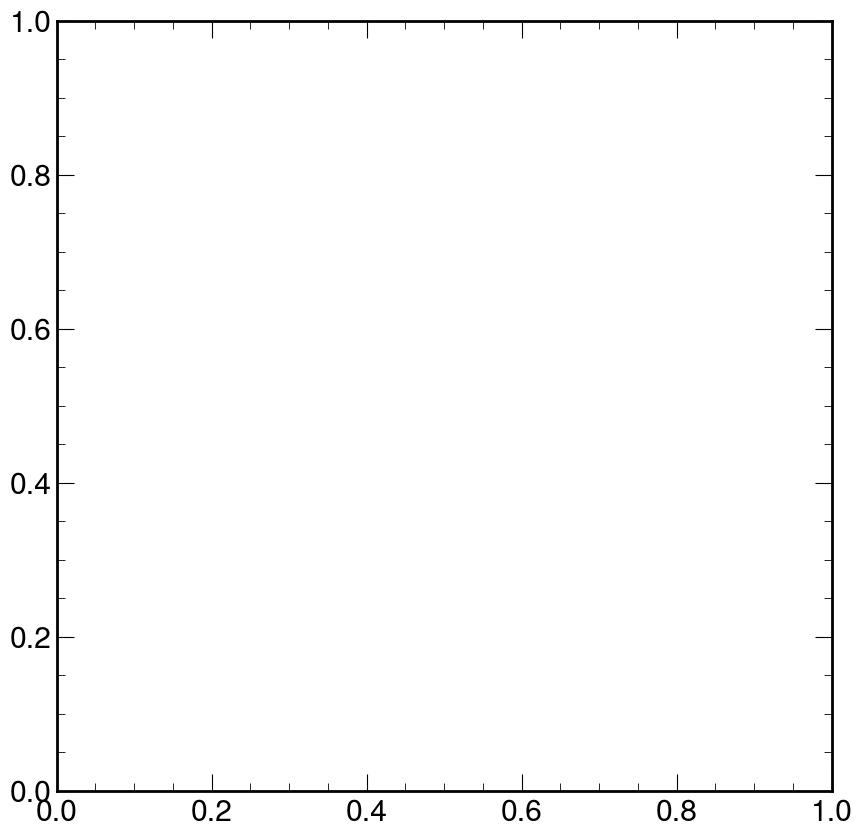

In [209]:
markers = ['o', 's', 'D', '^', 'v']
ptbinsGen = ptgen_edge
ipt = 0 
for i in range(4):
    x_data = resp_matrix_4d.axes['mgen'].centers  
    widths = resp_matrix_4d.axes['mgen'].widths
    if not groomed:
        if i == 3:
            x_data = [5.0e+00, 1.5e+01, 40,  7.0e+01, 100,
       1.3e+02, 1.5e+02, 1.8e+02, 225]
#widths = resp_matrix_4d.axes['mgen'].widths
            widths = [10,10,40,20,40,20,20, 40, 12540]
        
    
    power_text = r'$\times 10^{{{}}}$'.format(i)
    pt_text = r'$p_T$ '+ str(ptbinsGen[ipt])[:-2]+'-'+str(ptbinsGen[ipt+1])[:-2] + ' GeV ' + power_text
    ipt = ipt + 1
    if i==0:
        plt.stairs(np.array(data_list[i][1][:-4])*(10**i), data_list[i][0][:-4], color = 'black' )
        plt.plot(x_data[:-4], np.array(data_list[i][1][:-4])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    elif i==1:
        plt.stairs(np.array(data_list[i][1][:-3])*(10**i), data_list[i][0][:-3], color = 'black' )
        plt.plot(x_data[:-3], np.array(data_list[i][1][:-3])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
        
    else:    
        plt.stairs(np.array(data_list[i][1])*(10**i), data_list[i][0], color = 'black' )   
            
        plt.plot(x_data, np.array(data_list[i][1])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    plt.xlim(0,100)
    plt.yscale('log')
    plt.ylim(10**-5, 60)
    plt.xlim(20, 200)
    plt.ylim()
    widths[-1] = 20
    if groomed:
        #custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        #custom_text  = 'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    plt.xlabel(xlabel)
    plt.ylabel( ylabel)
    
    sys_up = np.array(data_list[i][3])*10**i 
    sys_down = np.array(data_list[i][4])*10**i 
    tot_up = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)
    tot_down = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)

    if i ==0:
        plt.bar(x_data[:-4], # x
            2*np.array(data_list[i][2][:-4])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - (np.array(data_list[i][2][:-4])*(10**i)), color='b',  width=widths[:-4], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-4])*10**i)
        plt.bar(x_data[:-4], # x
            tot_up[:-4] + tot_down[:-4], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - tot_down[:-4], color = 'cyan', width=widths[:-4], label='Total Unc')
    elif i ==1:
        idx = 3
        plt.bar(x_data[:-idx], # x
            2*np.array(data_list[i][2][:-idx])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - (np.array(data_list[i][2][:-idx])*(10**i)), color='b',  width=widths[:-idx], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-idx])*10**i)
        plt.bar(x_data[:-idx], # x
            tot_up[:-idx] + tot_down[:-idx], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - tot_down[:-idx], color = 'cyan', width=widths[:-idx], label='Total Unc')
    else:
        plt.bar(x_data, # x
            2*np.array(data_list[i][2])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - (np.array(data_list[i][2])*(10**i)), color='b',  width=widths, label='Stat. Unc.')
        print(np.array(data_list[i][2])*10**i)
        plt.bar(x_data, # x
            tot_up + tot_down, # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - tot_down, color = 'cyan', width=widths, label='Total Unc')
for i in range(4):  
    if i == 0:
        idx = 4
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    elif i == 1:
        idx = 3
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    else:

        plt.stairs(np.array(data_list[i][5][:])*(10**i), data_list[i][0][:], color = 'red', label = ' PYTHIA', lw = 2  )
handles, labels = plt.gca().get_legend_handles_labels()
        
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
labels.append(custom_text)

# Add legend with the custom entry
hep.cms.label("Preliminary", data = 1)
by_label = dict(zip(labels, handles))
leg = plt.legend(by_label.values(), by_label.keys(), fontsize = 12)

In [301]:
resp_matrix_4d.project('ptgen', 'mgen').values()
pythia_gen_merged, _, _ = merge_bins(resp_matrix_4d.project('ptgen', 'mgen').values()[3], mgen_edge, merge_indices)

In [302]:
pythia_orig_dic = {}
for i in range(3):
    pythia_orig_dic[i] = resp_matrix_4d.project('ptgen', 'mgen').values()[i]
pythia_orig_dic[3] = pythia_gen_merged

In [303]:
if not groomed:
    with open("pythia_gen_ungroomed.pkl", "wb") as f:
        pkl.dump(pythia_orig_dic, f)
else:
    with open("pythia_gen_groomed.pkl", "wb") as f:
        pkl.dump(pythia_orig_dic, f)